In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image
#import pydotplus as pydot
from sklearn import tree
from os import system
import scipy.stats as stats
from textwrap import wrap

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/combined_wind_farm_A_data_new.csv'
data=pd.read_csv(file_path, delimiter=',', encoding='utf-8', on_bad_lines='skip')
print("File loaded successfully!")


File loaded successfully!


In [ ]:
data['status_type_id'] = np.where(data['status_type_id'].isin([0, 1, 2]), 0, 1)

In [ ]:
rename_mapping = {
    'time_stamp': 'time_stamp',
    'asset_id': 'asset_id',
    'id': 'id',
    'train_test': 'train_test',
    'status_type_id': 'status_type_id',
    'sensor_0_avg': 'Ambient temperature avg',
    'sensor_1_avg': 'Wind absolute direction avg',
    'sensor_2_avg': 'Wind relative direction avg',
    'wind_speed_3_avg': 'Windspeed avg',
    'wind_speed_4_avg': 'Estimated windspeed avg',
    'wind_speed_3_max': 'Windspeed max',
    'wind_speed_3_min': 'Windspeed min',
    'wind_speed_3_std': 'Windspeed std',
    'sensor_5_avg': 'Pitch angle avg',
    'sensor_5_max': 'Pitch angle max',
    'sensor_5_min': 'Pitch angle min',
    'sensor_5_std': 'Pitch angle std',
    'sensor_6_avg': 'Hub controller temperature avg',
    'sensor_7_avg': 'Top nacelle controller temperature avg',
    'sensor_8_avg': 'Choke coils on the VCS- section temperature avg',
    'sensor_9_avg': 'VCP-board temperature avg',
    'sensor_10_avg': 'VCS cooling water temperature avg',
    'sensor_11_avg': 'Gearbox bearing on high speed shaft  temperature avg',
    'sensor_12_avg': 'Gearbox oil temperature avg',
    'sensor_13_avg': 'Generator bearing 2(Drive end)  temperature avg',
    'sensor_14_avg': 'Generator bearing 1(Non-drive end) temperature avg',
    'sensor_15_avg': 'Generator stator winding phase 1 temperature avg',
    'sensor_16_avg': 'Generator stator winding phase 2 temperature avg',
    'sensor_17_avg': 'Generator stator winding phase 3 temperature avg',
    'sensor_18_avg': 'Generator rpm avg',
    'sensor_18_max': 'Generator rpm max',
    'sensor_18_min': 'Generator rpm min',
    'sensor_18_std': 'Generator rpm std',
    'sensor_19_avg': 'Split ring chamber temperature avg',
    'sensor_20_avg': 'Busbar section temperature avg',
    'sensor_21_avg': 'IGBT-driver on grid side inverter temperature avg',
    'sensor_22_avg': 'Actual Phase displacement avg',
    'sensor_23_avg': 'Averaged current phase 1',
    'sensor_24_avg': 'Averaged current phase 2',
    'sensor_25_avg': 'Averaged current phase 3',
    'sensor_26_avg': 'Grid frequency',
    'reactive_power_27_avg': 'Possible Grid capacitive reactive power avg',
    'reactive_power_27_max': 'Possible Grid capacitive reactive power max',
    'reactive_power_27_min': 'Possible Grid capacitive reactive power min',
    'reactive_power_27_std': 'Possible Grid capacitive reactive power std',
    'reactive_power_28_avg': 'Possible Grid inductive reactive power avg',
    'reactive_power_28_max': 'Possible Grid inductive reactive power max',
    'reactive_power_28_min': 'Possible Grid inductive reactive power min',
    'reactive_power_28_std': 'Possible Grid inductive reactive power std',
    'power_29_avg': 'Possible Grid active power avg',
    'power_29_max': 'Possible Grid active power max',
    'power_29_min': 'Possible Grid active power min',
    'power_29_std': 'Possible Grid active power std',
    'power_30_avg': 'Grid power avg',
    'power_30_max': 'Grid power max',
    'power_30_min': 'Grid power min',
    'power_30_std': 'Grid power std',
    'sensor_31_avg': 'Grid reactive power avg',
    'sensor_31_max': 'Grid reactive power max',
    'sensor_31_min': 'Grid reactive power min',
    'sensor_31_std': 'Grid reactive power std',
    'sensor_32_avg': 'Averaged voltage phase 1',
    'sensor_33_avg': 'Averaged voltage phase 2',
    'sensor_34_avg': 'Averaged voltage phase 3',
    'sensor_35_avg': 'IGBT-driver on rotor side inverter phase 1 temperature avg',
    'sensor_36_avg': 'IGBT-driver on rotor side inverter phase 2 temperature avg',
    'sensor_37_avg': 'IGBT-driver on rotor side inverter phase 3 temperature avg',
    'sensor_38_avg': 'HV transformer phase L1 temperature avg',
    'sensor_39_avg': 'HV transformer phase L2 temperature avg',
    'sensor_40_avg': 'HV transformer phase L3 temperature avg',
    'sensor_41_avg': 'Hydraulic group oil temperature avg',
    'sensor_42_avg': 'Nacelle direction avg',
    'sensor_43_avg': 'Nacelle temperature avg',
    'sensor_44': 'Generator disconnected active power avg',
    'sensor_45': 'Generator connected in delta active power avg',
    'sensor_46': 'Generator connected in star active power avg',
    'sensor_47': 'Generator disconnected reactive power avg',
    'sensor_48': 'Generator connected in delta reactive power avg',
    'sensor_49': 'Generator connected in star reactive power avg',
    'sensor_50': 'Total active power avg',
    'sensor_51': 'Total reactive power avg',
    'sensor_52_avg': 'Rotor rpm avg',
    'sensor_52_max': 'Rotor rpm max',
    'sensor_52_min': 'Rotor rpm min',
    'sensor_52_std': 'Rotor rpm std',
    'sensor_53_avg': 'Nose cone temperature avg',
}

# Rename the columns in the DataFrame
data.rename(columns=rename_mapping, inplace=True)
# Convert time to python date time format
data['time_stamp']=pd.to_datetime(data['time_stamp'])
#Converting object dtypes to strings
data=data.astype({col: 'string' for col in data.select_dtypes(include='object').columns})

In [ ]:
data.head()

time_stamp  asset_id  id train_test  status_type_id  \
0 2021-08-03 06:10:00         0   0      train               0   
1 2021-08-03 06:20:00         0   1      train               0   
2 2021-08-03 06:30:00         0   2      train               0   
3 2021-08-03 06:40:00         0   3      train               0   
4 2021-08-03 06:50:00         0   4      train               0   

   Ambient temperature avg  Wind absolute direction avg  \
0                     22.0                        302.9   
1                     22.0                        307.1   
2                     22.0                        340.6   
3                     22.0                        124.4   
4                     22.0                         66.2   

   Wind relative direction avg  Windspeed avg  Estimated windspeed avg  ...  \
0                        129.4            1.7                      1.7  ...   
1                        133.6            1.7                      1.7  ...   
2                        167.1            0.9                      0.9  ...   
3                        -49.1            1.5                      1.5  ...   
4                       -107.3            1.0                      1.0  ...   

   Total active power avg  Total reactive power avg  Rotor rpm avg  \
0                 -1280.0                    -496.0            0.0   
1                 -1278.0                    -490.0            0.0   
2                 -1356.0                    -490.0            0.0   
3                 -1274.0                    -509.0            0.0   
4                 -1284.0                    -499.0            0.0   

   Rotor rpm max  Rotor rpm min  Rotor rpm std  Nose cone temperature avg  \
0            0.0            0.0            0.0                       26.0   
1            0.0            0.0            0.0                       25.0   
2            0.0            0.0            0.0                       25.0   
3            0.0            0.0            0.0                       26.0   
4            0.0            0.0            0.0                       26.0   

   event_id  event_label          event_description  
0         0      anomaly  Generator bearing failure  
1         0      anomaly  Generator bearing failure  
2         0      anomaly  Generator bearing failure  
3         0      anomaly  Generator bearing failure  
4         0      anomaly  Generator bearing failure  

[5 rows x 89 columns]

In [ ]:
data.tail()

time_stamp  asset_id     id  train_test  status_type_id  \
1196742 2020-04-15 09:20:00        11  54062  prediction               1   
1196743 2020-04-15 09:30:00        11  54063  prediction               1   
1196744 2020-04-15 09:40:00        11  54064  prediction               1   
1196745 2020-04-15 09:50:00        11  54065  prediction               1   
1196746 2020-04-15 10:00:00        11  54066  prediction               1   

         Ambient temperature avg  Wind absolute direction avg  \
1196742                     15.0                        117.8   
1196743                     16.0                         69.7   
1196744                     16.0                         69.8   
1196745                     16.0                         63.5   
1196746                     16.0                         91.9   

         Wind relative direction avg  Windspeed avg  Estimated windspeed avg  \
1196742                          4.8            2.7                      2.7   
1196743                        -32.0            2.3                      2.3   
1196744                        -16.9            2.8                      2.8   
1196745                        -10.6            2.4                      2.4   
1196746                         17.8            3.1                      3.1   

         ...  Total active power avg  Total reactive power avg  Rotor rpm avg  \
1196742  ...                  -772.0                    -328.0            1.4   
1196743  ...                  -725.0                    -231.0            0.3   
1196744  ...                  -844.0                    -492.0            1.9   
1196745  ...                  -731.0                    -228.0            0.4   
1196746  ...                  -858.0                    -544.0            1.9   

         Rotor rpm max  Rotor rpm min  Rotor rpm std  \
1196742            2.7            0.0            1.1   
1196743            2.1            0.0            0.7   
1196744            2.1            1.6            0.1   
1196745            1.8            0.0            0.7   
1196746            2.2            0.0            0.3   

         Nose cone temperature avg  event_id  event_label  event_description  
1196742                       18.0        92       normal             Normal  
1196743                       18.0        92       normal             Normal  
1196744                       19.0        92       normal             Normal  
1196745                       19.0        92       normal             Normal  
1196746                       20.0        92       normal             Normal  

[5 rows x 89 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196747 entries, 0 to 1196746
Data columns (total 89 columns):
 #   Column                                                      Non-Null Count    Dtype         
---  ------                                                      --------------    -----         
 0   time_stamp                                                  1196747 non-null  datetime64[ns]
 1   asset_id                                                    1196747 non-null  int64         
 2   id                                                          1196747 non-null  int64         
 3   train_test                                                  1196747 non-null  string        
 4   status_type_id                                              1196747 non-null  int64         
 5   Ambient temperature avg                                     1196747 non-null  float64       
 6   Wind absolute direction avg                                 1196747 non-null  float64       
 7   

In [ ]:
data['time_stamp'] = pd.to_datetime(data['time_stamp'], format="%d-%m-%Y %H:%M", errors='coerce')

In [ ]:
data.describe(include='all').T

count unique     top     freq  \
time_stamp                   1196747    NaN     NaN      NaN   
asset_id                   1196747.0    NaN     NaN      NaN   
id                         1196747.0    NaN     NaN      NaN   
train_test                   1196747      2   train  1146154   
status_type_id             1196747.0    NaN     NaN      NaN   
...                              ...    ...     ...      ...   
Rotor rpm std              1196747.0    NaN     NaN      NaN   
Nose cone temperature avg  1196747.0    NaN     NaN      NaN   
event_id                   1196747.0    NaN     NaN      NaN   
event_label                  1196747      2  normal   601394   
event_description            1196747      7  Normal   491869   

                                                    mean                  min  \
time_stamp                 2020-05-16 16:36:39.680968960  2013-10-10 08:40:00   
asset_id                                       10.429508                  0.0   
id                                           27202.75053                  0.0   
train_test                                           NaN                  NaN   
status_type_id                                  0.249071                  0.0   
...                                                  ...                  ...   
Rotor rpm std                                   0.608952                  0.0   
Nose cone temperature avg                      22.780923                  6.0   
event_id                                       40.805379                  0.0   
event_label                                          NaN                  NaN   
event_description                                    NaN                  NaN   

                                           25%                  50%  \
time_stamp                 2019-06-17 15:40:00  2021-04-13 08:40:00   
asset_id                                  10.0                 11.0   
id                                     13599.0              27198.0   
train_test                                 NaN                  NaN   
status_type_id                             0.0                  0.0   
...                                        ...                  ...   
Rotor rpm std                              0.1                  0.3   
Nose cone temperature avg                 18.0                 22.0   
event_id                                  17.0                 38.0   
event_label                                NaN                  NaN   
event_description                          NaN                  NaN   

                                           75%                  max  \
time_stamp                 2022-08-18 15:10:00  2023-09-20 00:50:00   
asset_id                                  13.0                 21.0   
id                                     40798.0              56157.0   
train_test                                 NaN                  NaN   
status_type_id                             0.0                  1.0   
...                                        ...                  ...   
Rotor rpm std                              0.7                  7.4   
Nose cone temperature avg                 27.0                 47.0   
event_id                                  69.0                 92.0   
event_label                                NaN                  NaN   
event_description                          NaN                  NaN   

                                    std  
time_stamp                          NaN  
asset_id                        6.79628  
id                         15710.983417  
train_test                          NaN  
status_type_id                 0.432475  
...                                 ...  
Rotor rpm std                  0.998638  
Nose cone temperature avg      5.949853  
event_id                      27.191836  
event_label                         NaN  
event_description                   NaN  

[89 rows x 11 columns]

In [ ]:
print("no.of rows: ",data.shape[0])
print("no.of columns:",data.shape[1])

no.of rows:  1196747
no.of columns: 89


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
data.isnull().sum().head(89)

time_stamp                                                     0
asset_id                                                       0
id                                                             0
train_test                                                     0
status_type_id                                                 0
Ambient temperature avg                                        0
Wind absolute direction avg                                    0
Wind relative direction avg                                    0
Windspeed avg                                                  0
Estimated windspeed avg                                        0
Windspeed max                                                  0
Windspeed min                                                  0
Windspeed std                                                  0
Pitch angle avg                                                0
Pitch angle max                                                0
Pitch angle min                                                0
Pitch angle std                                                0
Hub controller temperature avg                                 0
Top nacelle controller temperature avg                         0
Choke coils on the VCS- section temperature avg                0
VCP-board temperature avg                                      0
VCS cooling water temperature avg                              0
Gearbox bearing on high speed shaft  temperature avg           0
Gearbox oil temperature avg                                    0
Generator bearing 2(Drive end)  temperature avg                0
Generator bearing 1(Non-drive end) temperature avg            20
Generator stator winding phase 1 temperature avg               0
Generator stator winding phase 2 temperature avg               0
Generator stator winding phase 3 temperature avg               0
Generator rpm avg                                              0
Generator rpm max                                              0
Generator rpm min                                              0
Generator rpm std                                              0
Split ring chamber temperature avg                             0
Busbar section temperature avg                                 0
IGBT-driver on grid side inverter temperature avg              0
Actual Phase displacement avg                                 20
Averaged current phase 1                                       0
Averaged current phase 2                                       0
Averaged current phase 3                                       0
Grid frequency                                                 0
Possible Grid capacitive reactive power avg                    0
Possible Grid capacitive reactive power max                    0
Possible Grid capacitive reactive power min                    0
Possible Grid capacitive reactive power std                    0
Possible Grid inductive reactive power avg                     0
Possible Grid inductive reactive power max                     0
Possible Grid inductive reactive power min                     0
Possible Grid inductive reactive power std                     0
Possible Grid active power avg                                 0
Possible Grid active power max                                 0
Possible Grid active power min                                 0
Possible Grid active power std                                 0
Grid power avg                                                 0
Grid power max                                                 0
Grid power min                                                 0
Grid power std                                                 0
Grid reactive power avg                                        0
Grid reactive power max                                        0
Grid reactive power min                                        0
Grid reactive power std                                        0
Averaged voltage phase 1           

In [ ]:
data.isnull().sum().sort_values(ascending = False)/data.index.size

Generator bearing 1(Non-drive end) temperature avg            0.000017
Actual Phase displacement avg                                 0.000017
time_stamp                                                    0.000000
Grid reactive power avg                                       0.000000
IGBT-driver on rotor side inverter phase 1 temperature avg    0.000000
Averaged voltage phase 3                                      0.000000
Averaged voltage phase 2                                      0.000000
Averaged voltage phase 1                                      0.000000
Grid reactive power std                                       0.000000
Grid reactive power min                                       0.000000
Grid reactive power max                                       0.000000
Grid power std                                                0.000000
IGBT-driver on rotor side inverter phase 3 temperature avg    0.000000
Grid power min                                                0.000000
Grid power max                                                0.000000
Grid power avg                                                0.000000
Possible Grid active power std                                0.000000
Possible Grid active power min                                0.000000
Possible Grid active power max                                0.000000
Possible Grid active power avg                                0.000000
Possible Grid inductive reactive power std                    0.000000
IGBT-driver on rotor side inverter phase 2 temperature avg    0.000000
HV transformer phase L1 temperature avg                       0.000000
Possible Grid inductive reactive power max                    0.000000
HV transformer phase L2 temperature avg                       0.000000
event_label                                                   0.000000
event_id                                                      0.000000
Nose cone temperature avg                                     0.000000
Rotor rpm std                                                 0.000000
Rotor rpm min                                                 0.000000
Rotor rpm max                                                 0.000000
Rotor rpm avg                                                 0.000000
Total reactive power avg                                      0.000000
Total active power avg                                        0.000000
Generator connected in star reactive power avg                0.000000
Generator connected in delta reactive power avg               0.000000
Generator disconnected reactive power avg                     0.000000
Generator connected in star active power avg                  0.000000
Generator connected in delta active power avg                 0.000000
Generator disconnected active power avg                       0.000000
Nacelle temperature avg                                       0.000000
Nacelle direction avg                                         0.000000
Hydraulic group oil temperature avg                           0.000000
HV transformer phase L3 temperature avg                       0.000000
Possible Grid inductive reactive power min                    0.000000
Possible Grid capacitive reactive power std                   0.000000
Possible Grid inductive reactive power avg                    0.000000
Windspeed min                                                 0.000000
Choke coils on the VCS- section temperature avg               0.000000
Top nacelle controller temperature avg                        0.000000
Hub controller temperature avg                                0.000000
Pitch angle std                                               0.000000
Pitch angle min                                               0.000000
Pitch angle max                                               0.000000
Pitch angle avg                                               0.000000
Windspeed std                                                 0.000000
Windspeed max           

In [ ]:
data['Actual Phase displacement avg'].fillna(data['Actual Phase displacement avg'].median(), inplace=True)

In [ ]:
data['Generator bearing 1(Non-drive end) temperature avg'].fillna(data['Generator bearing 1(Non-drive end) temperature avg'].median(), inplace=True)

In [ ]:
data.isnull().sum().head(50)

time_stamp                                              0
asset_id                                                0
id                                                      0
train_test                                              0
status_type_id                                          0
Ambient temperature avg                                 0
Wind absolute direction avg                             0
Wind relative direction avg                             0
Windspeed avg                                           0
Estimated windspeed avg                                 0
Windspeed max                                           0
Windspeed min                                           0
Windspeed std                                           0
Pitch angle avg                                         0
Pitch angle max                                         0
Pitch angle min                                         0
Pitch angle std                                         0
Hub controller temperature avg                          0
Top nacelle controller temperature avg                  0
Choke coils on the VCS- section temperature avg         0
VCP-board temperature avg                               0
VCS cooling water temperature avg                       0
Gearbox bearing on high speed shaft  temperature avg    0
Gearbox oil temperature avg                             0
Generator bearing 2(Drive end)  temperature avg         0
Generator bearing 1(Non-drive end) temperature avg      0
Generator stator winding phase 1 temperature avg        0
Generator stator winding phase 2 temperature avg        0
Generator stator winding phase 3 temperature avg        0
Generator rpm avg                                       0
Generator rpm max                                       0
Generator rpm min                                       0
Generator rpm std                                       0
Split ring chamber temperature avg                      0
Busbar section temperature avg                          0
IGBT-driver on grid side inverter temperature avg       0
Actual Phase displacement avg                           0
Averaged current phase 1                                0
Averaged current phase 2                                0
Averaged current phase 3                                0
Grid frequency                                          0
Possible Grid capacitive reactive power avg             0
Possible Grid capacitive reactive power max             0
Possible Grid capacitive reactive power min             0
Possible Grid capacitive reactive power std             0
Possible Grid inductive reactive power avg              0
Possible Grid inductive reactive power max              0
Possible Grid inductive reactive power min              0
Possible Grid inductive reactive power std              0
Possible Grid active power avg                          0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
dups= data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
data_num= data.select_dtypes(include= ['float64', 'int64','int32'])

In [ ]:
def univariateAnalysis_numeric_basic(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(data[column].describe(),end=' ')


    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(data[column], kde=False, color='g',bins=nbins);
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=data[column])
    plt.show()

Description of asset_id
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.042951e+01
std      6.796280e+00
min      0.000000e+00
25%      1.000000e+01
50%      1.100000e+01
75%      1.300000e+01
max      2.100000e+01
Name: asset_id, dtype: float64 Distribution of asset_id
----------------------------------------------------------------------------


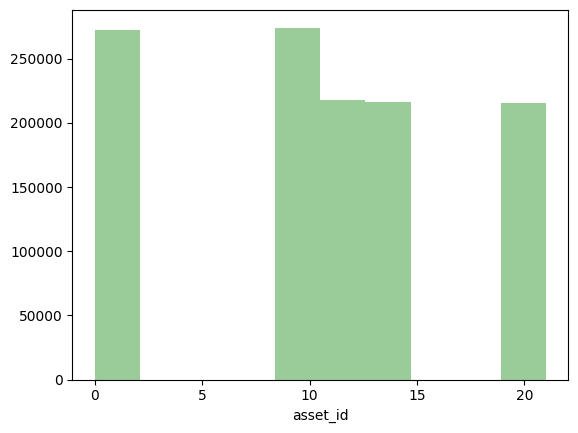

BoxPlot of asset_id
----------------------------------------------------------------------------


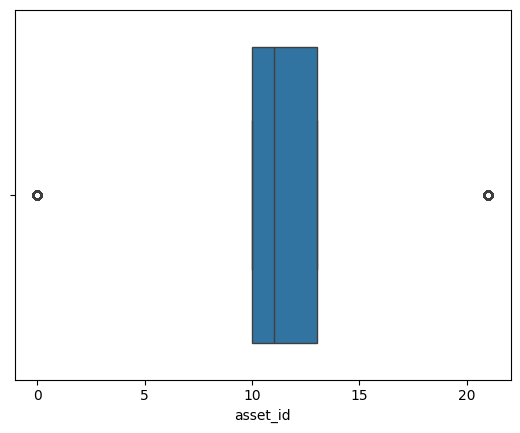

Description of id
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.720275e+04
std      1.571098e+04
min      0.000000e+00
25%      1.359900e+04
50%      2.719800e+04
75%      4.079800e+04
max      5.615700e+04
Name: id, dtype: float64 Distribution of id
----------------------------------------------------------------------------


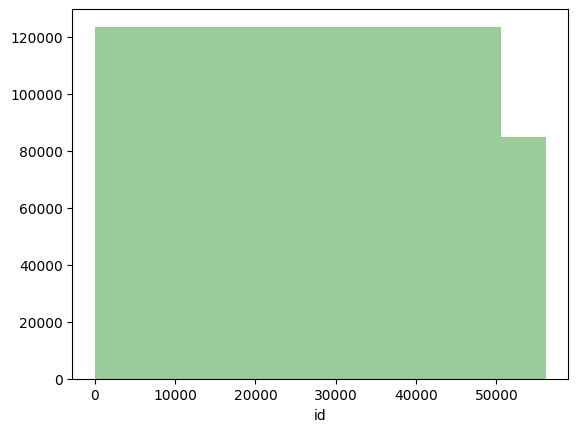

BoxPlot of id
----------------------------------------------------------------------------


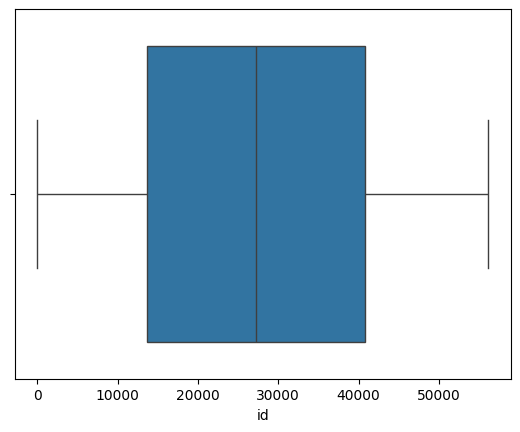

Description of status_type_id
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.490710e-01
std      4.324752e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: status_type_id, dtype: float64 Distribution of status_type_id
----------------------------------------------------------------------------


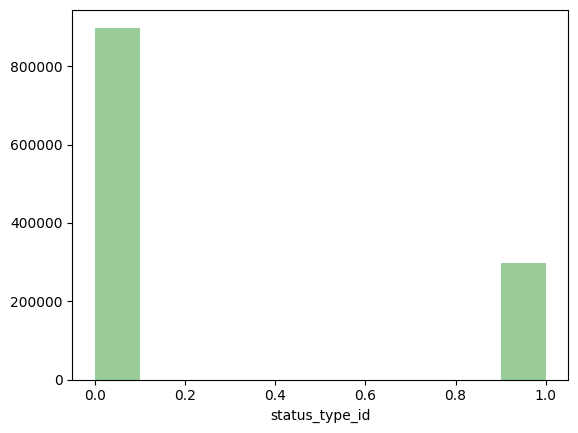

BoxPlot of status_type_id
----------------------------------------------------------------------------


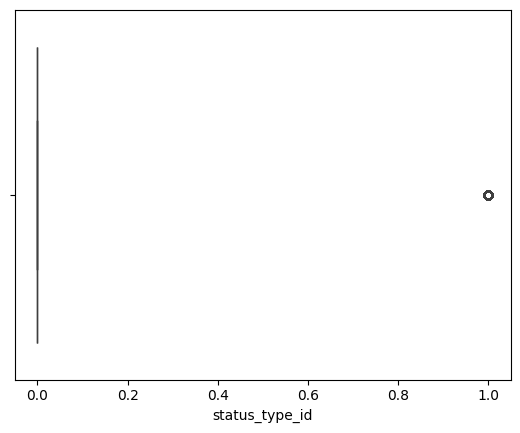

Description of Ambient temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.995072e+01
std      5.555743e+00
min      4.000000e+00
25%      1.600000e+01
50%      1.900000e+01
75%      2.400000e+01
max      4.100000e+01
Name: Ambient temperature avg, dtype: float64 Distribution of Ambient temperature avg
----------------------------------------------------------------------------


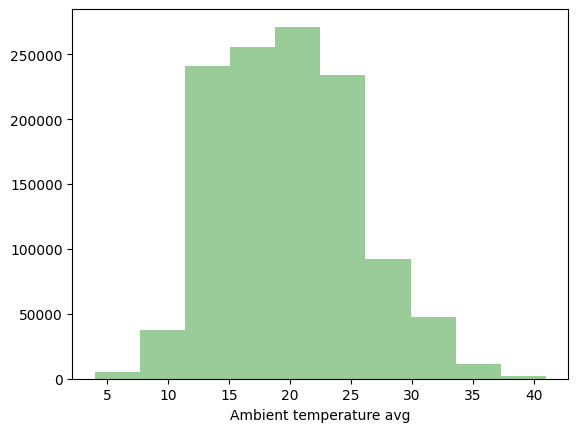

BoxPlot of Ambient temperature avg
----------------------------------------------------------------------------


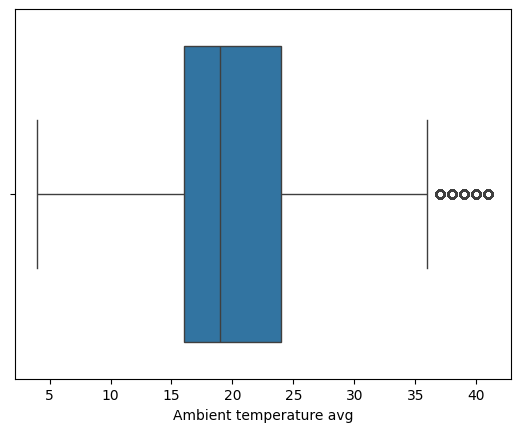

Description of Wind absolute direction avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.708527e+02
std      9.258916e+01
min      0.000000e+00
25%      9.790000e+01
50%      1.294000e+02
75%      2.601000e+02
max      3.590000e+02
Name: Wind absolute direction avg, dtype: float64 Distribution of Wind absolute direction avg
----------------------------------------------------------------------------


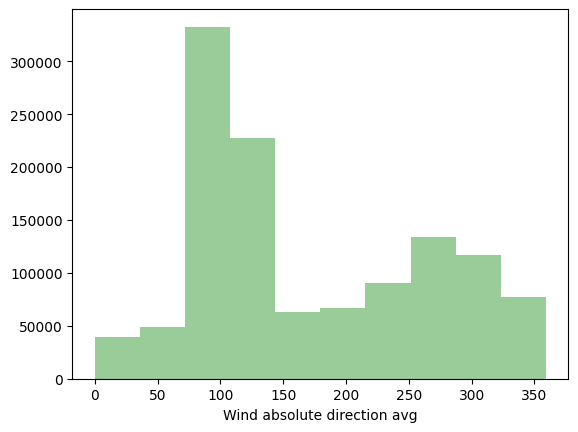

BoxPlot of Wind absolute direction avg
----------------------------------------------------------------------------


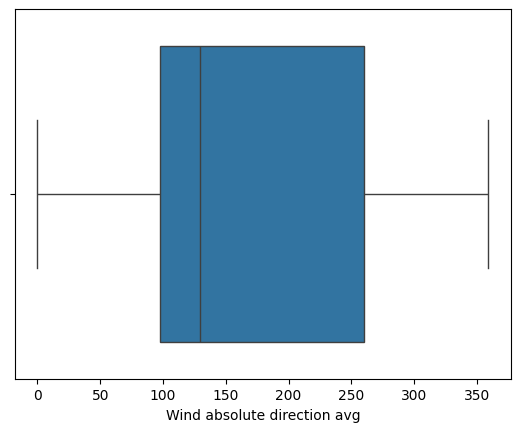

Description of Wind relative direction avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.270151e-01
std      3.276378e+01
min     -1.800000e+02
25%     -9.700000e+00
50%      2.000000e-01
75%      9.300000e+00
max      1.800000e+02
Name: Wind relative direction avg, dtype: float64 Distribution of Wind relative direction avg
----------------------------------------------------------------------------


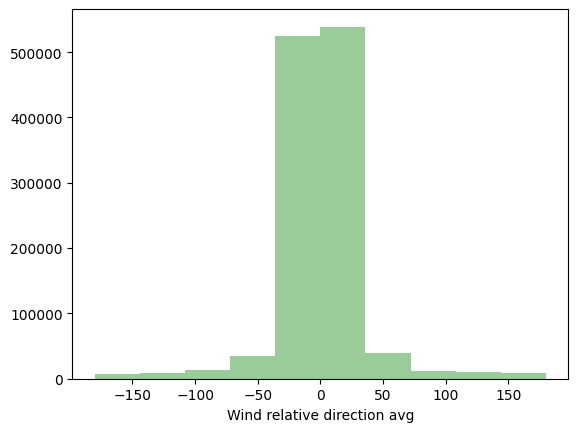

BoxPlot of Wind relative direction avg
----------------------------------------------------------------------------


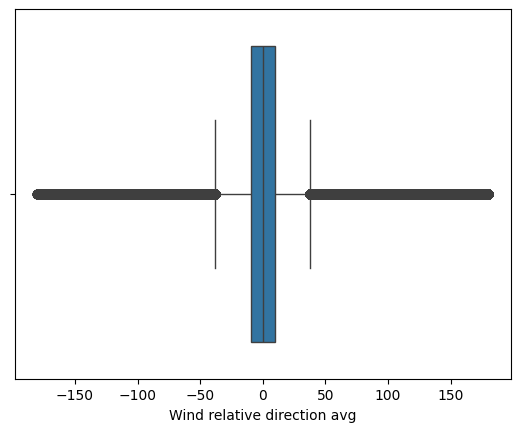

Description of Windspeed avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.201962e+00
std      3.730365e+00
min      4.000000e-01
25%      3.200000e+00
50%      5.500000e+00
75%      8.500000e+00
max      2.660000e+01
Name: Windspeed avg, dtype: float64 Distribution of Windspeed avg
----------------------------------------------------------------------------


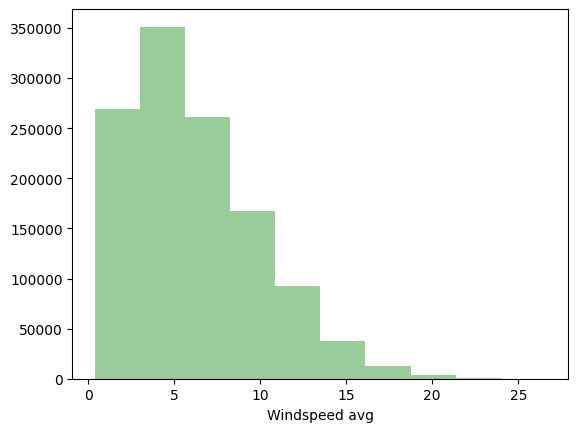

BoxPlot of Windspeed avg
----------------------------------------------------------------------------


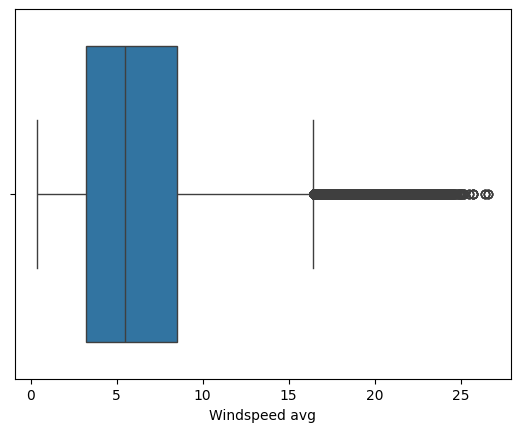

Description of Estimated windspeed avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.151001e+00
std      3.623949e+00
min      0.000000e+00
25%      3.200000e+00
50%      5.500000e+00
75%      8.400000e+00
max      2.660000e+01
Name: Estimated windspeed avg, dtype: float64 Distribution of Estimated windspeed avg
----------------------------------------------------------------------------


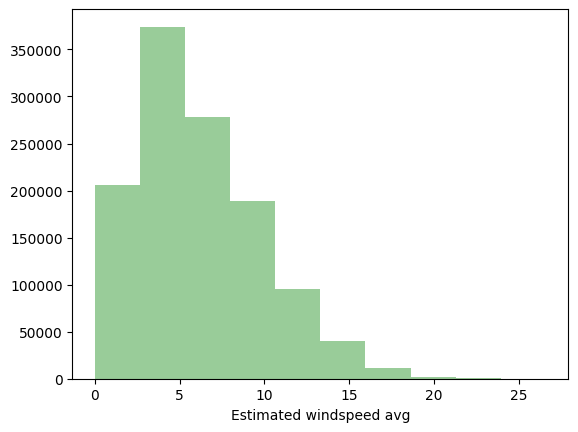

BoxPlot of Estimated windspeed avg
----------------------------------------------------------------------------


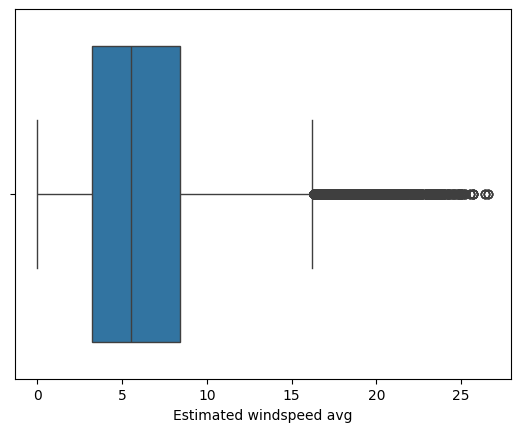

Description of Windspeed max
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.269426e+01
std      7.420963e+00
min      4.000000e-01
25%      6.900000e+00
50%      1.100000e+01
75%      1.770000e+01
max      7.000000e+01
Name: Windspeed max, dtype: float64 Distribution of Windspeed max
----------------------------------------------------------------------------


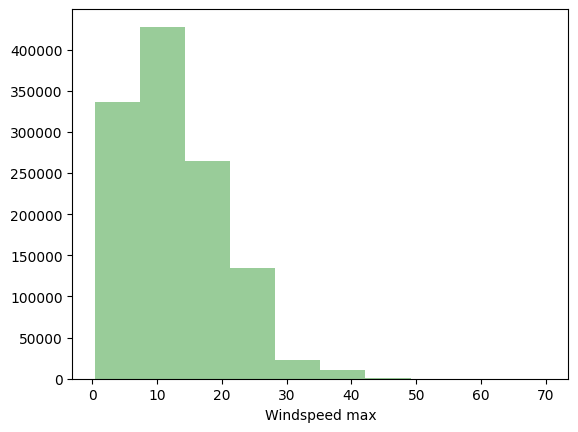

BoxPlot of Windspeed max
----------------------------------------------------------------------------


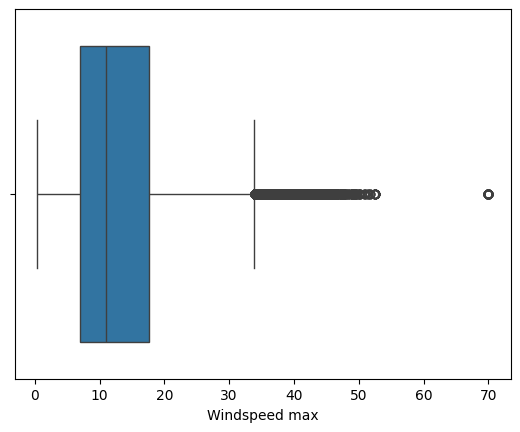

Description of Windspeed min
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.763252e+00
std      1.227410e+00
min      4.000000e-01
25%      7.000000e-01
50%      1.500000e+00
75%      2.500000e+00
max      1.460000e+01
Name: Windspeed min, dtype: float64 Distribution of Windspeed min
----------------------------------------------------------------------------


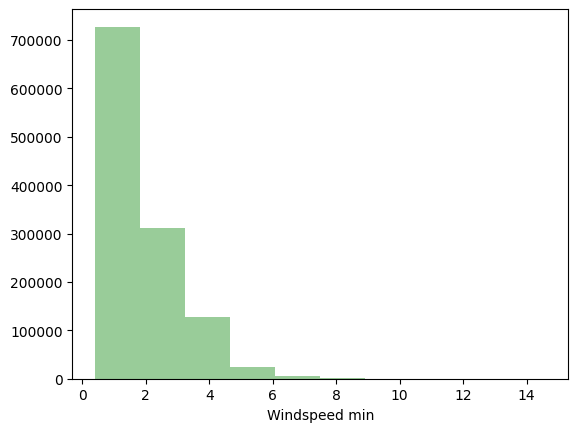

BoxPlot of Windspeed min
----------------------------------------------------------------------------


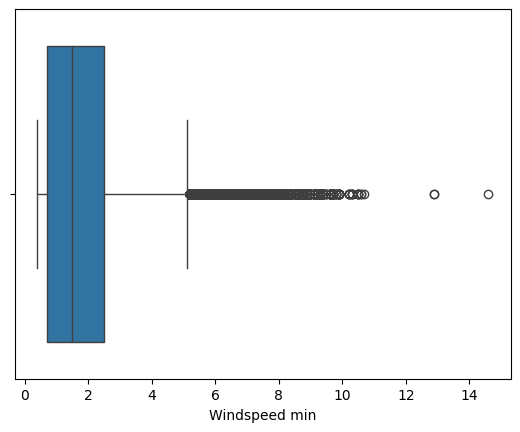

Description of Windspeed std
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.199830e+00
std      7.965747e-01
min      0.000000e+00
25%      7.000000e-01
50%      1.000000e+00
75%      1.600000e+00
max      7.000000e+01
Name: Windspeed std, dtype: float64 Distribution of Windspeed std
----------------------------------------------------------------------------


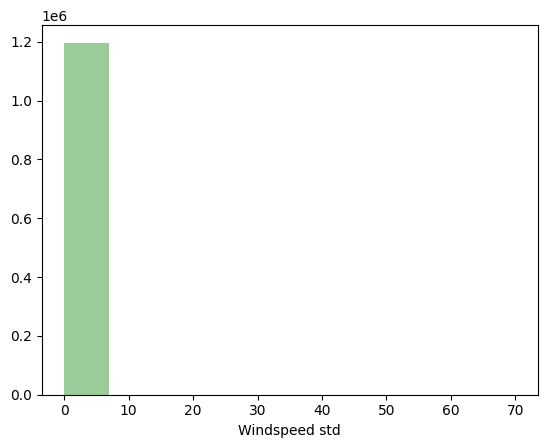

BoxPlot of Windspeed std
----------------------------------------------------------------------------


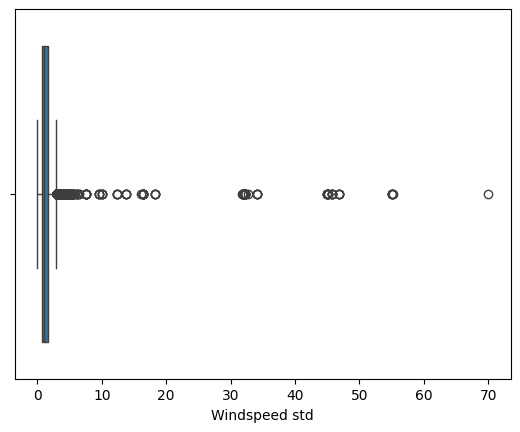

Description of Pitch angle avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     9.300237e+00
std      1.805946e+01
min     -2.300000e+00
25%     -1.700000e+00
50%     -1.000000e-01
75%      2.400000e+01
max      9.000000e+01
Name: Pitch angle avg, dtype: float64 Distribution of Pitch angle avg
----------------------------------------------------------------------------


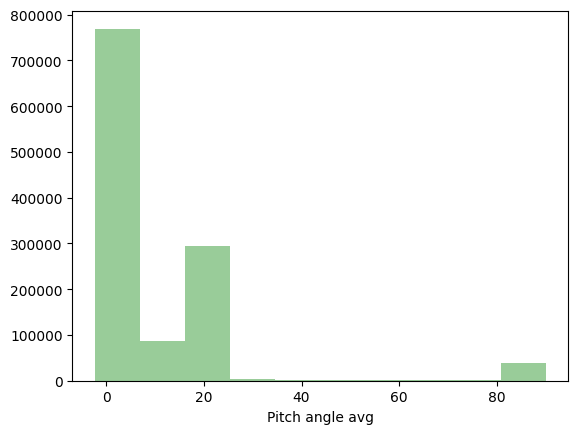

BoxPlot of Pitch angle avg
----------------------------------------------------------------------------


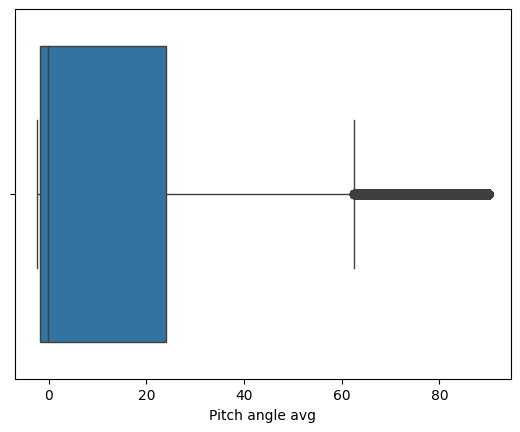

Description of Pitch angle max
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.407080e+01
std      2.074136e+01
min     -2.200000e+00
25%      2.000000e-01
50%      4.500000e+00
75%      2.400000e+01
max      9.000000e+01
Name: Pitch angle max, dtype: float64 Distribution of Pitch angle max
----------------------------------------------------------------------------


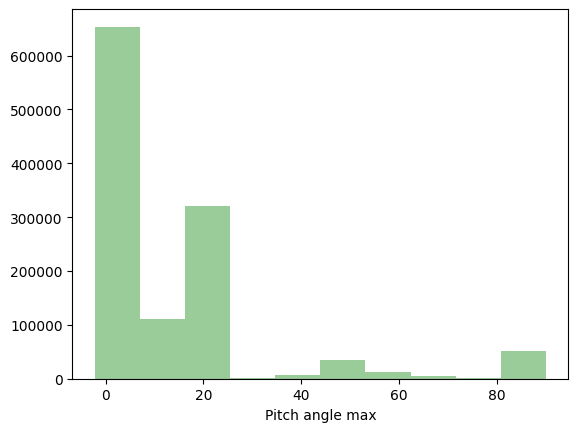

BoxPlot of Pitch angle max
----------------------------------------------------------------------------


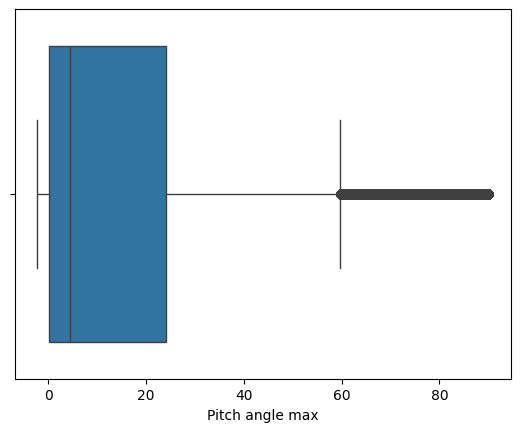

Description of Pitch angle min
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.578367e+00
std      1.796867e+01
min     -5.000000e+00
25%     -2.400000e+00
50%     -2.200000e+00
75%      2.060000e+01
max      9.000000e+01
Name: Pitch angle min, dtype: float64 Distribution of Pitch angle min
----------------------------------------------------------------------------


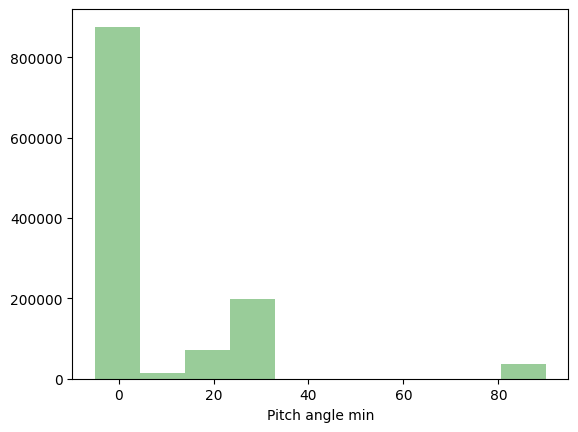

BoxPlot of Pitch angle min
----------------------------------------------------------------------------


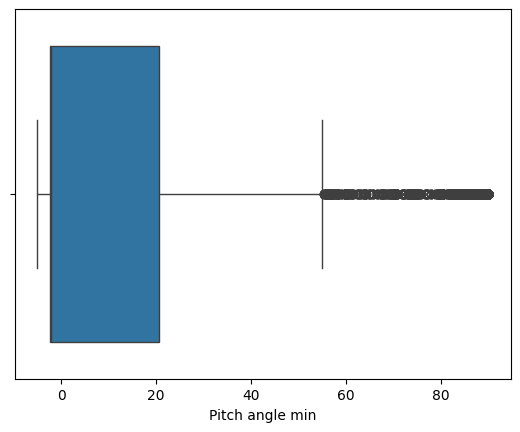

Description of Pitch angle std
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.756980e+00
std      4.182710e+00
min      0.000000e+00
25%      1.000000e-01
50%      4.000000e-01
75%      1.100000e+00
max      4.550000e+01
Name: Pitch angle std, dtype: float64 Distribution of Pitch angle std
----------------------------------------------------------------------------


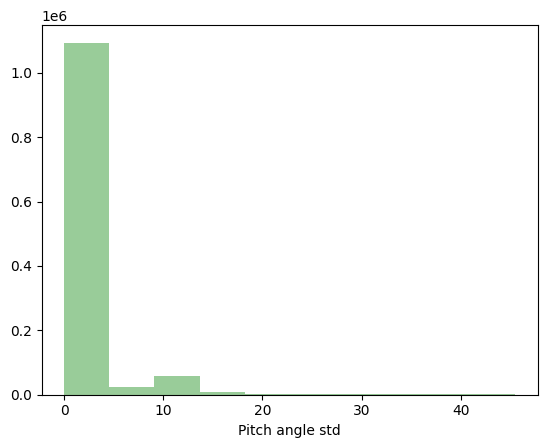

BoxPlot of Pitch angle std
----------------------------------------------------------------------------


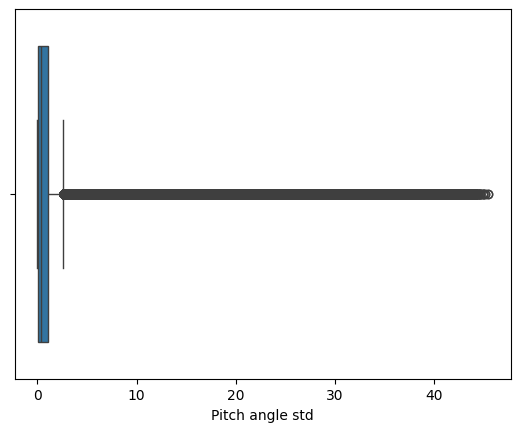

Description of Hub controller temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.981558e+01
std      5.484780e+00
min      1.100000e+01
25%      2.600000e+01
50%      3.000000e+01
75%      3.300000e+01
max      5.200000e+01
Name: Hub controller temperature avg, dtype: float64 Distribution of Hub controller temperature avg
----------------------------------------------------------------------------


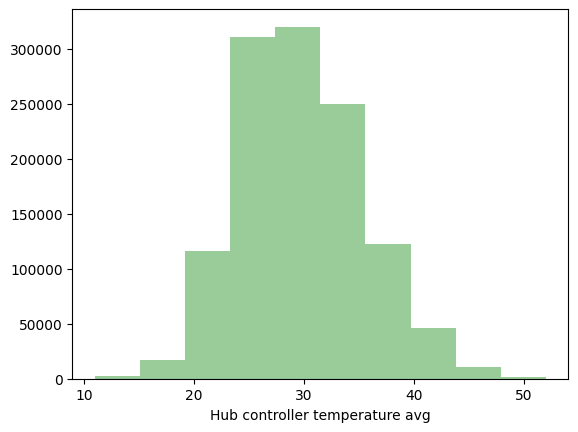

BoxPlot of Hub controller temperature avg
----------------------------------------------------------------------------


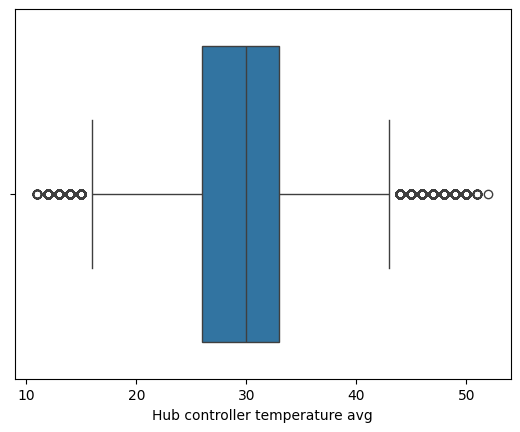

Description of Top nacelle controller temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.979224e+01
std      5.709403e+00
min      2.200000e+01
25%      3.500000e+01
50%      4.000000e+01
75%      4.300000e+01
max      5.900000e+01
Name: Top nacelle controller temperature avg, dtype: float64 Distribution of Top nacelle controller temperature avg
----------------------------------------------------------------------------


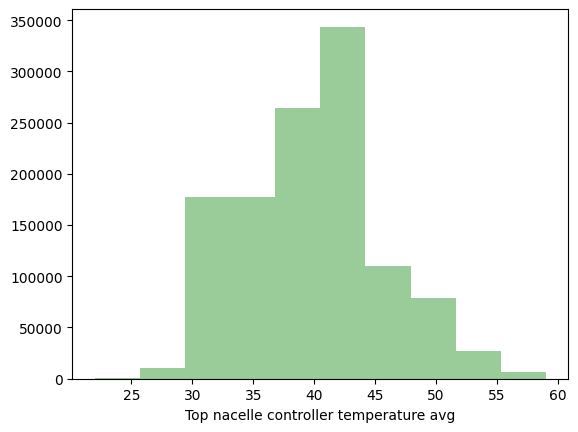

BoxPlot of Top nacelle controller temperature avg
----------------------------------------------------------------------------


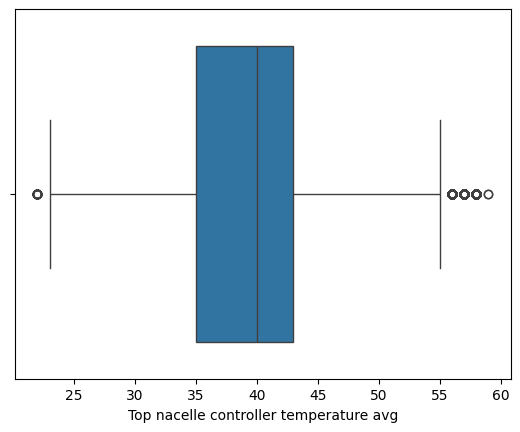

Description of Choke coils on the VCS- section temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     7.962031e+01
std      2.965645e+01
min      1.300000e+01
25%      5.500000e+01
50%      8.900000e+01
75%      1.010000e+02
max      1.490000e+02
Name: Choke coils on the VCS- section temperature avg, dtype: float64 Distribution of Choke coils on the VCS- section temperature avg
----------------------------------------------------------------------------


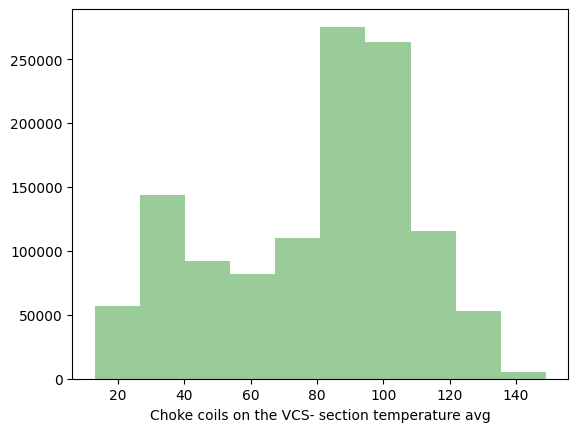

BoxPlot of Choke coils on the VCS- section temperature avg
----------------------------------------------------------------------------


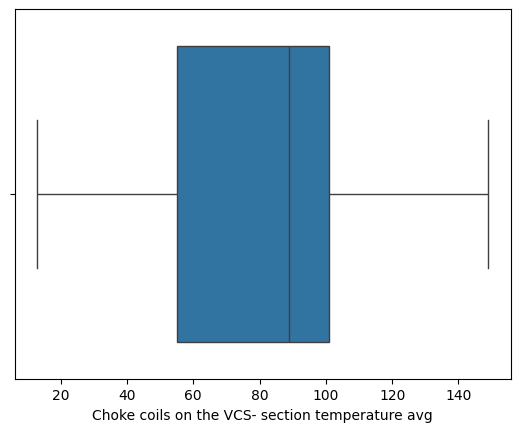

Description of VCP-board temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.025494e+01
std      5.710677e+00
min      2.500000e+01
25%      3.600000e+01
50%      4.100000e+01
75%      4.400000e+01
max      6.600000e+01
Name: VCP-board temperature avg, dtype: float64 Distribution of VCP-board temperature avg
----------------------------------------------------------------------------


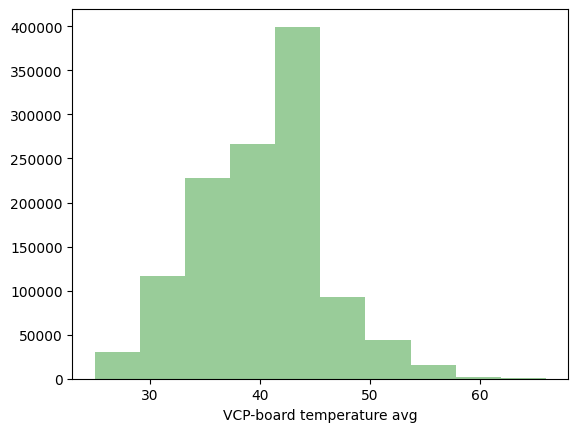

BoxPlot of VCP-board temperature avg
----------------------------------------------------------------------------


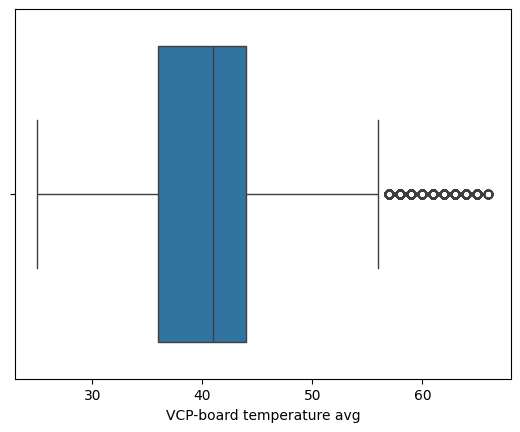

Description of VCS cooling water temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.681722e+01
std      5.058963e+00
min      2.000000e+01
25%      3.400000e+01
50%      3.800000e+01
75%      3.900000e+01
max      5.600000e+01
Name: VCS cooling water temperature avg, dtype: float64 Distribution of VCS cooling water temperature avg
----------------------------------------------------------------------------


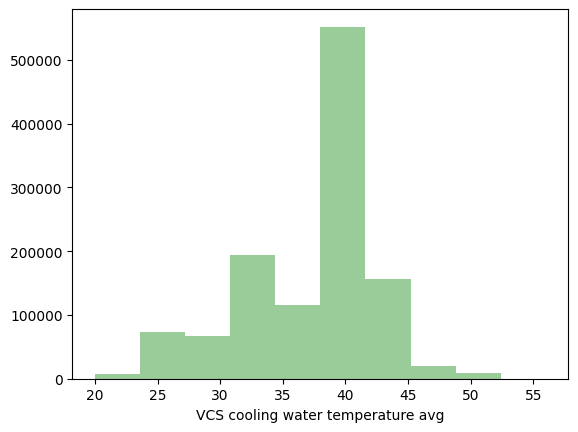

BoxPlot of VCS cooling water temperature avg
----------------------------------------------------------------------------


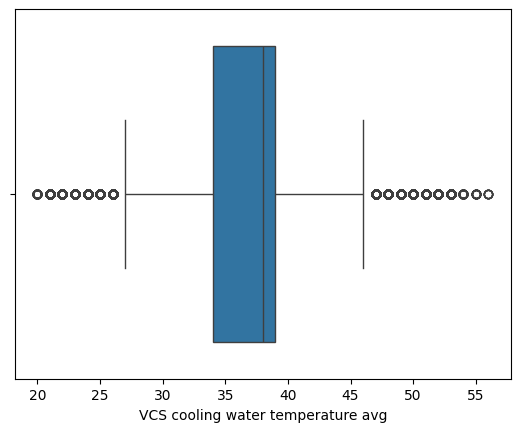

Description of Gearbox bearing on high speed shaft  temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     5.162426e+01
std      1.024465e+01
min      1.500000e+01
25%      4.400000e+01
50%      5.300000e+01
75%      6.000000e+01
max      7.200000e+01
Name: Gearbox bearing on high speed shaft  temperature avg, dtype: float64 Distribution of Gearbox bearing on high speed shaft  temperature avg
----------------------------------------------------------------------------


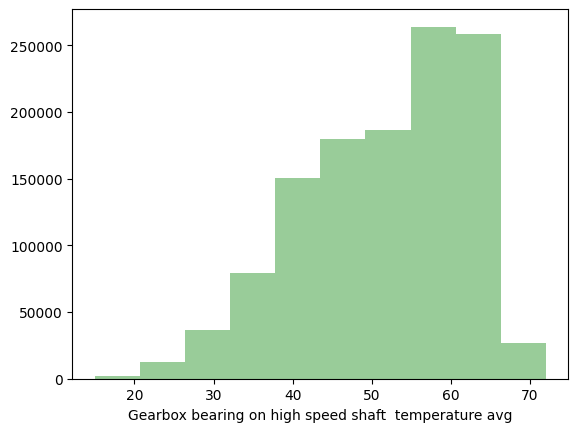

BoxPlot of Gearbox bearing on high speed shaft  temperature avg
----------------------------------------------------------------------------


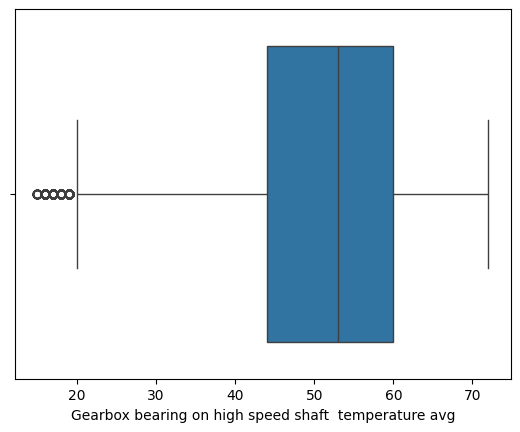

Description of Gearbox oil temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.760503e+01
std      7.155284e+00
min      1.500000e+01
25%      4.300000e+01
50%      4.900000e+01
75%      5.300000e+01
max      6.500000e+01
Name: Gearbox oil temperature avg, dtype: float64 Distribution of Gearbox oil temperature avg
----------------------------------------------------------------------------


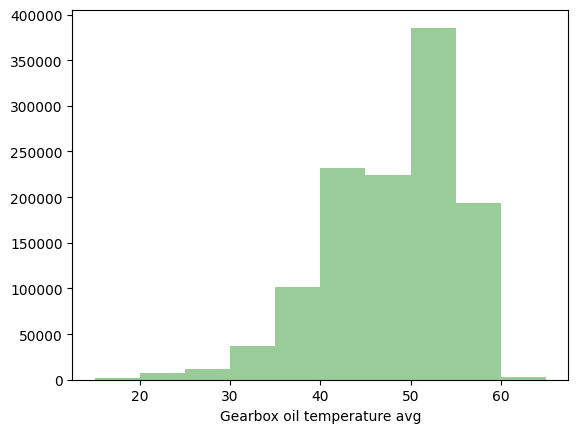

BoxPlot of Gearbox oil temperature avg
----------------------------------------------------------------------------


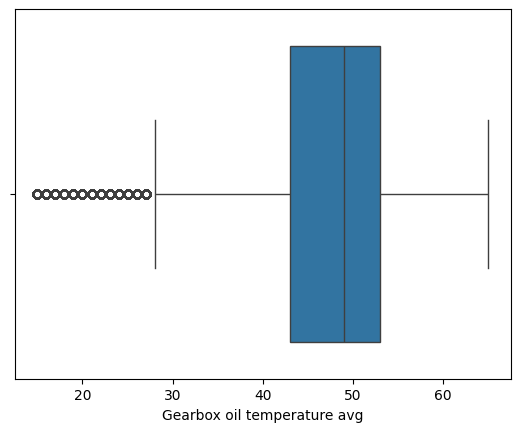

Description of Generator bearing 2(Drive end)  temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.367107e+01
std      1.423857e+01
min      1.300000e+01
25%      3.300000e+01
50%      4.200000e+01
75%      5.300000e+01
max      2.050000e+02
Name: Generator bearing 2(Drive end)  temperature avg, dtype: float64 Distribution of Generator bearing 2(Drive end)  temperature avg
----------------------------------------------------------------------------


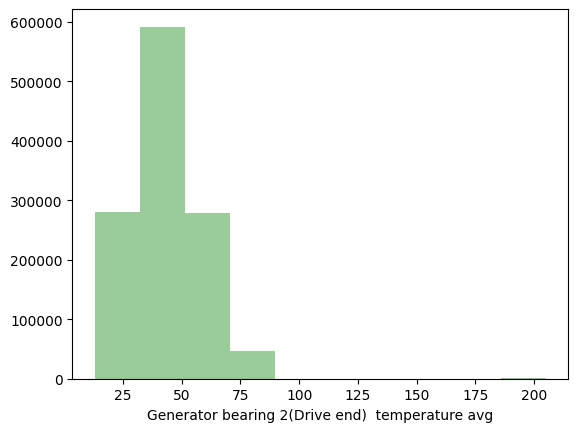

BoxPlot of Generator bearing 2(Drive end)  temperature avg
----------------------------------------------------------------------------


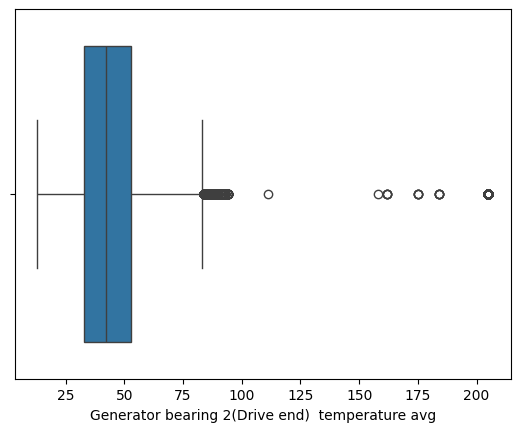

Description of Generator bearing 1(Non-drive end) temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.735247e+01
std      1.833235e+01
min      1.200000e+01
25%      3.500000e+01
50%      4.400000e+01
75%      5.700000e+01
max      2.050000e+02
Name: Generator bearing 1(Non-drive end) temperature avg, dtype: float64 Distribution of Generator bearing 1(Non-drive end) temperature avg
----------------------------------------------------------------------------


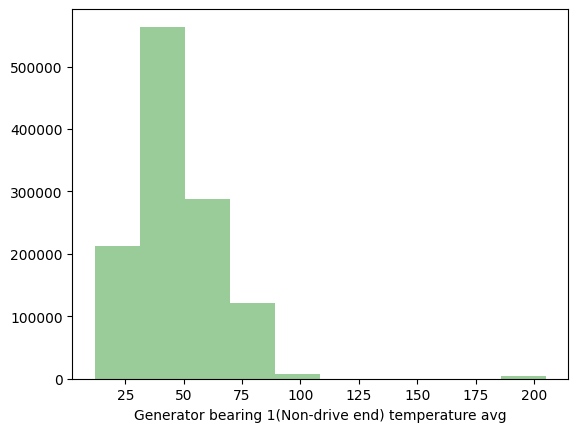

BoxPlot of Generator bearing 1(Non-drive end) temperature avg
----------------------------------------------------------------------------


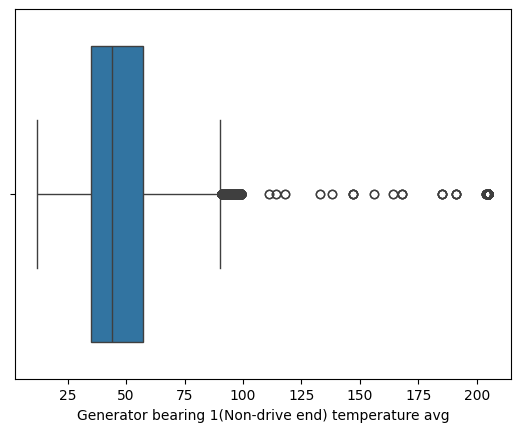

Description of Generator stator winding phase 1 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.564175e+01
std      2.897976e+01
min      1.400000e+01
25%      4.300000e+01
50%      6.100000e+01
75%      8.000000e+01
max      2.050000e+02
Name: Generator stator winding phase 1 temperature avg, dtype: float64 Distribution of Generator stator winding phase 1 temperature avg
----------------------------------------------------------------------------


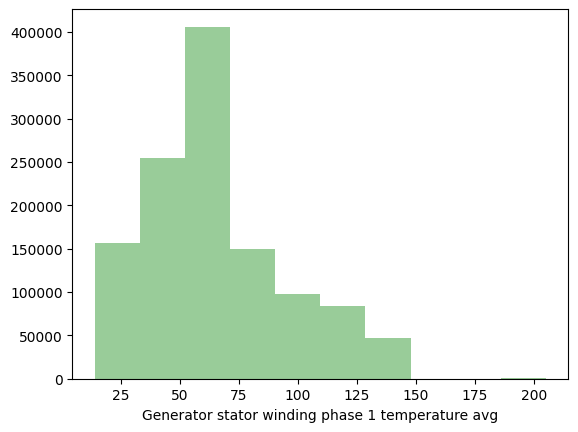

BoxPlot of Generator stator winding phase 1 temperature avg
----------------------------------------------------------------------------


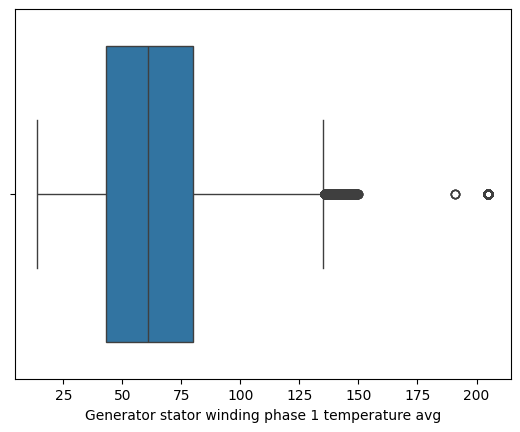

Description of Generator stator winding phase 2 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.511300e+01
std      2.784481e+01
min      1.400000e+01
25%      4.300000e+01
50%      6.200000e+01
75%      7.900000e+01
max      2.050000e+02
Name: Generator stator winding phase 2 temperature avg, dtype: float64 Distribution of Generator stator winding phase 2 temperature avg
----------------------------------------------------------------------------


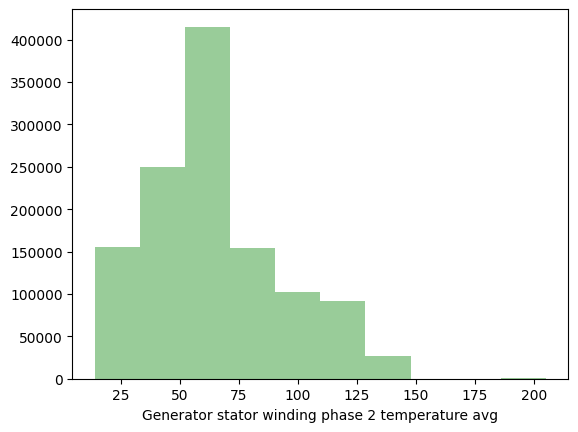

BoxPlot of Generator stator winding phase 2 temperature avg
----------------------------------------------------------------------------


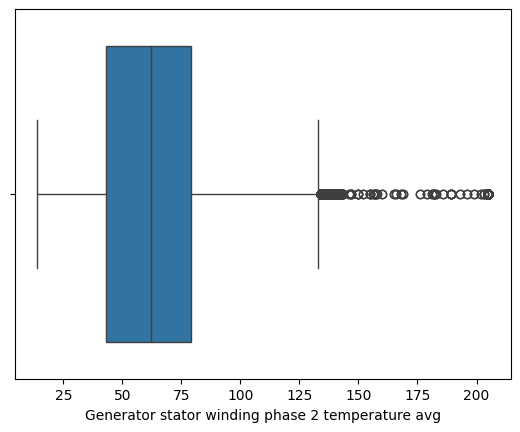

Description of Generator stator winding phase 3 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.478819e+01
std      2.744865e+01
min      1.400000e+01
25%      4.300000e+01
50%      6.100000e+01
75%      7.900000e+01
max      2.050000e+02
Name: Generator stator winding phase 3 temperature avg, dtype: float64 Distribution of Generator stator winding phase 3 temperature avg
----------------------------------------------------------------------------


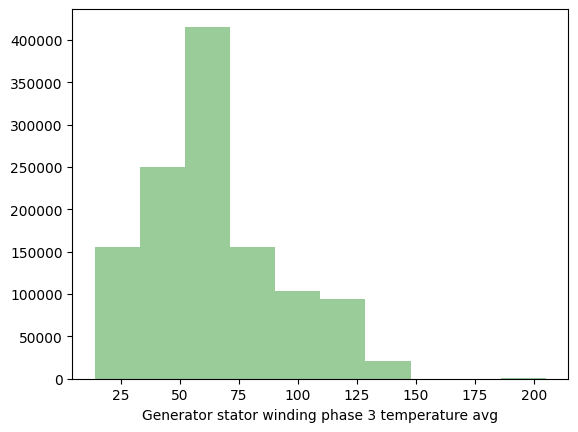

BoxPlot of Generator stator winding phase 3 temperature avg
----------------------------------------------------------------------------


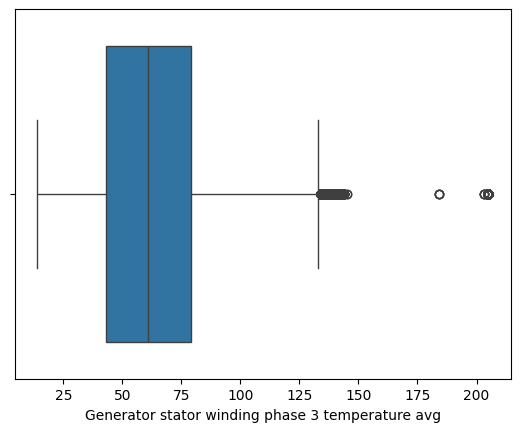

Description of Generator rpm avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.071343e+03
std      6.159401e+02
min      0.000000e+00
25%      2.728000e+02
50%      1.283900e+03
75%      1.606200e+03
max      1.684400e+03
Name: Generator rpm avg, dtype: float64 Distribution of Generator rpm avg
----------------------------------------------------------------------------


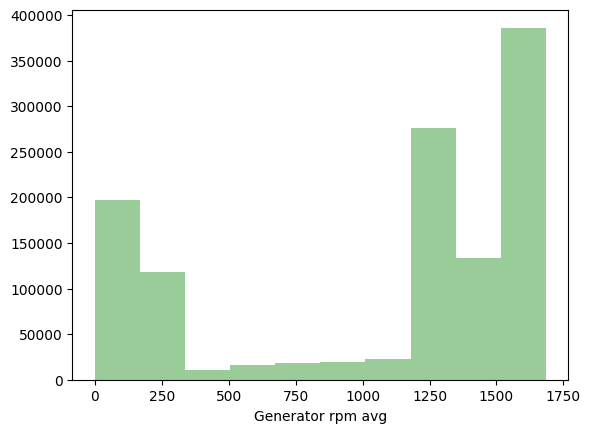

BoxPlot of Generator rpm avg
----------------------------------------------------------------------------


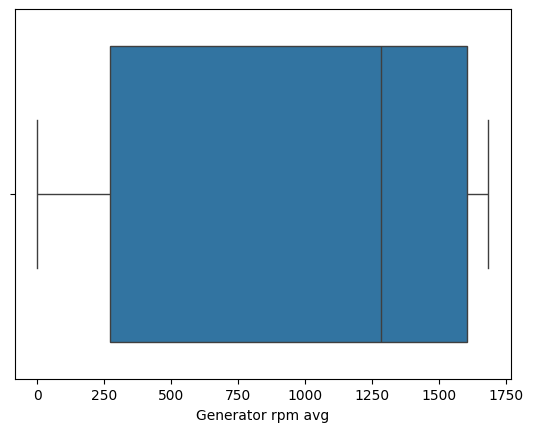

Description of Generator rpm max
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.194700e+03
std      6.386016e+02
min      0.000000e+00
25%      3.134000e+02
50%      1.437800e+03
75%      1.685100e+03
max      2.040900e+03
Name: Generator rpm max, dtype: float64 Distribution of Generator rpm max
----------------------------------------------------------------------------


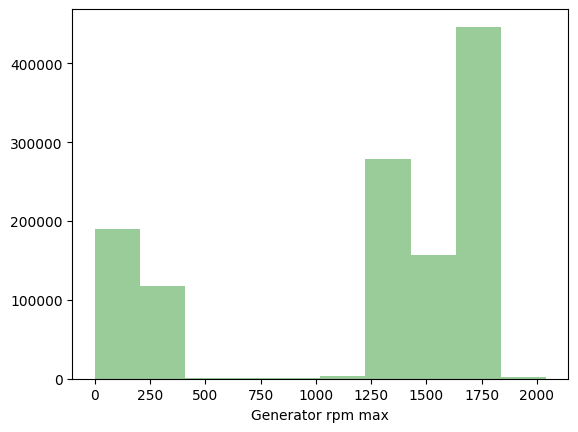

BoxPlot of Generator rpm max
----------------------------------------------------------------------------


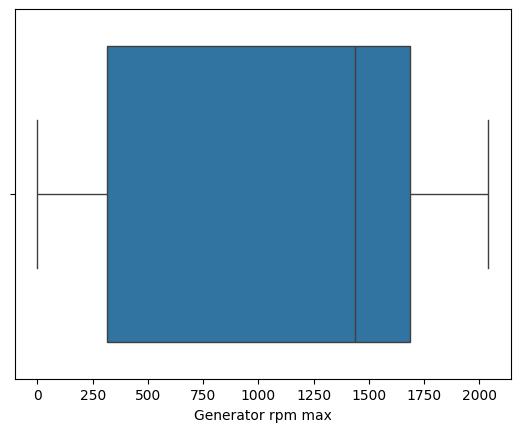

Description of Generator rpm min
----------------------------------------------------------------------------
count    1.196747e+06
mean     9.403149e+02
std      6.138813e+02
min      0.000000e+00
25%      1.907000e+02
50%      1.232400e+03
75%      1.394000e+03
max      1.675500e+03
Name: Generator rpm min, dtype: float64 Distribution of Generator rpm min
----------------------------------------------------------------------------


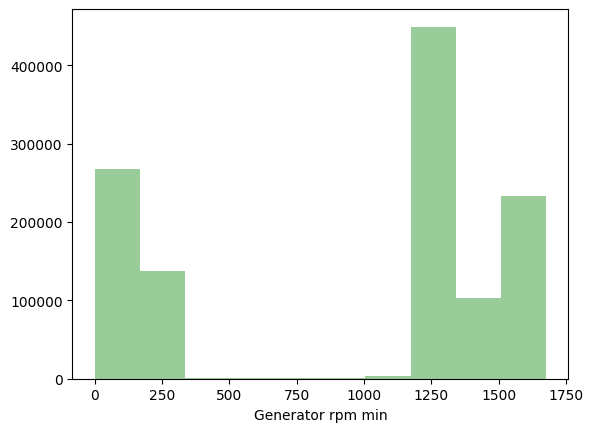

BoxPlot of Generator rpm min
----------------------------------------------------------------------------


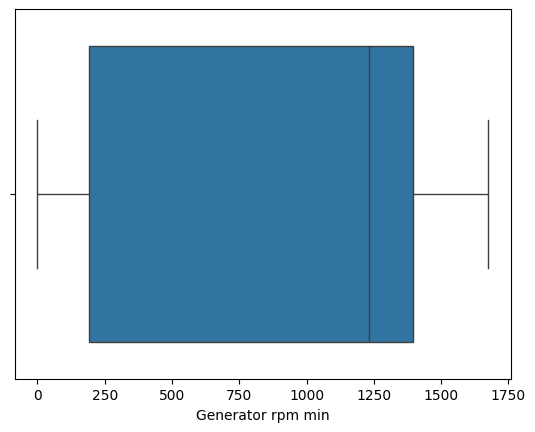

Description of Generator rpm std
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.770469e+01
std      1.107881e+02
min      0.000000e+00
25%      1.380000e+01
50%      2.820000e+01
75%      6.970000e+01
max      8.232000e+02
Name: Generator rpm std, dtype: float64 Distribution of Generator rpm std
----------------------------------------------------------------------------


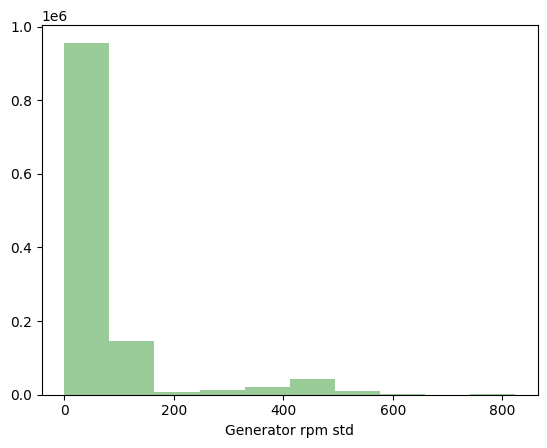

BoxPlot of Generator rpm std
----------------------------------------------------------------------------


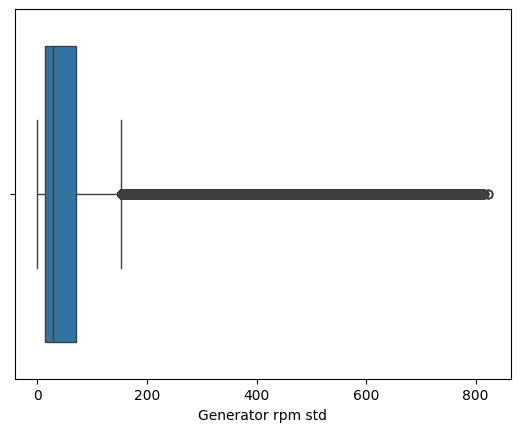

Description of Split ring chamber temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.030582e+01
std      8.600629e+00
min      1.000000e+01
25%      2.400000e+01
50%      2.900000e+01
75%      3.600000e+01
max      2.050000e+02
Name: Split ring chamber temperature avg, dtype: float64 Distribution of Split ring chamber temperature avg
----------------------------------------------------------------------------


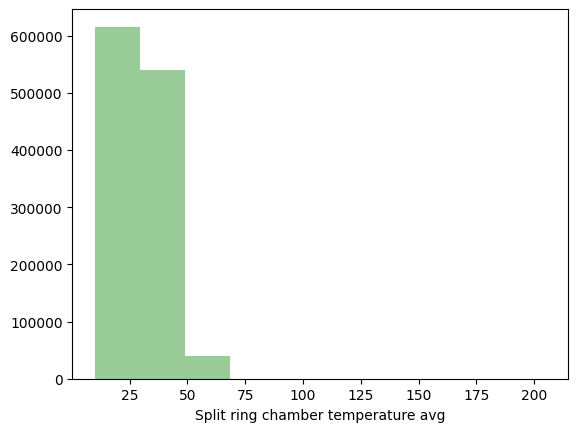

BoxPlot of Split ring chamber temperature avg
----------------------------------------------------------------------------


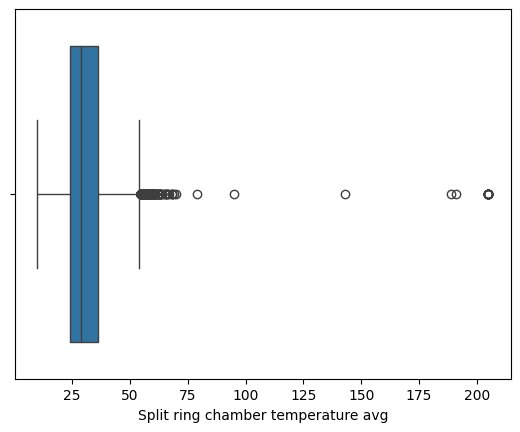

Description of Busbar section temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.761928e+01
std      7.743049e+00
min      1.700000e+01
25%      3.300000e+01
50%      3.800000e+01
75%      4.200000e+01
max      7.700000e+01
Name: Busbar section temperature avg, dtype: float64 Distribution of Busbar section temperature avg
----------------------------------------------------------------------------


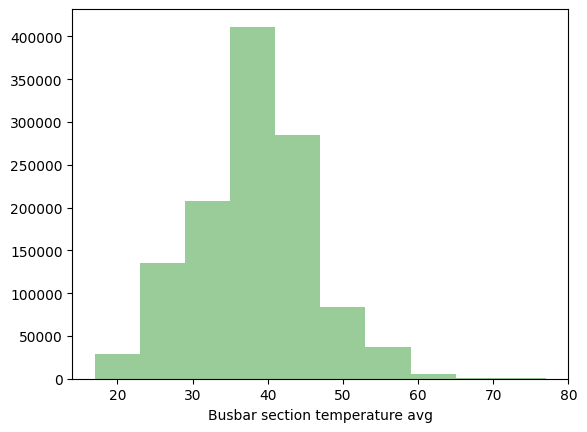

BoxPlot of Busbar section temperature avg
----------------------------------------------------------------------------


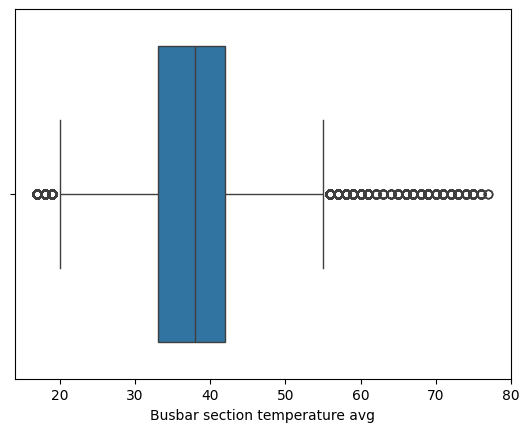

Description of IGBT-driver on grid side inverter temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.825405e+01
std      5.187035e+00
min      2.400000e+01
25%      3.500000e+01
50%      3.900000e+01
75%      4.100000e+01
max      5.900000e+01
Name: IGBT-driver on grid side inverter temperature avg, dtype: float64 Distribution of IGBT-driver on grid side inverter temperature avg
----------------------------------------------------------------------------


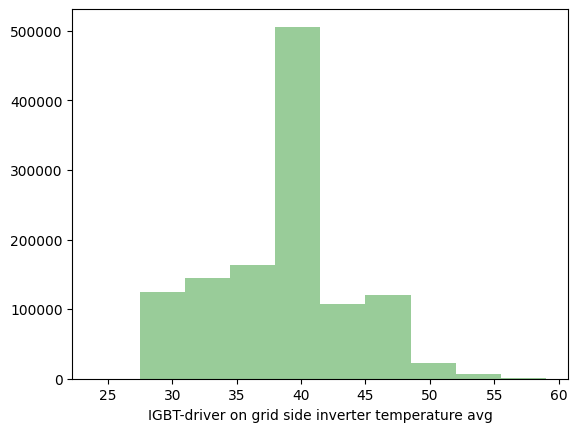

BoxPlot of IGBT-driver on grid side inverter temperature avg
----------------------------------------------------------------------------


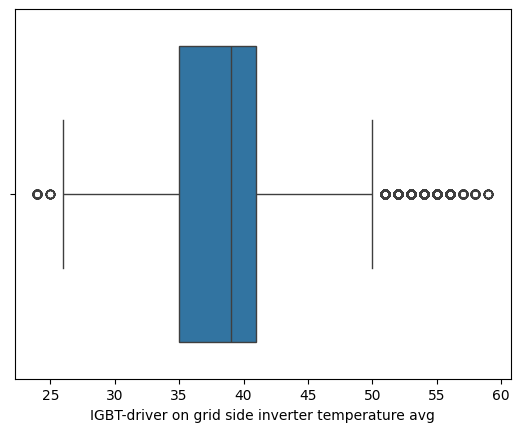

Description of Actual Phase displacement avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     8.474863e-01
std      1.850226e-01
min      2.000000e-01
25%      7.000000e-01
50%      9.000000e-01
75%      1.000000e+00
max      1.000000e+00
Name: Actual Phase displacement avg, dtype: float64 Distribution of Actual Phase displacement avg
----------------------------------------------------------------------------


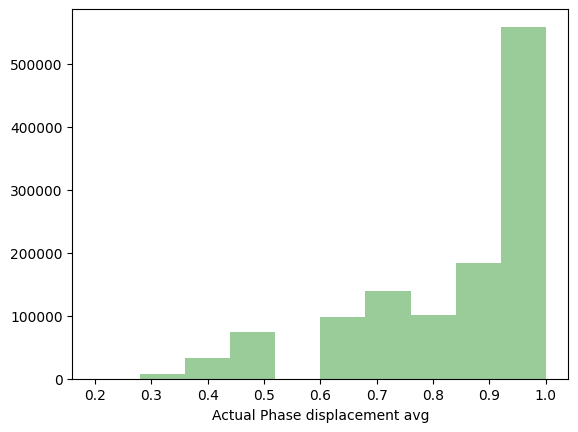

BoxPlot of Actual Phase displacement avg
----------------------------------------------------------------------------


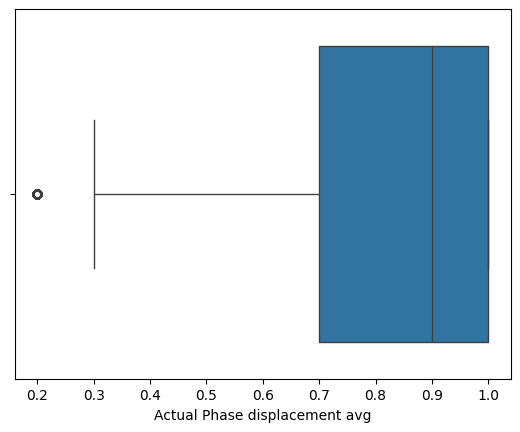

Description of Averaged current phase 1
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.809533e+02
std      5.601934e+02
min      0.000000e+00
25%      1.670000e+01
50%      2.140000e+02
75%      8.115000e+02
max      1.701800e+03
Name: Averaged current phase 1, dtype: float64 Distribution of Averaged current phase 1
----------------------------------------------------------------------------


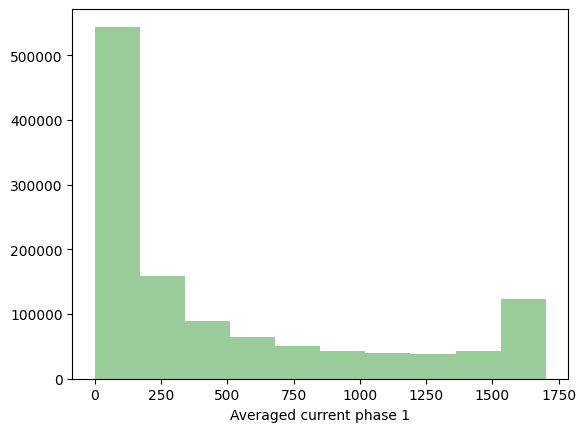

BoxPlot of Averaged current phase 1
----------------------------------------------------------------------------


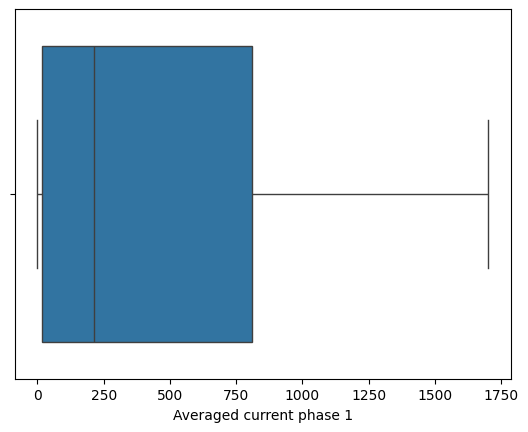

Description of Averaged current phase 2
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.969366e+02
std      5.656972e+02
min      1.000000e+00
25%      1.630000e+01
50%      2.384000e+02
75%      8.375000e+02
max      1.717600e+03
Name: Averaged current phase 2, dtype: float64 Distribution of Averaged current phase 2
----------------------------------------------------------------------------


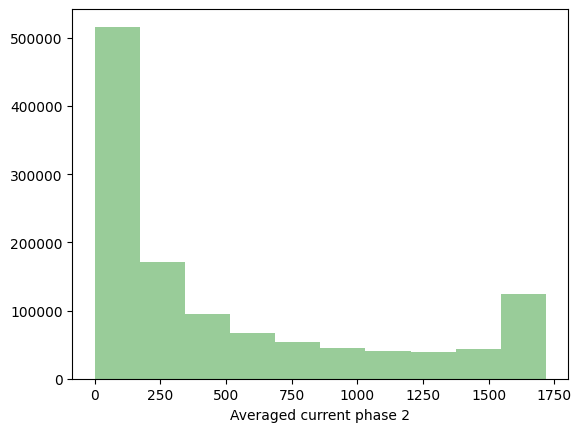

BoxPlot of Averaged current phase 2
----------------------------------------------------------------------------


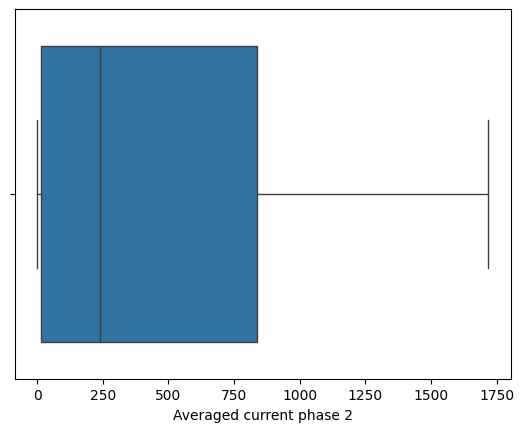

Description of Averaged current phase 3
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.806145e+02
std      5.557151e+02
min      1.000000e+00
25%      1.760000e+01
50%      2.190000e+02
75%      8.105000e+02
max      1.690500e+03
Name: Averaged current phase 3, dtype: float64 Distribution of Averaged current phase 3
----------------------------------------------------------------------------


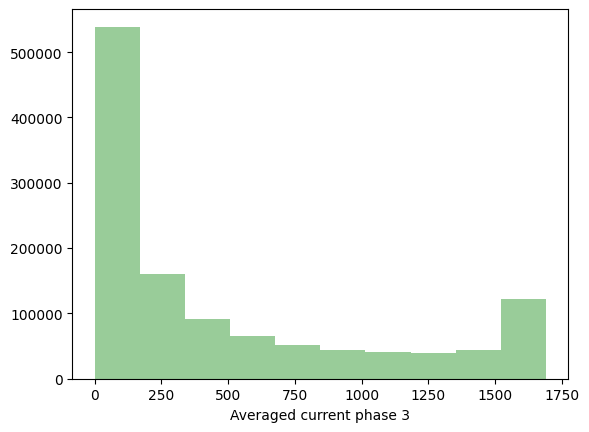

BoxPlot of Averaged current phase 3
----------------------------------------------------------------------------


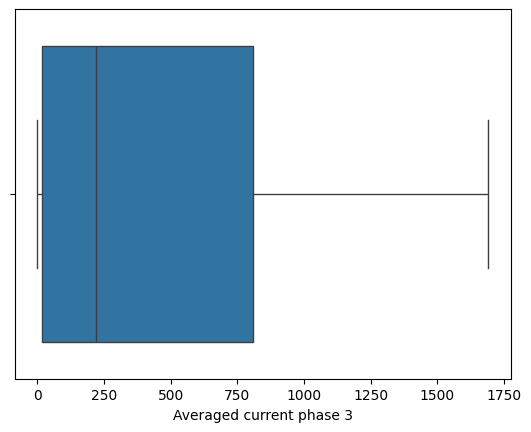

Description of Grid frequency
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.999950e+01
std      4.734148e-02
min      0.000000e+00
25%      5.000000e+01
50%      5.000000e+01
75%      5.000000e+01
max      5.010000e+01
Name: Grid frequency, dtype: float64 Distribution of Grid frequency
----------------------------------------------------------------------------


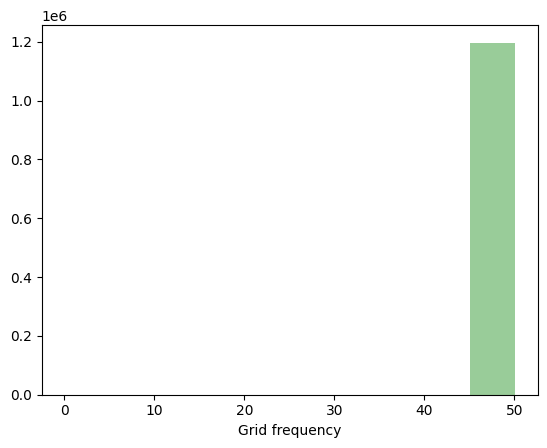

BoxPlot of Grid frequency
----------------------------------------------------------------------------


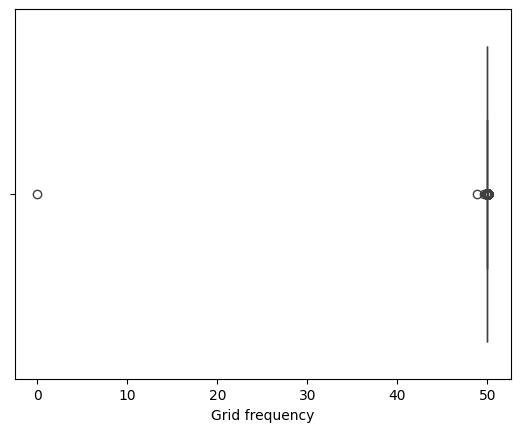

Description of Possible Grid capacitive reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.497976e-01
std      1.997786e-01
min      0.000000e+00
25%      0.000000e+00
50%      2.525854e-01
75%      4.711220e-01
max      4.878049e-01
Name: Possible Grid capacitive reactive power avg, dtype: float64 Distribution of Possible Grid capacitive reactive power avg
----------------------------------------------------------------------------


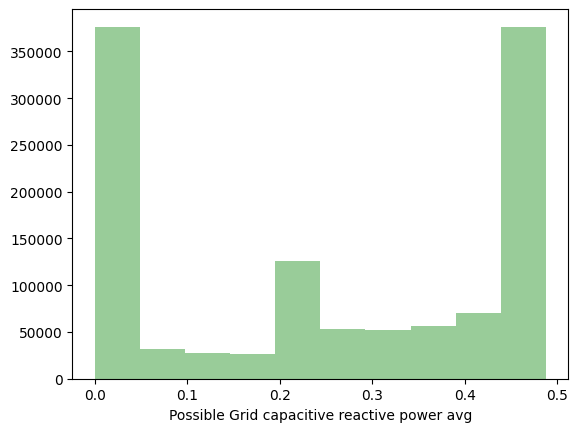

BoxPlot of Possible Grid capacitive reactive power avg
----------------------------------------------------------------------------


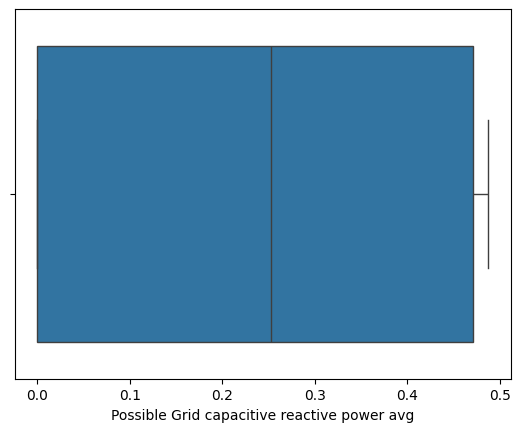

Description of Possible Grid capacitive reactive power max
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.271464e-01
std      2.122464e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.878049e-01
75%      4.878049e-01
max      4.878049e-01
Name: Possible Grid capacitive reactive power max, dtype: float64 Distribution of Possible Grid capacitive reactive power max
----------------------------------------------------------------------------


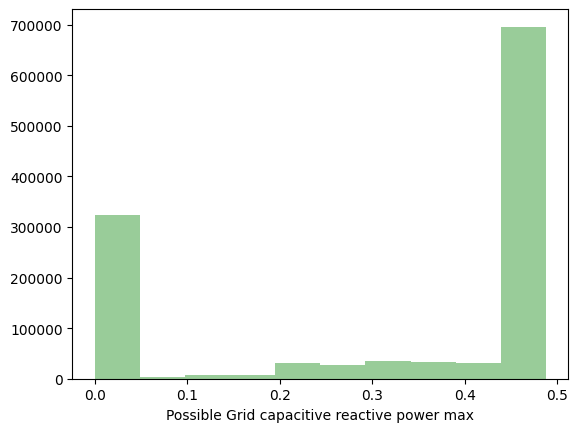

BoxPlot of Possible Grid capacitive reactive power max
----------------------------------------------------------------------------


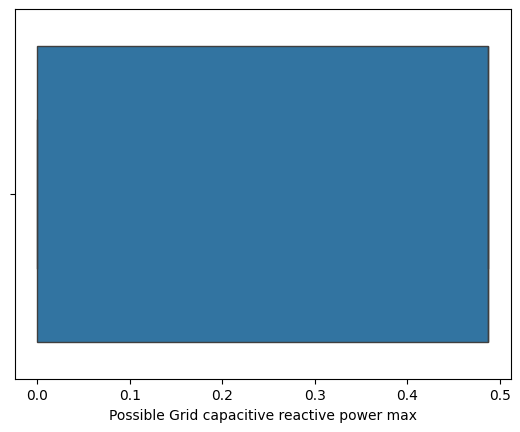

Description of Possible Grid capacitive reactive power min
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.614124e-01
std      1.742534e-01
min     -9.756098e-02
25%      0.000000e+00
50%      1.552195e-01
75%      2.534146e-01
max      4.878049e-01
Name: Possible Grid capacitive reactive power min, dtype: float64 Distribution of Possible Grid capacitive reactive power min
----------------------------------------------------------------------------


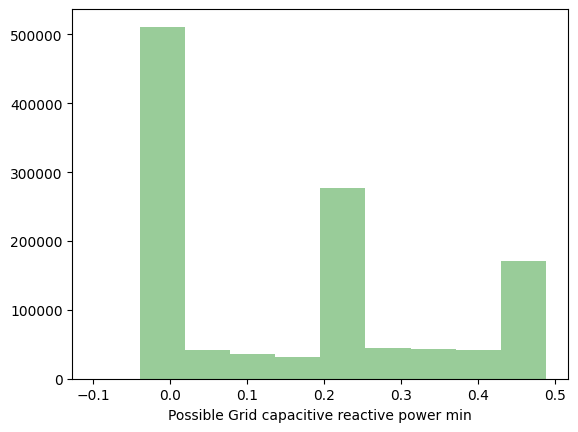

BoxPlot of Possible Grid capacitive reactive power min
----------------------------------------------------------------------------


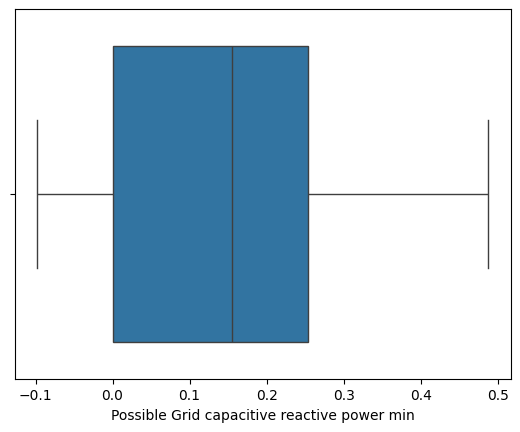

Description of Possible Grid capacitive reactive power std
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.011959e-02
std      4.855868e-02
min      0.000000e+00
25%      0.000000e+00
50%      1.560976e-02
75%      7.526829e-02
max      2.439024e-01
Name: Possible Grid capacitive reactive power std, dtype: float64 Distribution of Possible Grid capacitive reactive power std
----------------------------------------------------------------------------


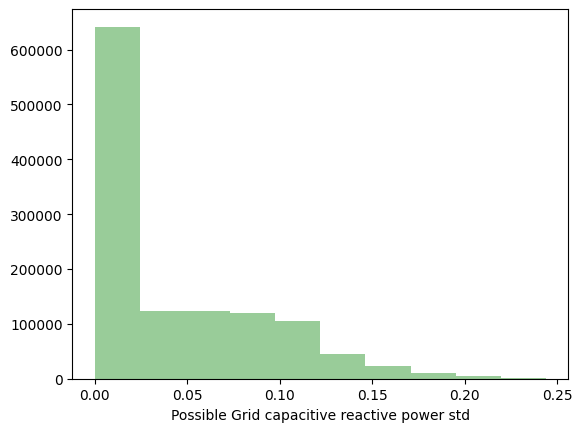

BoxPlot of Possible Grid capacitive reactive power std
----------------------------------------------------------------------------


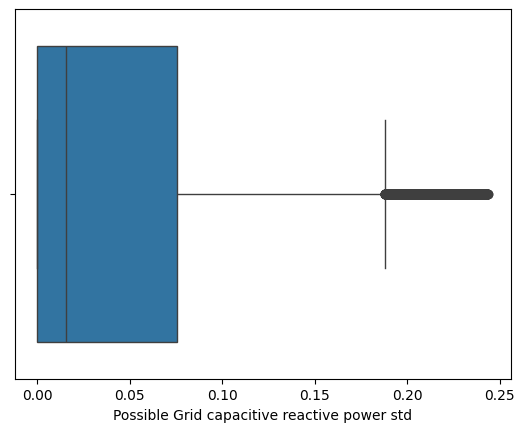

Description of Possible Grid inductive reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -2.661304e-01
std      2.050259e-01
min     -4.878049e-01
25%     -4.817073e-01
50%     -3.111707e-01
75%      0.000000e+00
max      0.000000e+00
Name: Possible Grid inductive reactive power avg, dtype: float64 Distribution of Possible Grid inductive reactive power avg
----------------------------------------------------------------------------


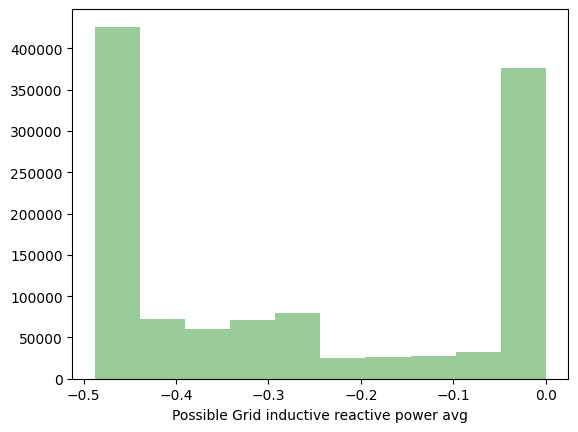

BoxPlot of Possible Grid inductive reactive power avg
----------------------------------------------------------------------------


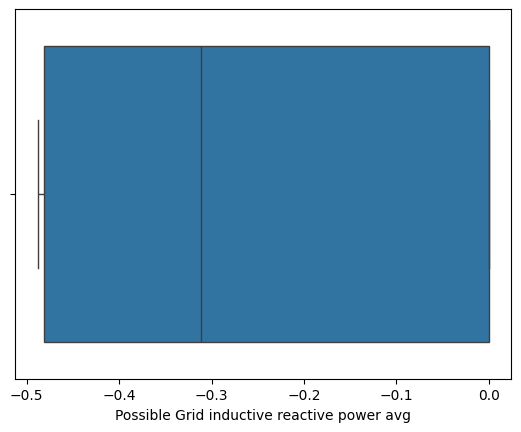

Description of Possible Grid inductive reactive power max
----------------------------------------------------------------------------
count    1.196747e+06
mean    -1.858436e-01
std      1.893014e-01
min     -4.878049e-01
25%     -2.880488e-01
50%     -1.552195e-01
75%      0.000000e+00
max      9.756098e-02
Name: Possible Grid inductive reactive power max, dtype: float64 Distribution of Possible Grid inductive reactive power max
----------------------------------------------------------------------------


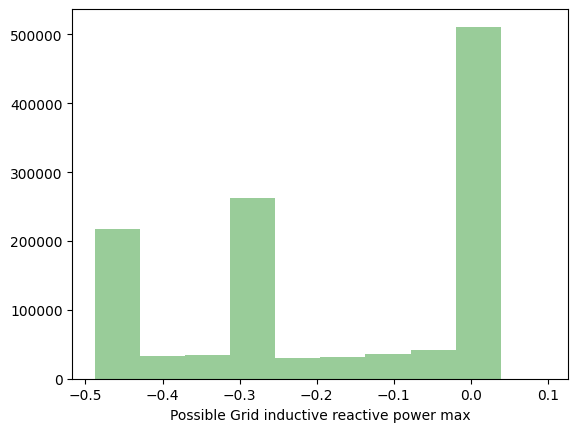

BoxPlot of Possible Grid inductive reactive power max
----------------------------------------------------------------------------


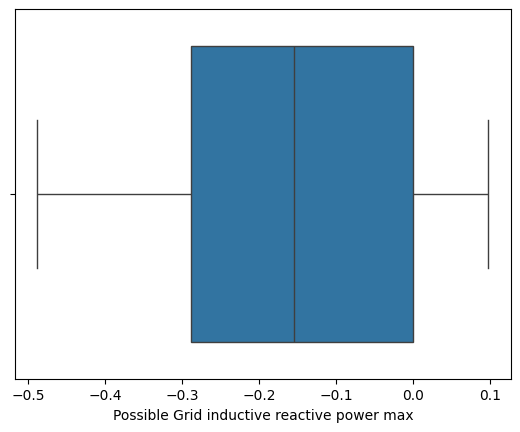

Description of Possible Grid inductive reactive power min
----------------------------------------------------------------------------
count    1.196747e+06
mean    -3.338428e-01
std      2.134153e-01
min     -4.878049e-01
25%     -4.878049e-01
50%     -4.878049e-01
75%      0.000000e+00
max      0.000000e+00
Name: Possible Grid inductive reactive power min, dtype: float64 Distribution of Possible Grid inductive reactive power min
----------------------------------------------------------------------------


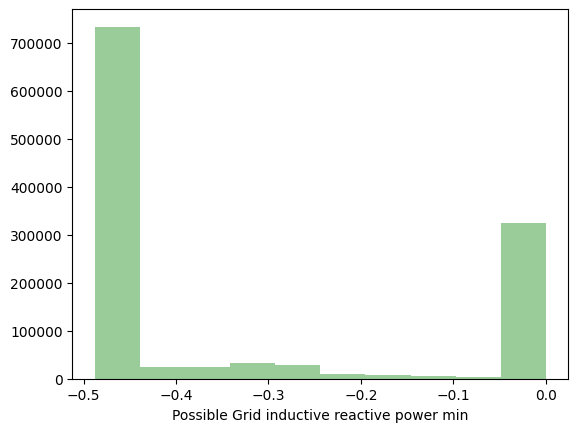

BoxPlot of Possible Grid inductive reactive power min
----------------------------------------------------------------------------


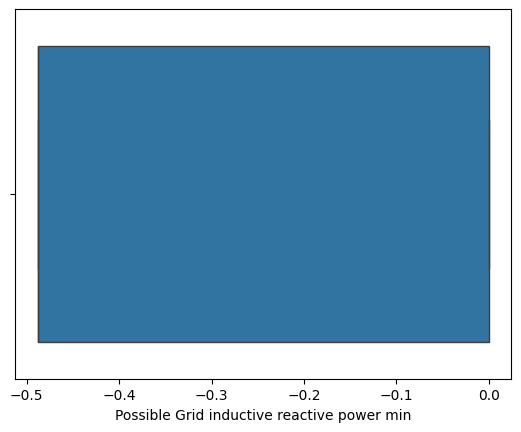

Description of Possible Grid inductive reactive power std
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.663536e-02
std      4.705544e-02
min      0.000000e+00
25%      0.000000e+00
50%      8.829268e-03
75%      6.926829e-02
max      2.439024e-01
Name: Possible Grid inductive reactive power std, dtype: float64 Distribution of Possible Grid inductive reactive power std
----------------------------------------------------------------------------


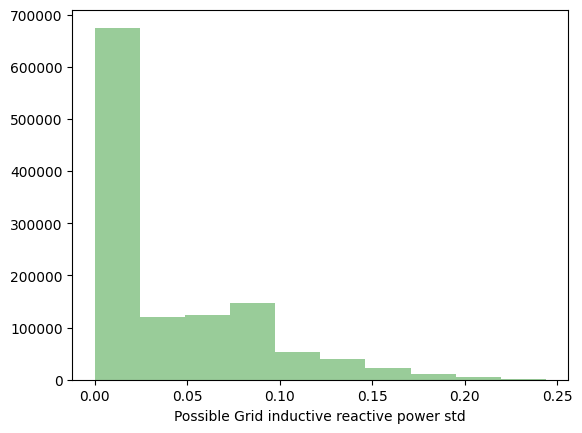

BoxPlot of Possible Grid inductive reactive power std
----------------------------------------------------------------------------


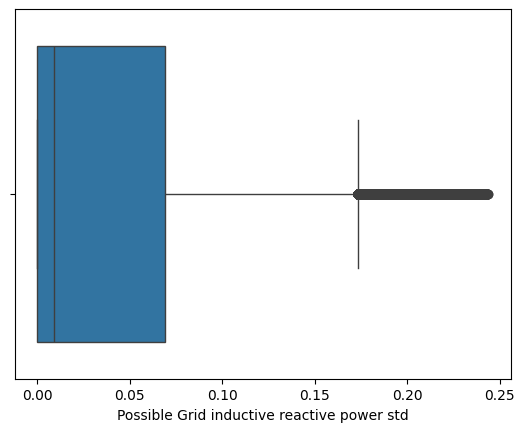

Description of Possible Grid active power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.882257e-01
std      3.346950e-01
min      0.000000e+00
25%      1.234146e-02
50%      1.294146e-01
75%      5.045854e-01
max      9.756098e-01
Name: Possible Grid active power avg, dtype: float64 Distribution of Possible Grid active power avg
----------------------------------------------------------------------------


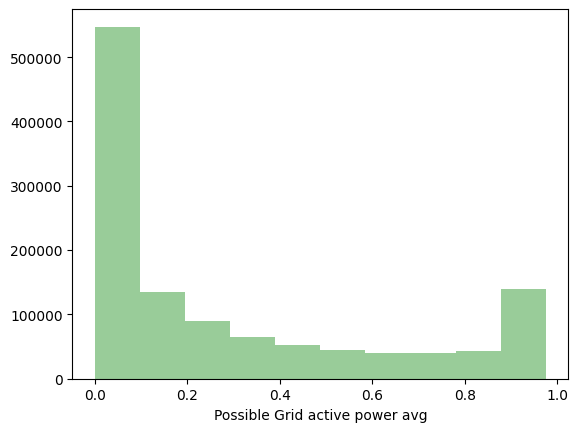

BoxPlot of Possible Grid active power avg
----------------------------------------------------------------------------


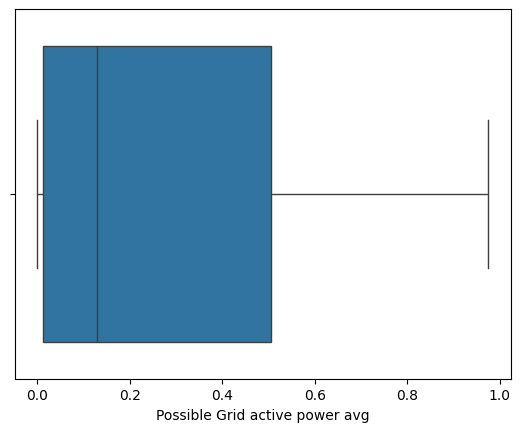

Description of Possible Grid active power max
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.971297e-01
std      3.798569e-01
min      0.000000e+00
25%      4.682927e-02
50%      2.520976e-01
75%      8.160488e-01
max      9.756098e-01
Name: Possible Grid active power max, dtype: float64 Distribution of Possible Grid active power max
----------------------------------------------------------------------------


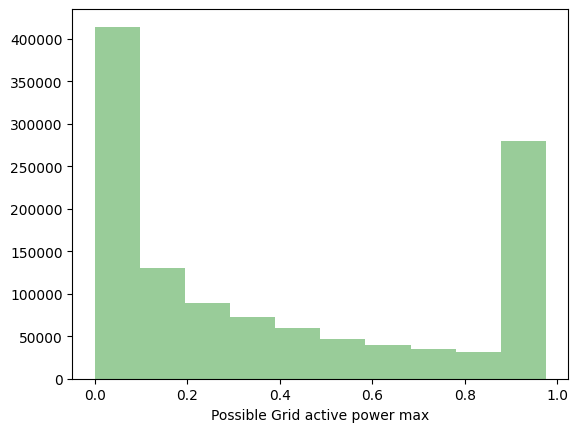

BoxPlot of Possible Grid active power max
----------------------------------------------------------------------------


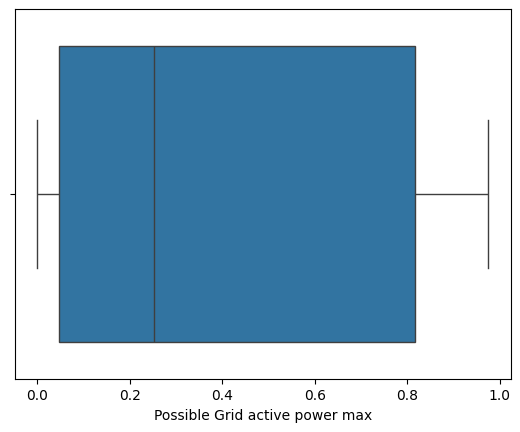

Description of Possible Grid active power min
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.689033e-01
std      2.521900e-01
min      0.000000e+00
25%      0.000000e+00
50%      4.000000e-02
75%      2.387317e-01
max      9.756098e-01
Name: Possible Grid active power min, dtype: float64 Distribution of Possible Grid active power min
----------------------------------------------------------------------------


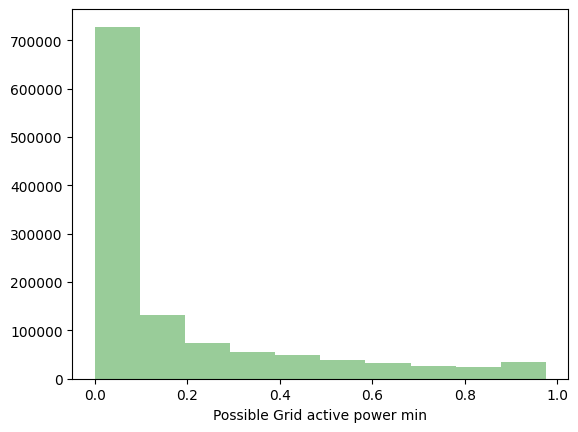

BoxPlot of Possible Grid active power min
----------------------------------------------------------------------------


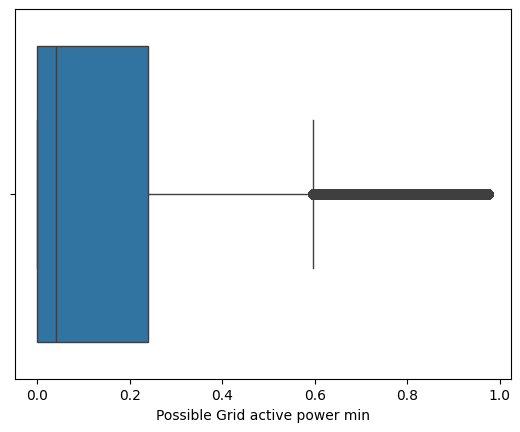

Description of Possible Grid active power std
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.877364e-02
std      5.179234e-02
min      0.000000e+00
25%      7.170732e-03
50%      3.058537e-02
75%      7.682927e-02
max      4.875610e-01
Name: Possible Grid active power std, dtype: float64 Distribution of Possible Grid active power std
----------------------------------------------------------------------------


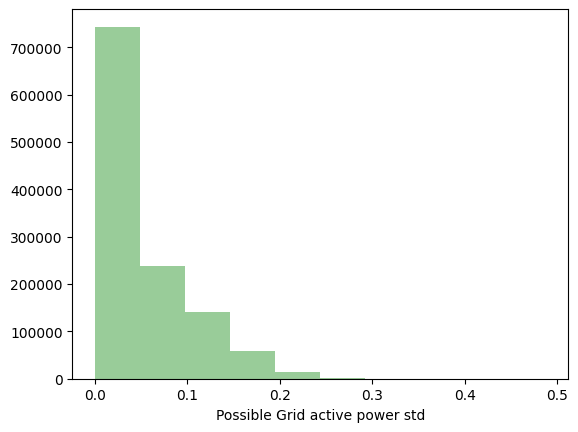

BoxPlot of Possible Grid active power std
----------------------------------------------------------------------------


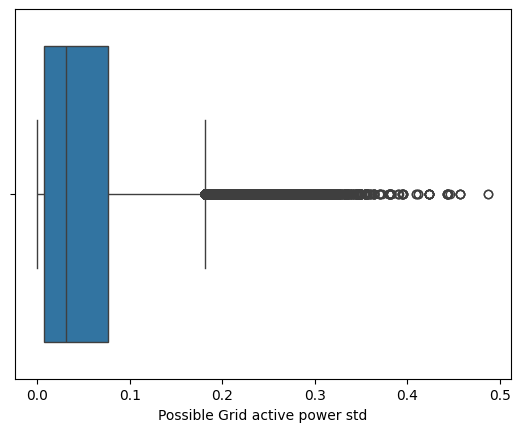

Description of Grid power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.723168e-01
std      3.323902e-01
min     -1.565854e-02
25%     -1.658537e-03
50%      1.136585e-01
75%      4.718049e-01
max      9.759512e-01
Name: Grid power avg, dtype: float64 Distribution of Grid power avg
----------------------------------------------------------------------------


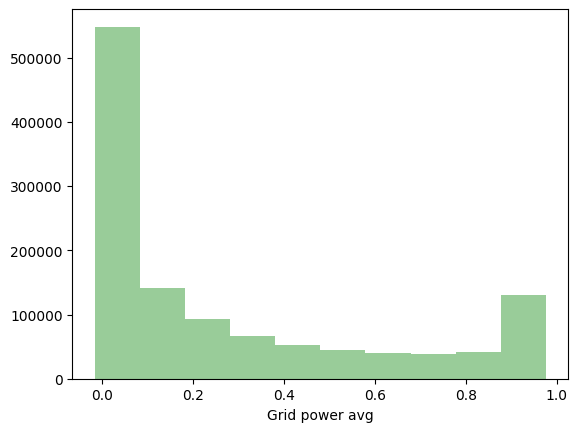

BoxPlot of Grid power avg
----------------------------------------------------------------------------


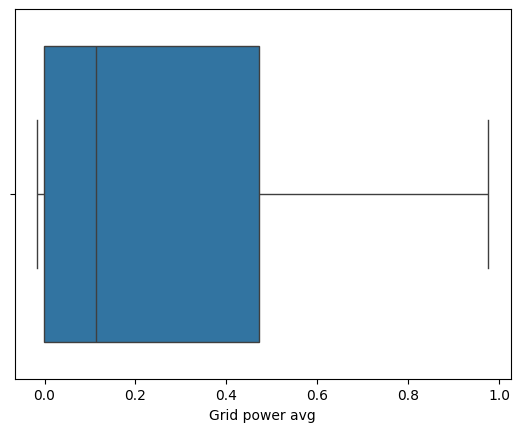

Description of Grid power max
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.801557e-01
std      3.940026e-01
min     -1.395122e-02
25%     -9.268293e-04
50%      2.205854e-01
75%      7.541951e-01
max      1.034439e+00
Name: Grid power max, dtype: float64 Distribution of Grid power max
----------------------------------------------------------------------------


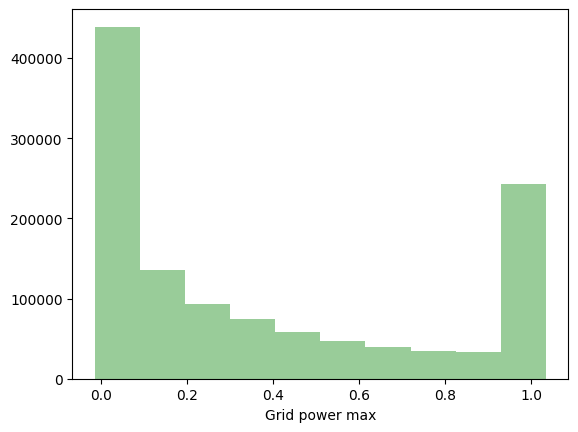

BoxPlot of Grid power max
----------------------------------------------------------------------------


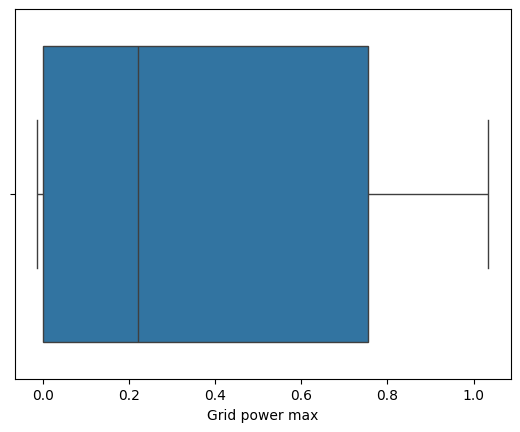

Description of Grid power min
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.597769e-01
std      2.568480e-01
min     -4.409756e-02
25%     -1.200000e-02
50%      3.268293e-02
75%      2.289756e-01
max      9.748780e-01
Name: Grid power min, dtype: float64 Distribution of Grid power min
----------------------------------------------------------------------------


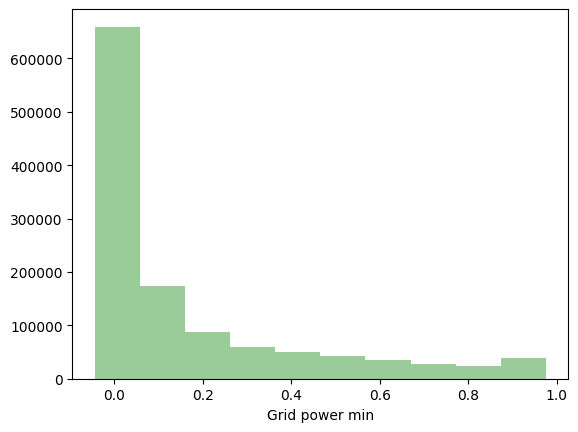

BoxPlot of Grid power min
----------------------------------------------------------------------------


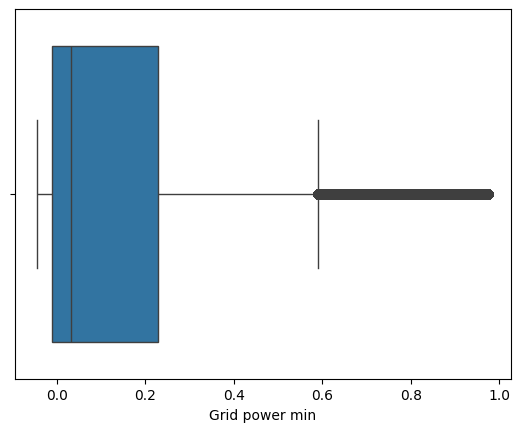

Description of Grid power std
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.704760e-02
std      5.290536e-02
min      0.000000e+00
25%      1.853659e-03
50%      2.868293e-02
75%      7.419512e-02
max      4.950732e-01
Name: Grid power std, dtype: float64 Distribution of Grid power std
----------------------------------------------------------------------------


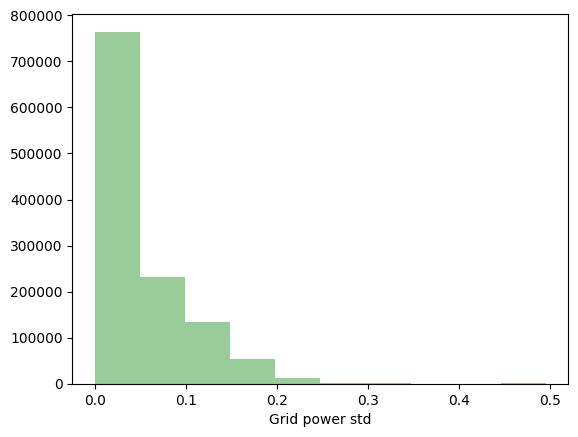

BoxPlot of Grid power std
----------------------------------------------------------------------------


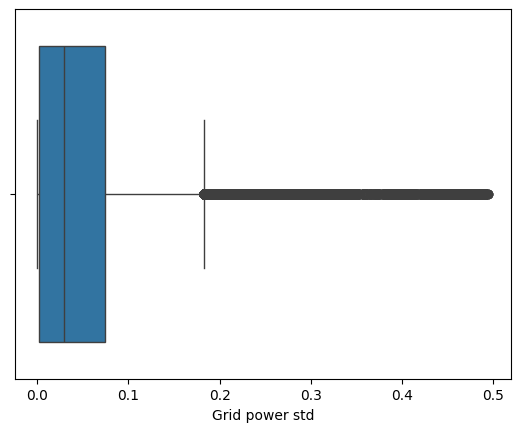

Description of Grid reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -4.762743e-02
std      3.860048e-02
min     -2.882439e-01
25%     -8.307317e-02
50%     -4.760976e-02
75%     -5.414634e-03
max      4.878049e-01
Name: Grid reactive power avg, dtype: float64 Distribution of Grid reactive power avg
----------------------------------------------------------------------------


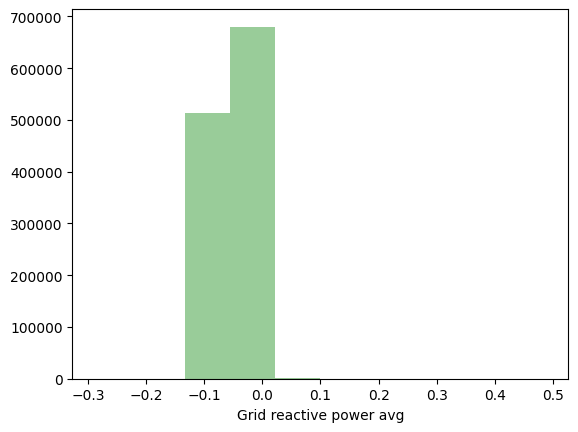

BoxPlot of Grid reactive power avg
----------------------------------------------------------------------------


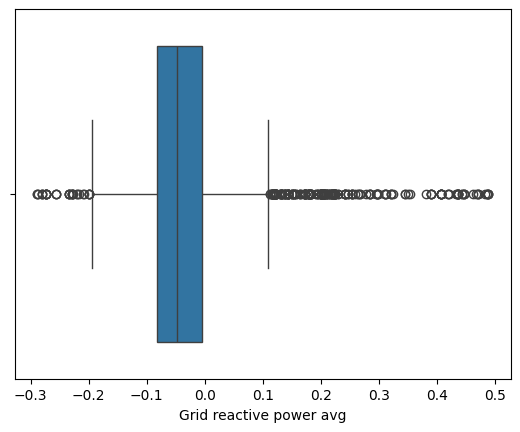

Description of Grid reactive power max
----------------------------------------------------------------------------
count    1.196747e+06
mean    -3.833058e+01
std      1.903525e+02
min     -5.758000e+02
25%     -1.572000e+02
50%     -8.020000e+01
75%     -1.300000e+00
max      1.003300e+03
Name: Grid reactive power max, dtype: float64 Distribution of Grid reactive power max
----------------------------------------------------------------------------


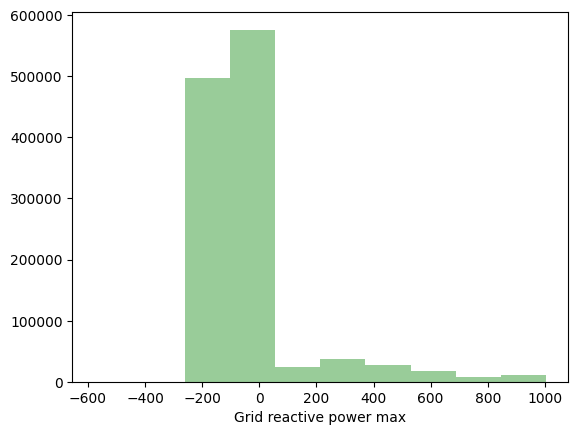

BoxPlot of Grid reactive power max
----------------------------------------------------------------------------


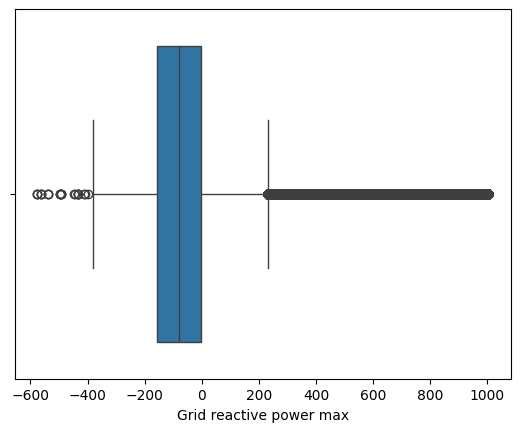

Description of Grid reactive power min
----------------------------------------------------------------------------
count    1.196747e+06
mean    -1.476359e+02
std      1.310528e+02
min     -1.002800e+03
25%     -2.056000e+02
50%     -1.349000e+02
75%     -2.920000e+01
max      9.976000e+02
Name: Grid reactive power min, dtype: float64 Distribution of Grid reactive power min
----------------------------------------------------------------------------


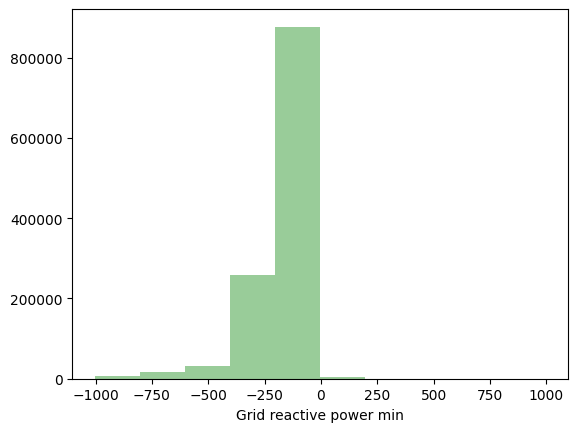

BoxPlot of Grid reactive power min
----------------------------------------------------------------------------


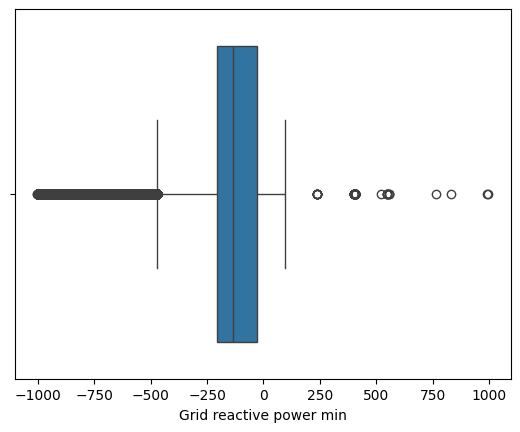

Description of Grid reactive power std
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.989491e+01
std      4.794879e+01
min      0.000000e+00
25%      2.500000e+00
50%      4.100000e+00
75%      7.800000e+00
max      5.757000e+02
Name: Grid reactive power std, dtype: float64 Distribution of Grid reactive power std
----------------------------------------------------------------------------


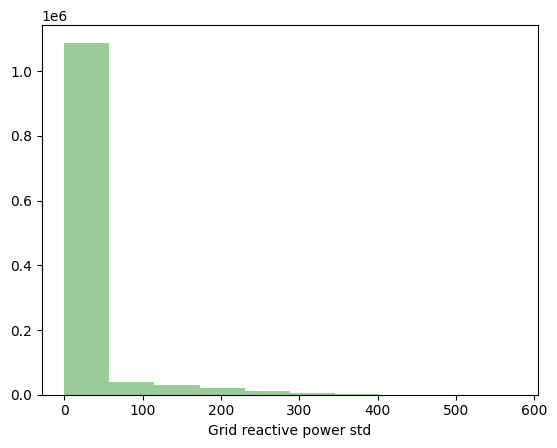

BoxPlot of Grid reactive power std
----------------------------------------------------------------------------


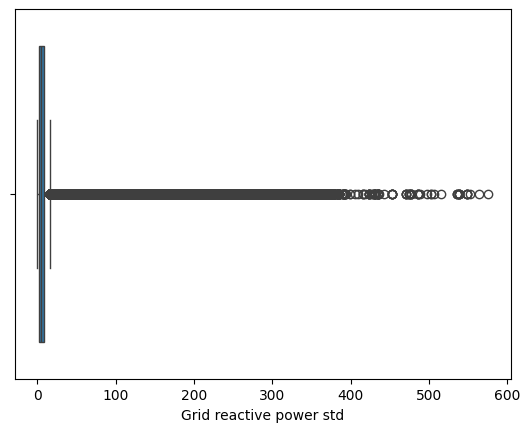

Description of Averaged voltage phase 1
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.996508e+02
std      1.745609e+00
min      0.000000e+00
25%      3.985000e+02
50%      3.996000e+02
75%      4.008000e+02
max      4.197000e+02
Name: Averaged voltage phase 1, dtype: float64 Distribution of Averaged voltage phase 1
----------------------------------------------------------------------------


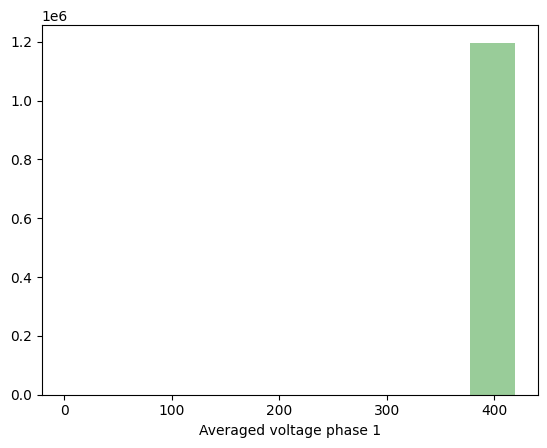

BoxPlot of Averaged voltage phase 1
----------------------------------------------------------------------------


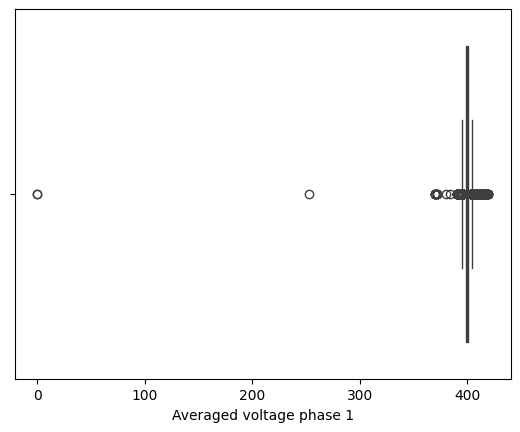

Description of Averaged voltage phase 2
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.977755e+02
std      1.801246e+00
min      0.000000e+00
25%      3.966000e+02
50%      3.977000e+02
75%      3.990000e+02
max      4.181000e+02
Name: Averaged voltage phase 2, dtype: float64 Distribution of Averaged voltage phase 2
----------------------------------------------------------------------------


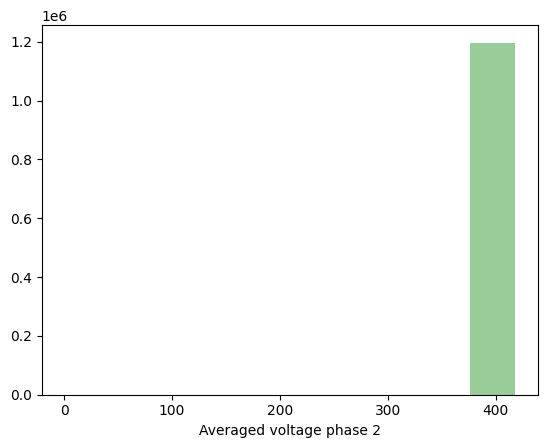

BoxPlot of Averaged voltage phase 2
----------------------------------------------------------------------------


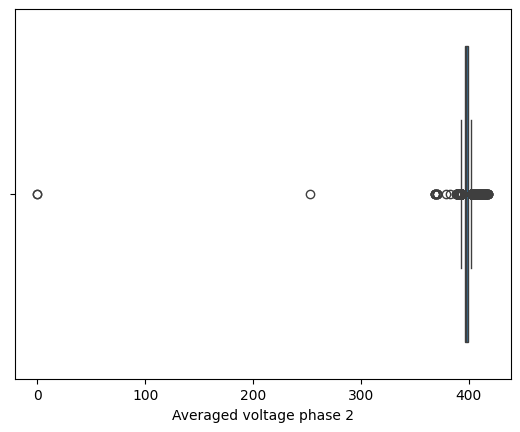

Description of Averaged voltage phase 3
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.977089e+02
std      2.395241e+00
min      0.000000e+00
25%      3.961000e+02
50%      3.976000e+02
75%      3.992000e+02
max      4.197000e+02
Name: Averaged voltage phase 3, dtype: float64 Distribution of Averaged voltage phase 3
----------------------------------------------------------------------------


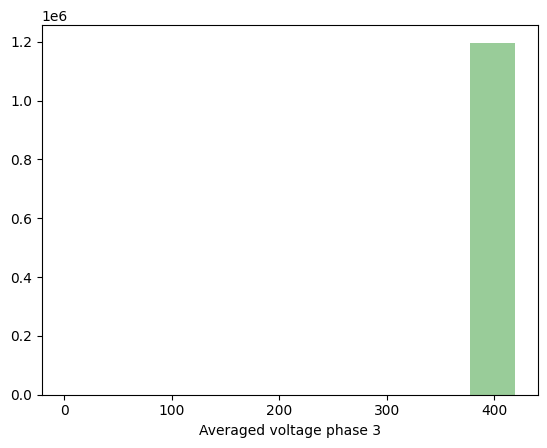

BoxPlot of Averaged voltage phase 3
----------------------------------------------------------------------------


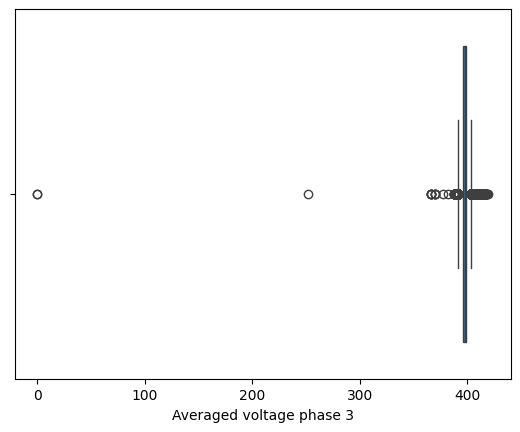

Description of IGBT-driver on rotor side inverter phase 1 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.877822e+01
std      5.785733e+00
min      2.400000e+01
25%      3.500000e+01
50%      3.900000e+01
75%      4.200000e+01
max      9.800000e+01
Name: IGBT-driver on rotor side inverter phase 1 temperature avg, dtype: float64 Distribution of IGBT-driver on rotor side inverter phase 1 temperature avg
----------------------------------------------------------------------------


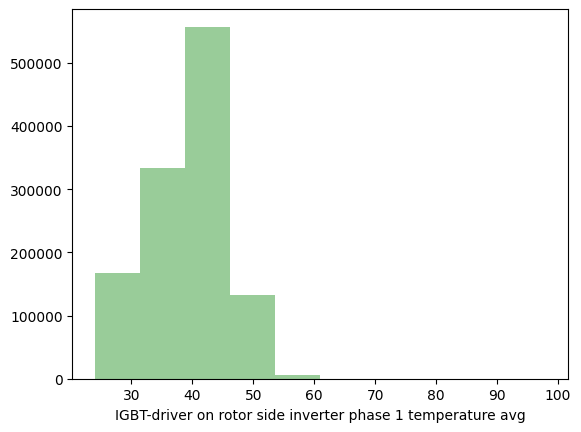

BoxPlot of IGBT-driver on rotor side inverter phase 1 temperature avg
----------------------------------------------------------------------------


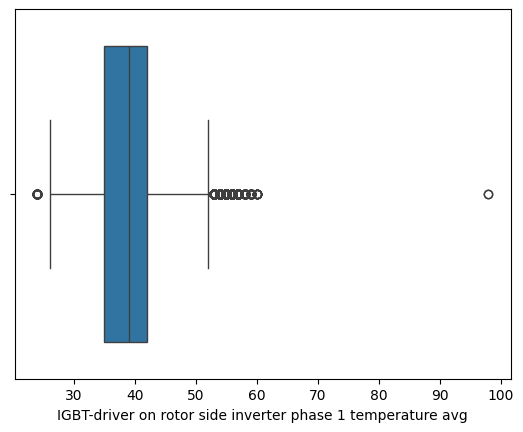

Description of IGBT-driver on rotor side inverter phase 2 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.893536e+01
std      5.957142e+00
min      2.400000e+01
25%      3.500000e+01
50%      3.900000e+01
75%      4.200000e+01
max      6.100000e+01
Name: IGBT-driver on rotor side inverter phase 2 temperature avg, dtype: float64 Distribution of IGBT-driver on rotor side inverter phase 2 temperature avg
----------------------------------------------------------------------------


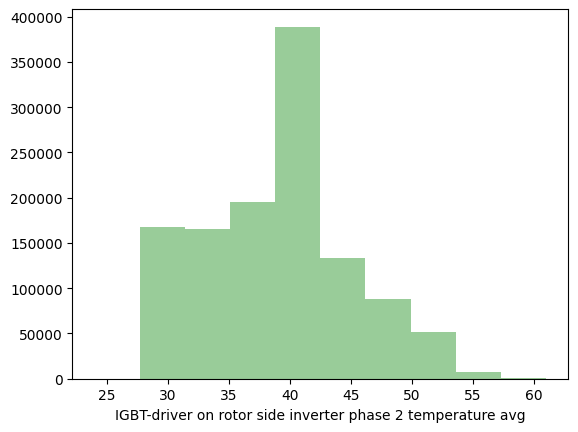

BoxPlot of IGBT-driver on rotor side inverter phase 2 temperature avg
----------------------------------------------------------------------------


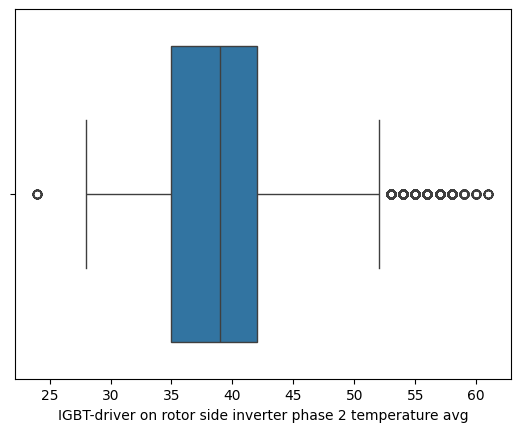

Description of IGBT-driver on rotor side inverter phase 3 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.901794e+01
std      5.792397e+00
min      2.400000e+01
25%      3.500000e+01
50%      3.900000e+01
75%      4.200000e+01
max      1.040000e+02
Name: IGBT-driver on rotor side inverter phase 3 temperature avg, dtype: float64 Distribution of IGBT-driver on rotor side inverter phase 3 temperature avg
----------------------------------------------------------------------------


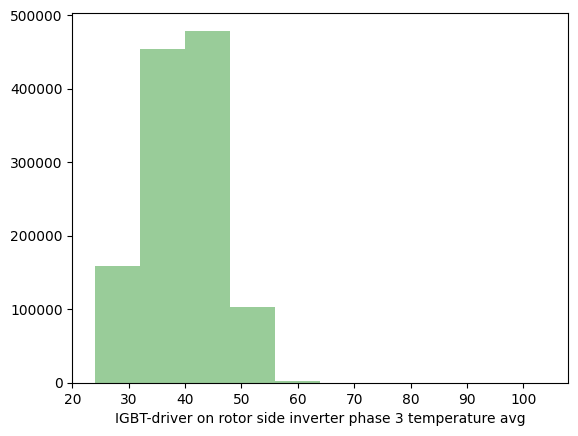

BoxPlot of IGBT-driver on rotor side inverter phase 3 temperature avg
----------------------------------------------------------------------------


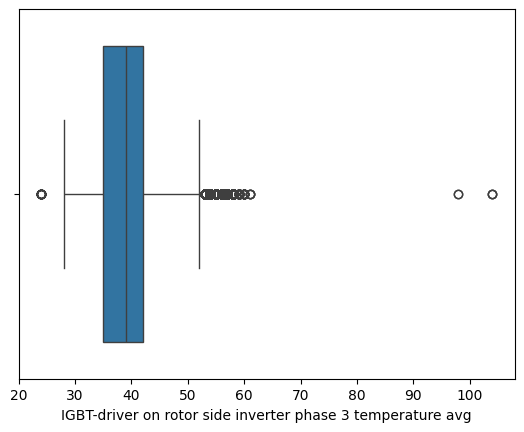

Description of HV transformer phase L1 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.530412e+01
std      1.402179e+01
min      2.800000e+01
25%      5.600000e+01
50%      6.600000e+01
75%      7.500000e+01
max      1.070000e+02
Name: HV transformer phase L1 temperature avg, dtype: float64 Distribution of HV transformer phase L1 temperature avg
----------------------------------------------------------------------------


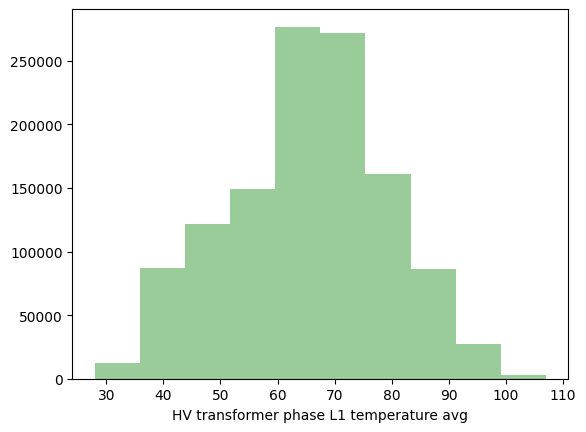

BoxPlot of HV transformer phase L1 temperature avg
----------------------------------------------------------------------------


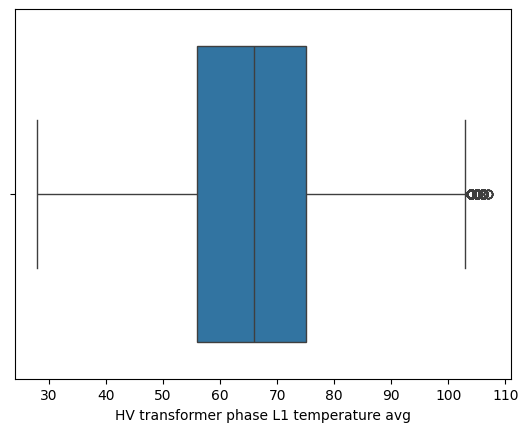

Description of HV transformer phase L2 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     7.113808e+01
std      1.594303e+01
min      2.800000e+01
25%      6.200000e+01
50%      7.100000e+01
75%      8.100000e+01
max      1.220000e+02
Name: HV transformer phase L2 temperature avg, dtype: float64 Distribution of HV transformer phase L2 temperature avg
----------------------------------------------------------------------------


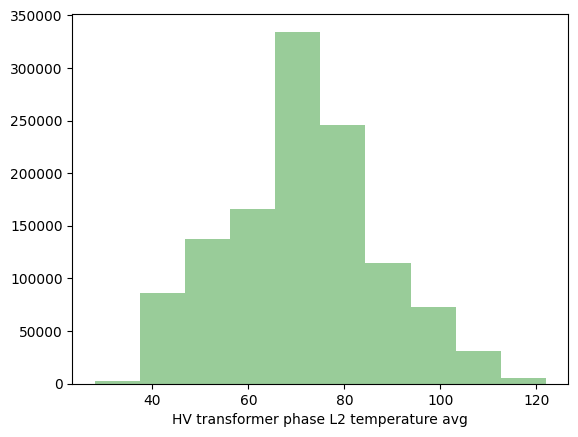

BoxPlot of HV transformer phase L2 temperature avg
----------------------------------------------------------------------------


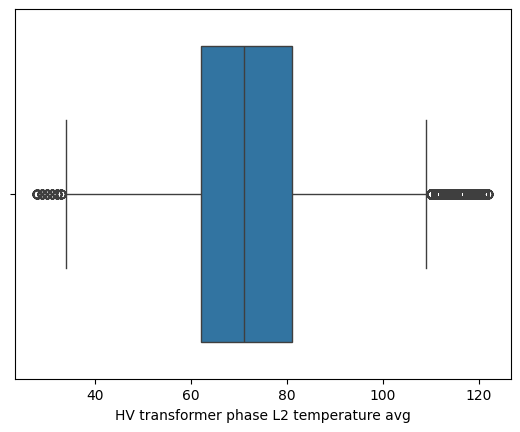

Description of HV transformer phase L3 temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.925945e+01
std      1.837281e+01
min      2.700000e+01
25%      5.700000e+01
50%      6.800000e+01
75%      8.000000e+01
max      1.370000e+02
Name: HV transformer phase L3 temperature avg, dtype: float64 Distribution of HV transformer phase L3 temperature avg
----------------------------------------------------------------------------


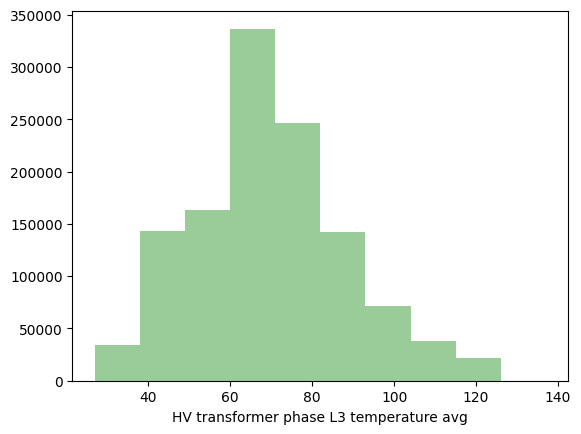

BoxPlot of HV transformer phase L3 temperature avg
----------------------------------------------------------------------------


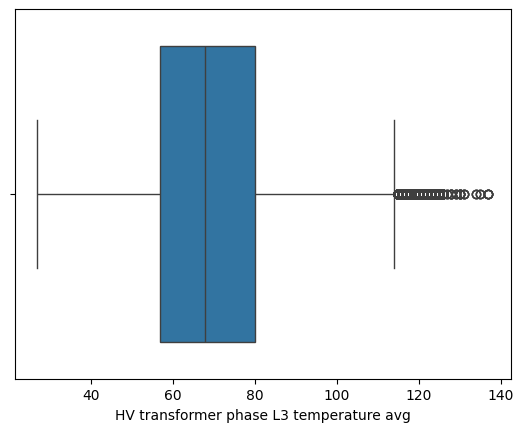

Description of Hydraulic group oil temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.822521e+01
std      8.436479e+00
min      2.000000e+01
25%      3.100000e+01
50%      3.700000e+01
75%      4.600000e+01
max      5.500000e+01
Name: Hydraulic group oil temperature avg, dtype: float64 Distribution of Hydraulic group oil temperature avg
----------------------------------------------------------------------------


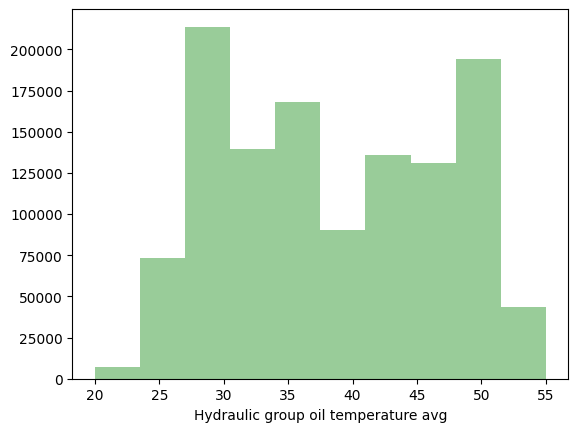

BoxPlot of Hydraulic group oil temperature avg
----------------------------------------------------------------------------


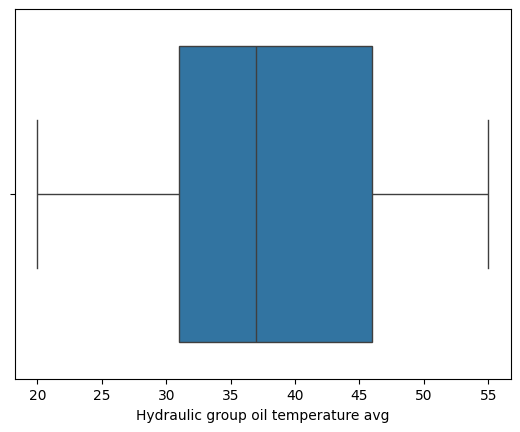

Description of Nacelle direction avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.753141e+02
std      9.304211e+01
min      0.000000e+00
25%      9.950000e+01
50%      1.281000e+02
75%      2.678000e+02
max      3.590000e+02
Name: Nacelle direction avg, dtype: float64 Distribution of Nacelle direction avg
----------------------------------------------------------------------------


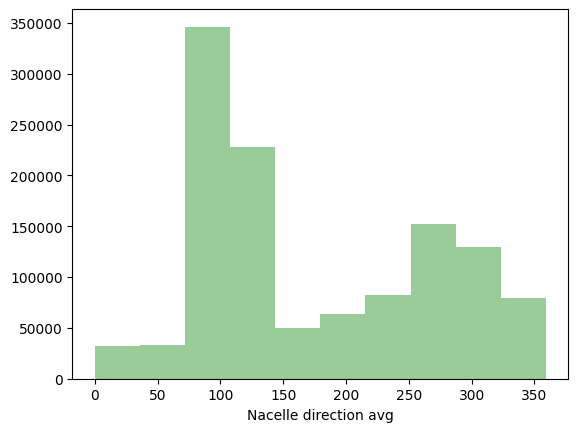

BoxPlot of Nacelle direction avg
----------------------------------------------------------------------------


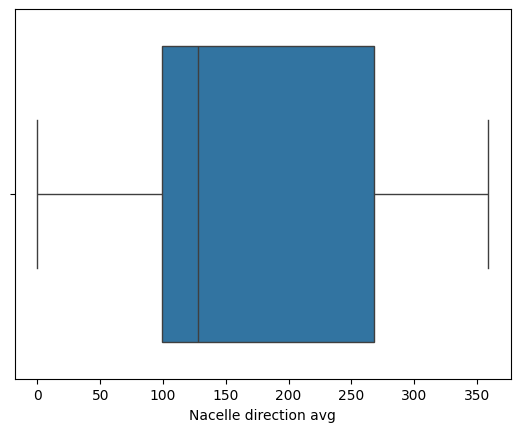

Description of Nacelle temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     3.010808e+01
std      5.402276e+00
min      1.500000e+01
25%      2.600000e+01
50%      3.000000e+01
75%      3.400000e+01
max      5.100000e+01
Name: Nacelle temperature avg, dtype: float64 Distribution of Nacelle temperature avg
----------------------------------------------------------------------------


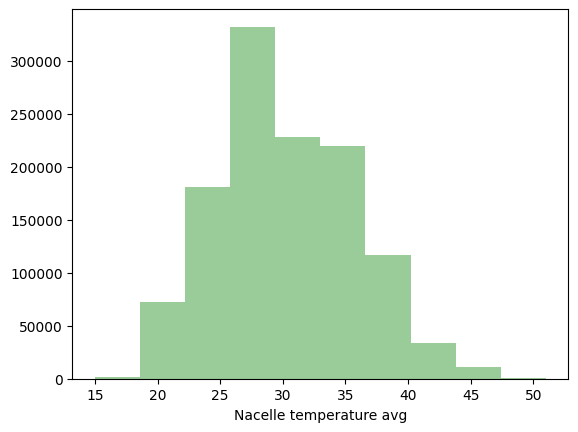

BoxPlot of Nacelle temperature avg
----------------------------------------------------------------------------


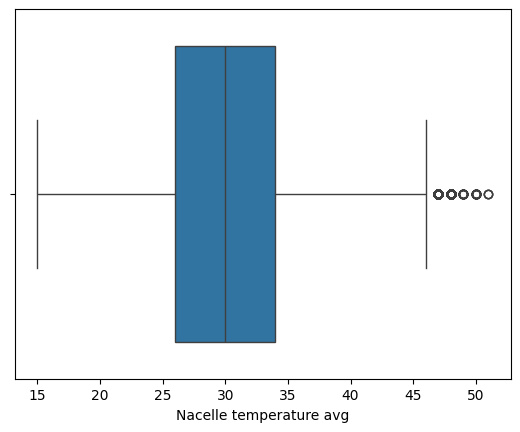

Description of Generator disconnected active power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -4.052408e+02
std      6.977473e+02
min     -5.278000e+03
25%     -7.280000e+02
50%      0.000000e+00
75%      0.000000e+00
max      1.416000e+03
Name: Generator disconnected active power avg, dtype: float64 Distribution of Generator disconnected active power avg
----------------------------------------------------------------------------


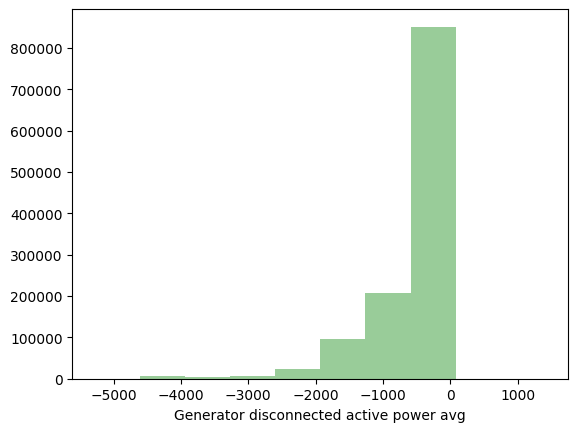

BoxPlot of Generator disconnected active power avg
----------------------------------------------------------------------------


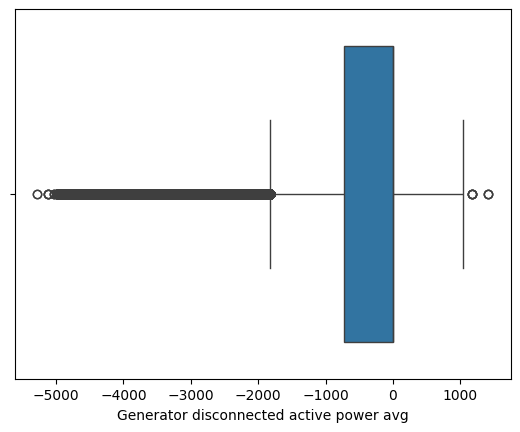

Description of Generator connected in delta active power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     9.345065e+04
std      1.132375e+05
min     -1.864000e+03
25%      0.000000e+00
50%      3.884700e+04
75%      1.611970e+05
max      3.728650e+05
Name: Generator connected in delta active power avg, dtype: float64 Distribution of Generator connected in delta active power avg
----------------------------------------------------------------------------


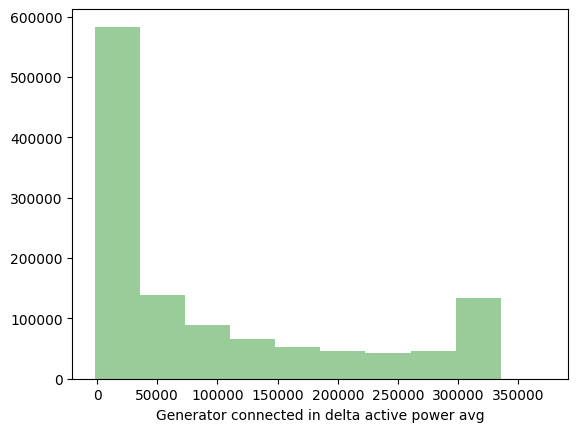

BoxPlot of Generator connected in delta active power avg
----------------------------------------------------------------------------


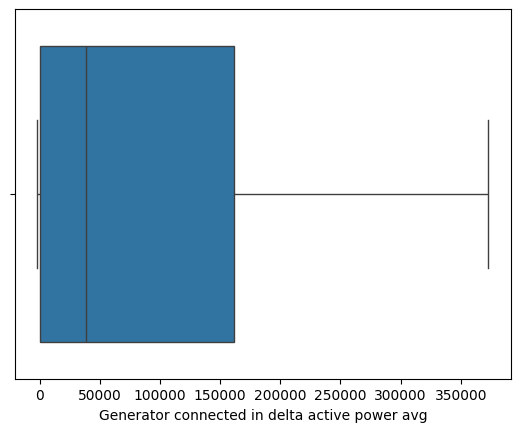

Description of Generator connected in star active power avg
----------------------------------------------------------------------------
count    1196747.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Generator connected in star active power avg, dtype: float64 Distribution of Generator connected in star active power avg
----------------------------------------------------------------------------


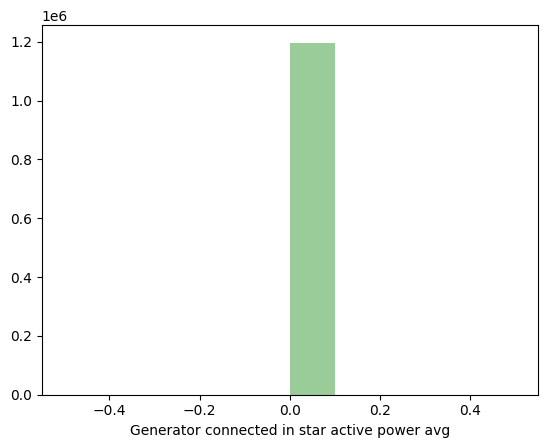

BoxPlot of Generator connected in star active power avg
----------------------------------------------------------------------------


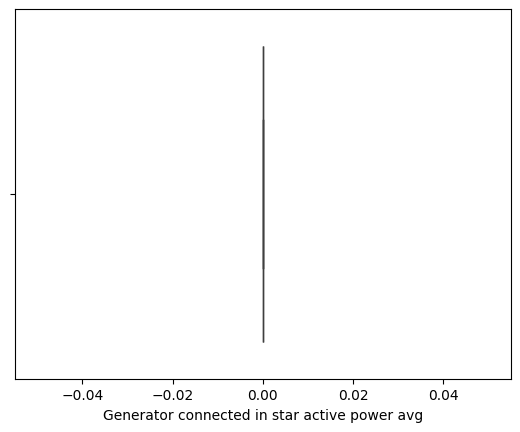

Description of Generator disconnected reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -3.906125e+02
std      7.572309e+02
min     -5.849000e+03
25%     -4.280000e+02
50%      0.000000e+00
75%      0.000000e+00
max      3.326000e+03
Name: Generator disconnected reactive power avg, dtype: float64 Distribution of Generator disconnected reactive power avg
----------------------------------------------------------------------------


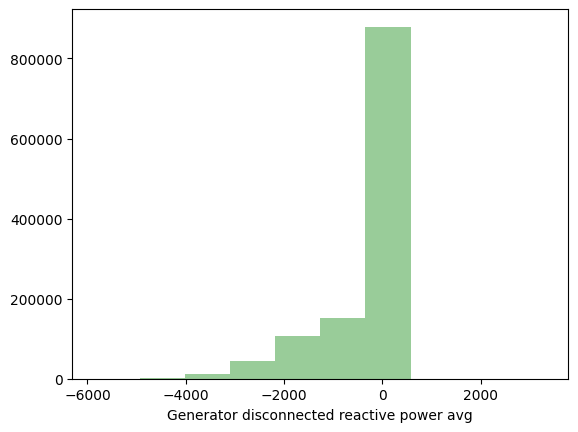

BoxPlot of Generator disconnected reactive power avg
----------------------------------------------------------------------------


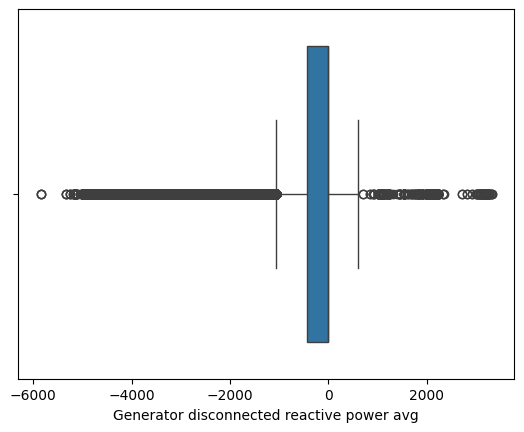

Description of Generator connected in delta reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -1.588284e+04
std      1.361794e+04
min     -9.847500e+04
25%     -2.838500e+04
50%     -1.626300e+04
75%      0.000000e+00
max      1.668060e+05
Name: Generator connected in delta reactive power avg, dtype: float64 Distribution of Generator connected in delta reactive power avg
----------------------------------------------------------------------------


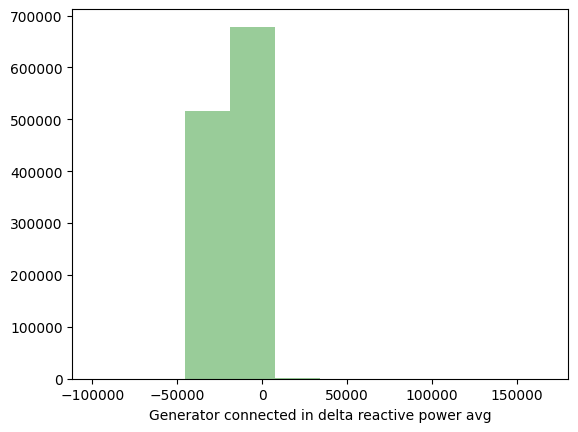

BoxPlot of Generator connected in delta reactive power avg
----------------------------------------------------------------------------


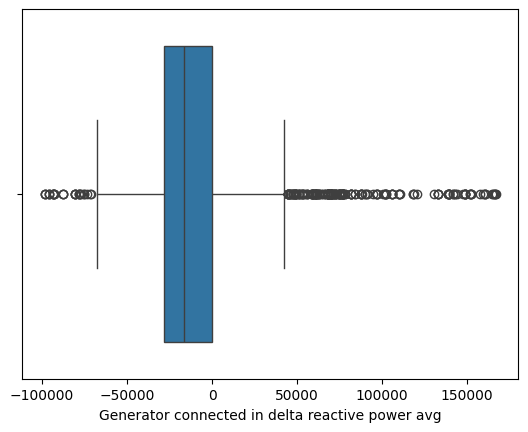

Description of Generator connected in star reactive power avg
----------------------------------------------------------------------------
count    1196747.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Generator connected in star reactive power avg, dtype: float64 Distribution of Generator connected in star reactive power avg
----------------------------------------------------------------------------


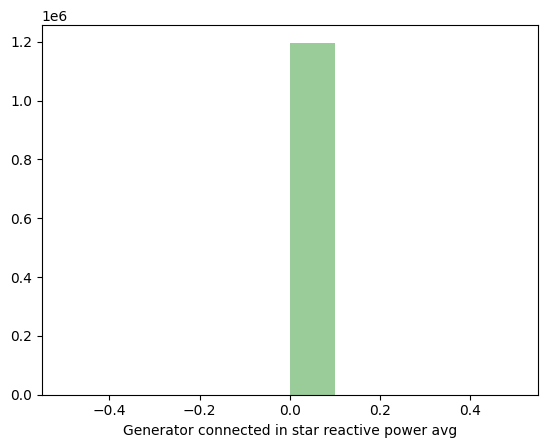

BoxPlot of Generator connected in star reactive power avg
----------------------------------------------------------------------------


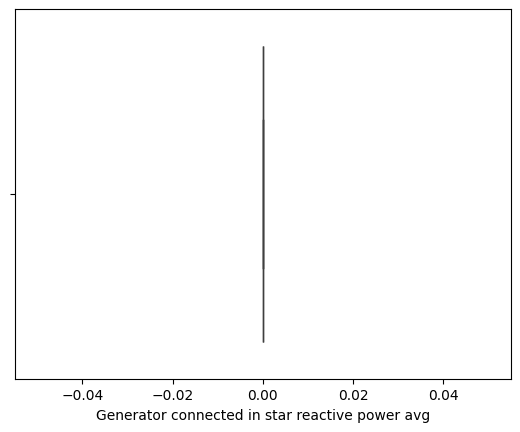

Description of Total active power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     9.304541e+04
std      1.135679e+05
min     -5.367000e+03
25%     -5.610000e+02
50%      3.882700e+04
75%      1.611880e+05
max      3.712560e+05
Name: Total active power avg, dtype: float64 Distribution of Total active power avg
----------------------------------------------------------------------------


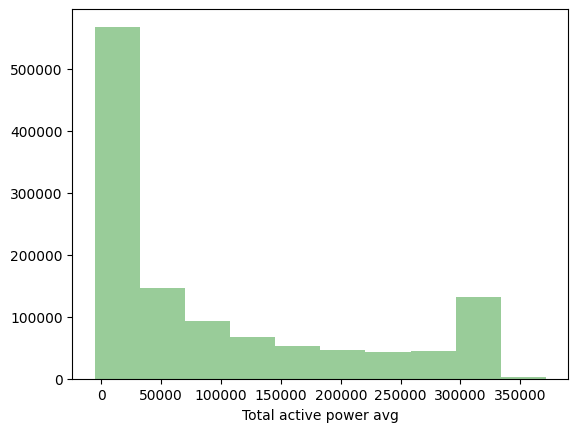

BoxPlot of Total active power avg
----------------------------------------------------------------------------


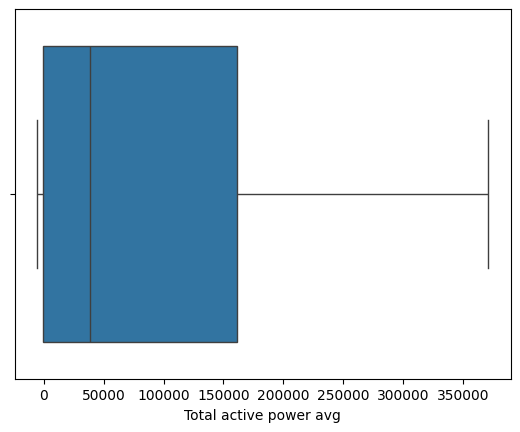

Description of Total reactive power avg
----------------------------------------------------------------------------
count    1.196747e+06
mean    -1.627345e+04
std      1.318826e+04
min     -9.847500e+04
25%     -2.838600e+04
50%     -1.627100e+04
75%     -1.855000e+03
max      1.668060e+05
Name: Total reactive power avg, dtype: float64 Distribution of Total reactive power avg
----------------------------------------------------------------------------


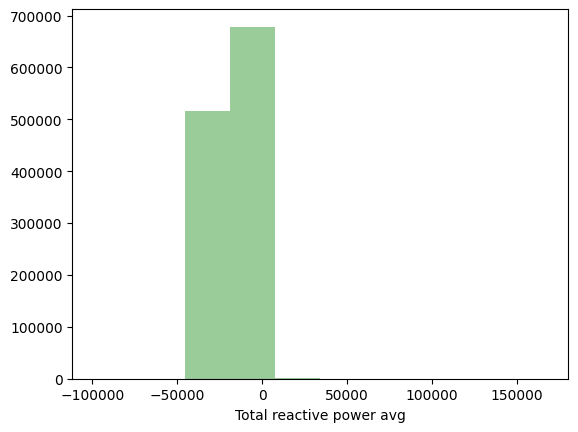

BoxPlot of Total reactive power avg
----------------------------------------------------------------------------


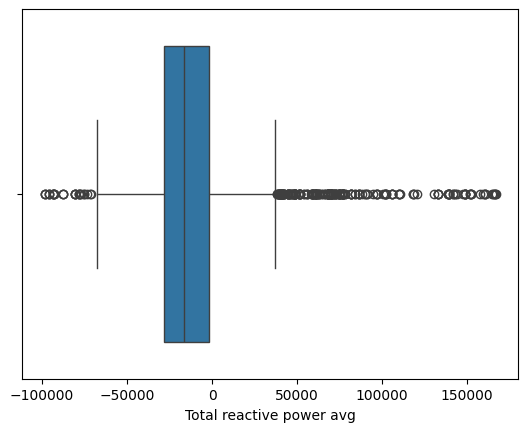

Description of Rotor rpm avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     9.410091e+00
std      5.565728e+00
min      0.000000e+00
25%      2.400000e+00
50%      1.140000e+01
75%      1.420000e+01
max      1.490000e+01
Name: Rotor rpm avg, dtype: float64 Distribution of Rotor rpm avg
----------------------------------------------------------------------------


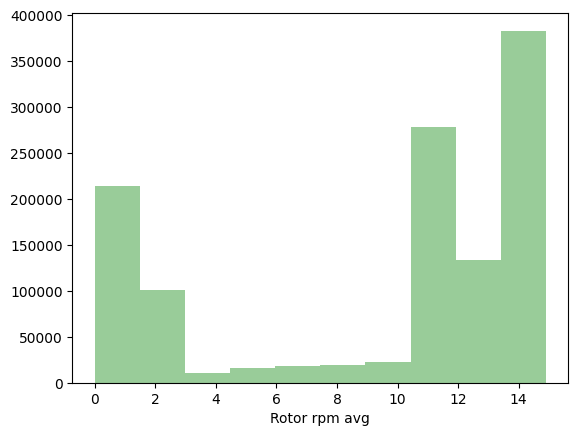

BoxPlot of Rotor rpm avg
----------------------------------------------------------------------------


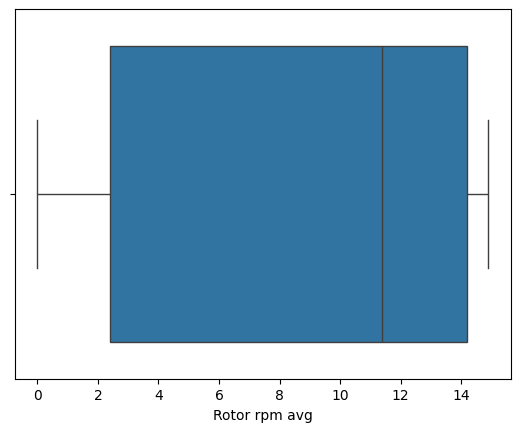

Description of Rotor rpm max
----------------------------------------------------------------------------
count    1.196747e+06
mean     1.049616e+01
std      5.759044e+00
min      0.000000e+00
25%      2.800000e+00
50%      1.270000e+01
75%      1.490000e+01
max      1.960000e+01
Name: Rotor rpm max, dtype: float64 Distribution of Rotor rpm max
----------------------------------------------------------------------------


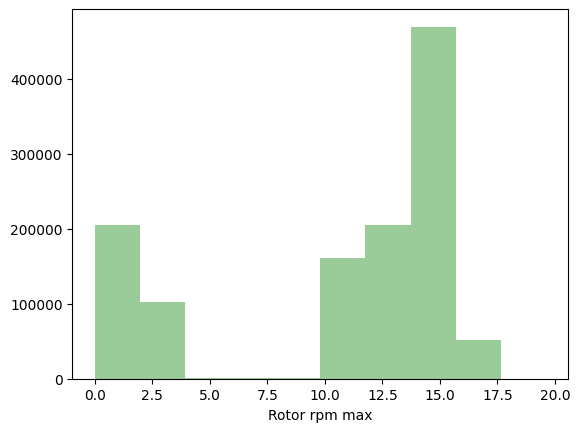

BoxPlot of Rotor rpm max
----------------------------------------------------------------------------


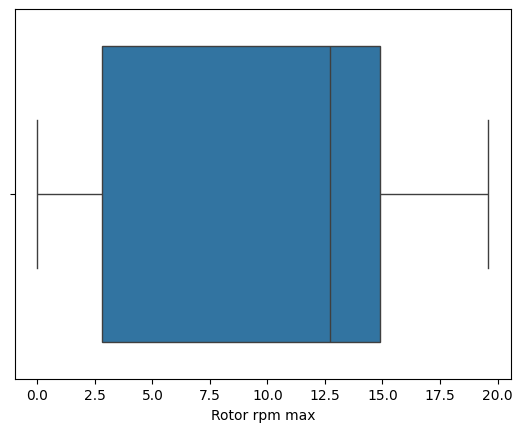

Description of Rotor rpm min
----------------------------------------------------------------------------
count    1.196747e+06
mean     8.237345e+00
std      5.572132e+00
min      0.000000e+00
25%      1.700000e+00
50%      1.090000e+01
75%      1.230000e+01
max      1.480000e+01
Name: Rotor rpm min, dtype: float64 Distribution of Rotor rpm min
----------------------------------------------------------------------------


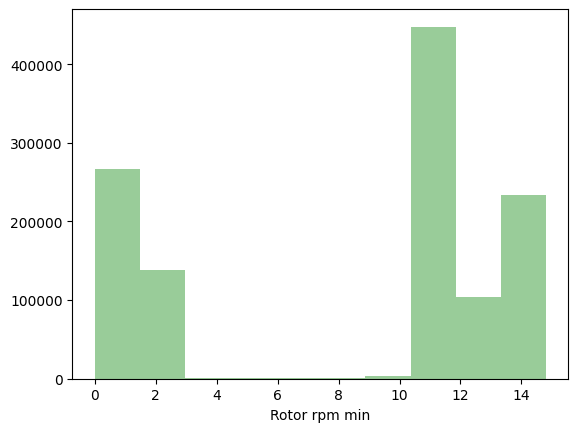

BoxPlot of Rotor rpm min
----------------------------------------------------------------------------


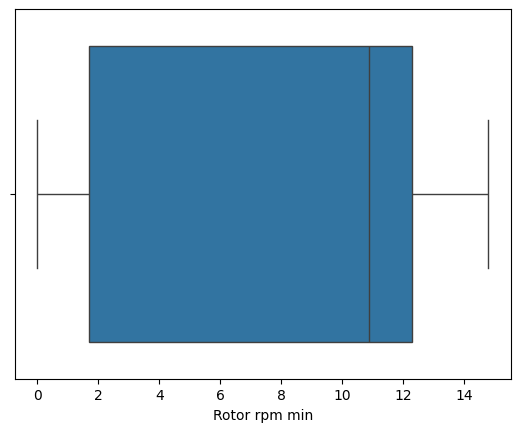

Description of Rotor rpm std
----------------------------------------------------------------------------
count    1.196747e+06
mean     6.089519e-01
std      9.986380e-01
min      0.000000e+00
25%      1.000000e-01
50%      3.000000e-01
75%      7.000000e-01
max      7.400000e+00
Name: Rotor rpm std, dtype: float64 Distribution of Rotor rpm std
----------------------------------------------------------------------------


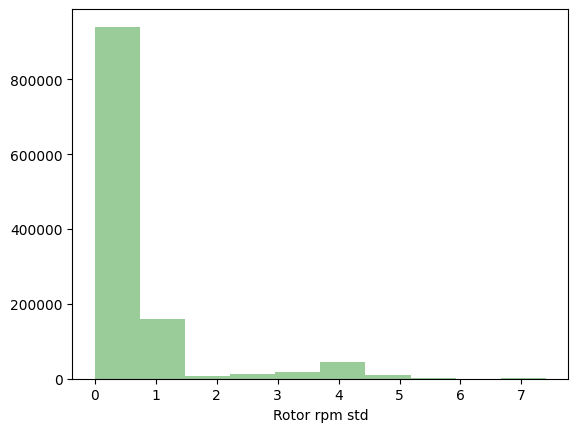

BoxPlot of Rotor rpm std
----------------------------------------------------------------------------


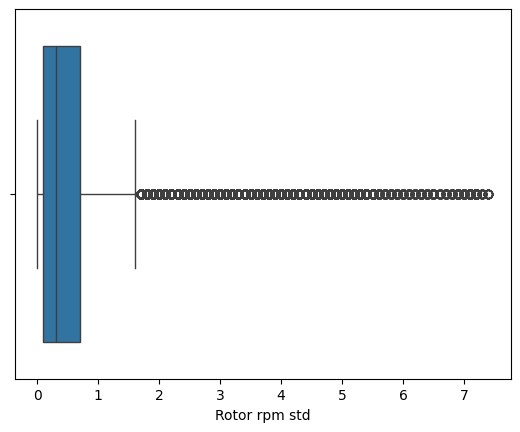

Description of Nose cone temperature avg
----------------------------------------------------------------------------
count    1.196747e+06
mean     2.278092e+01
std      5.949853e+00
min      6.000000e+00
25%      1.800000e+01
50%      2.200000e+01
75%      2.700000e+01
max      4.700000e+01
Name: Nose cone temperature avg, dtype: float64 Distribution of Nose cone temperature avg
----------------------------------------------------------------------------


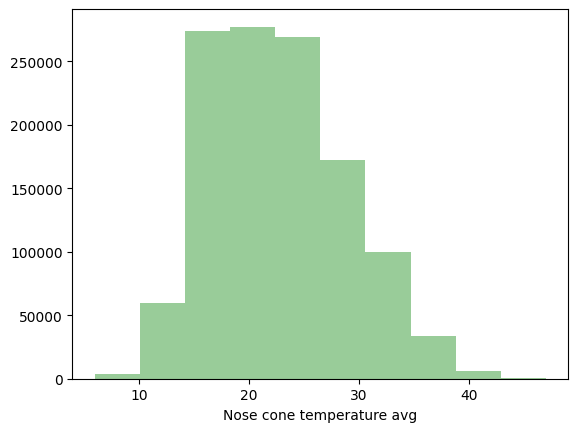

BoxPlot of Nose cone temperature avg
----------------------------------------------------------------------------


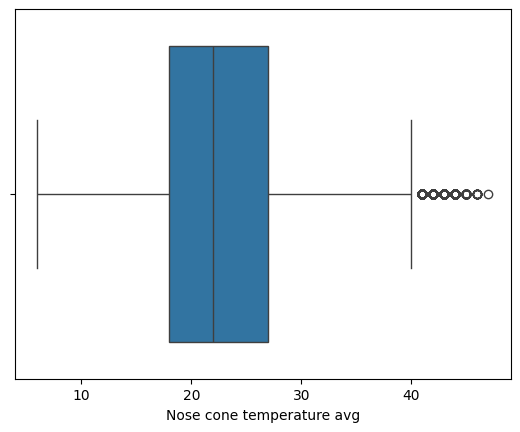

Description of event_id
----------------------------------------------------------------------------
count    1.196747e+06
mean     4.080538e+01
std      2.719184e+01
min      0.000000e+00
25%      1.700000e+01
50%      3.800000e+01
75%      6.900000e+01
max      9.200000e+01
Name: event_id, dtype: float64 Distribution of event_id
----------------------------------------------------------------------------


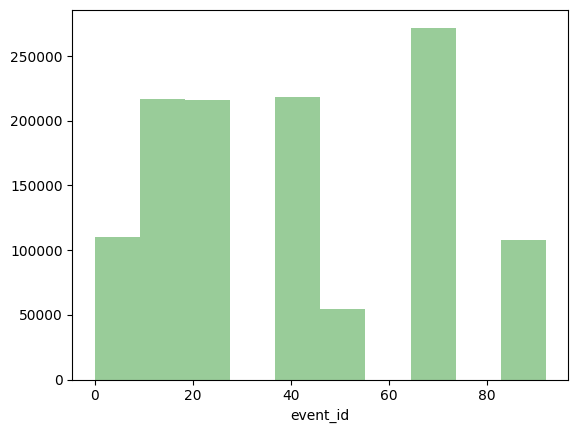

BoxPlot of event_id
----------------------------------------------------------------------------


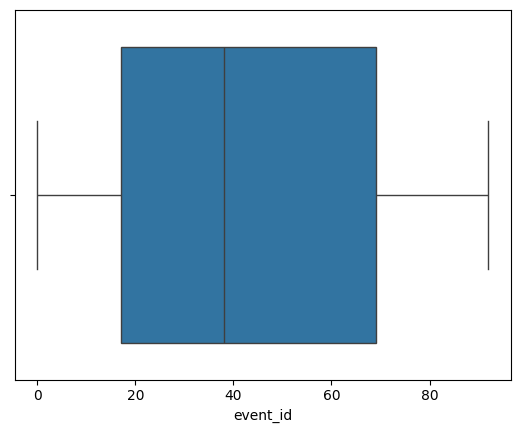

In [ ]:
for col in data.select_dtypes(include=['number']).columns:
    univariateAnalysis_numeric_basic(col, nbins=10)

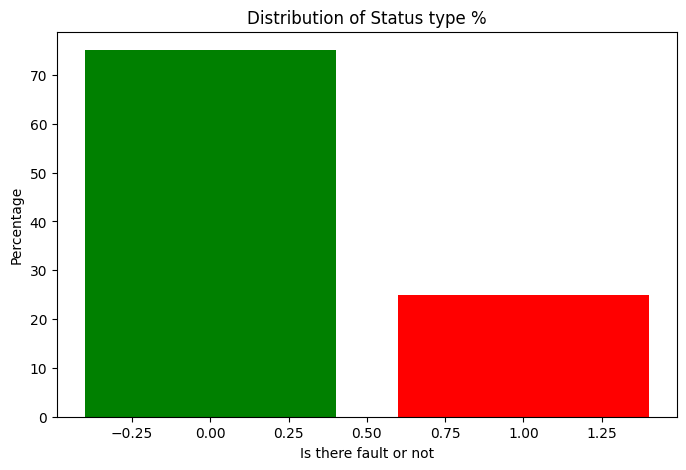

In [ ]:
fig, axes = plt.subplots(figsize=(8,5))
data1 = data["status_type_id"].value_counts(normalize=True)
axes.bar(data1.index, data1*100, color=['green', 'red'])
axes.set_title('Distribution of Status type %')
axes.set_ylabel('Percentage')
axes.set_xlabel('Is there fault or not')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
print(data_num.columns)

Index(['asset_id', 'id', 'status_type_id', 'Ambient temperature avg',
       'Wind absolute direction avg', 'Wind relative direction avg',
       'Windspeed avg', 'Estimated windspeed avg', 'Windspeed max',
       'Windspeed min', 'Windspeed std', 'Pitch angle avg', 'Pitch angle max',
       'Pitch angle min', 'Pitch angle std', 'Hub controller temperature avg',
       'Top nacelle controller temperature avg',
       'Choke coils on the VCS- section temperature avg',
       'VCP-board temperature avg', 'VCS cooling water temperature avg',
       'Gearbox bearing on high speed shaft  temperature avg',
       'Gearbox oil temperature avg',
       'Generator bearing 2(Drive end)  temperature avg',
       'Generator bearing 1(Non-drive end) temperature avg',
       'Generator stator winding phase 1 temperature avg',
       'Generator stator winding phase 2 temperature avg',
       'Generator stator winding phase 3 temperature avg', 'Generator rpm avg',
       'Generator rpm max', 'Generato

In [ ]:
summary_stats = data_num.groupby('status_type_id').agg(['mean', 'median', 'std', 'min', 'max', 'count'])
print(summary_stats)

                 asset_id                                             id  \
                     mean median       std min max   count          mean   
status_type_id                                                             
0               10.471836   11.0  6.874971   0  21  898672  27263.117164   
1               10.301894   11.0  6.551672   0  21  298075  27020.750013   

                                                          \
                 median           std min    max   count   
status_type_id                                             
0               27373.0  15720.837917   0  55869  898672   
1               26585.0  15679.855200   0  56157  298075   

               Ambient temperature avg                                      \
                                  mean median       std  min   max   count   
status_type_id                                                               
0                            20.201207   19.0  5.380400  4.0  40.0  898672   
1     

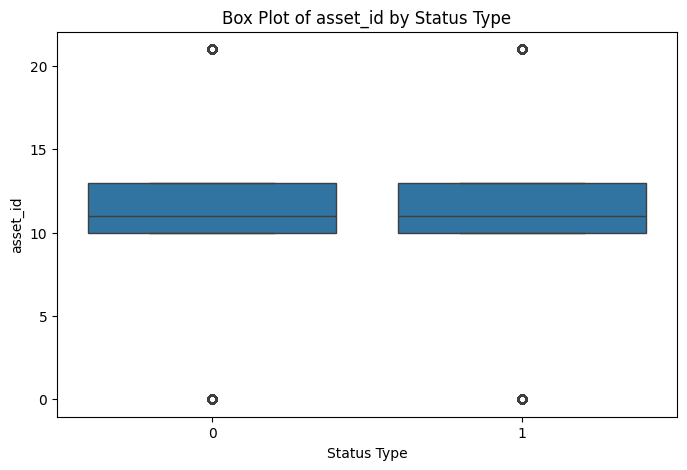

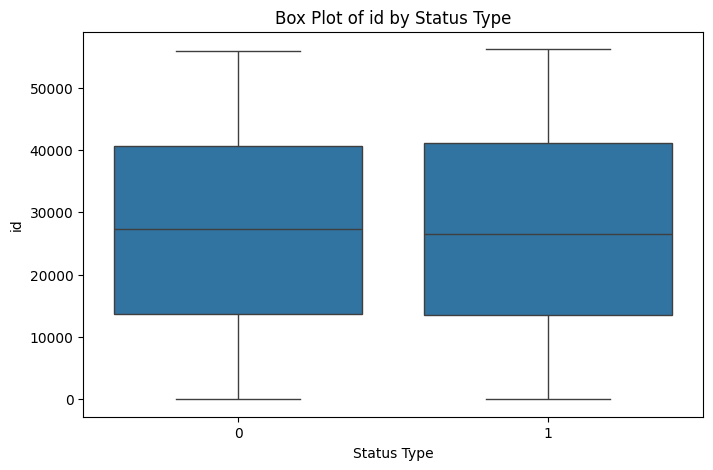

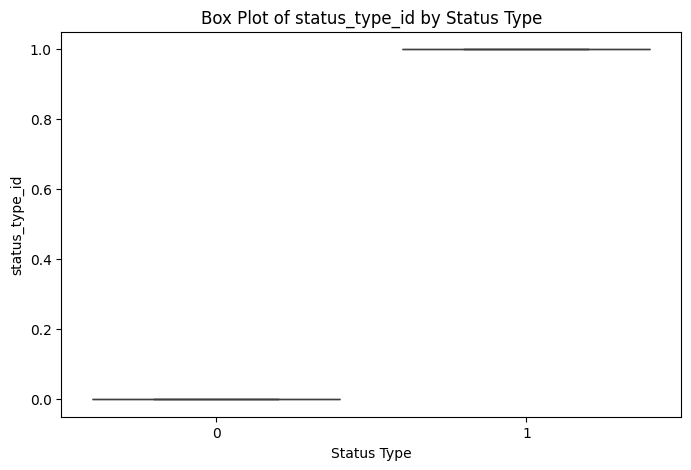

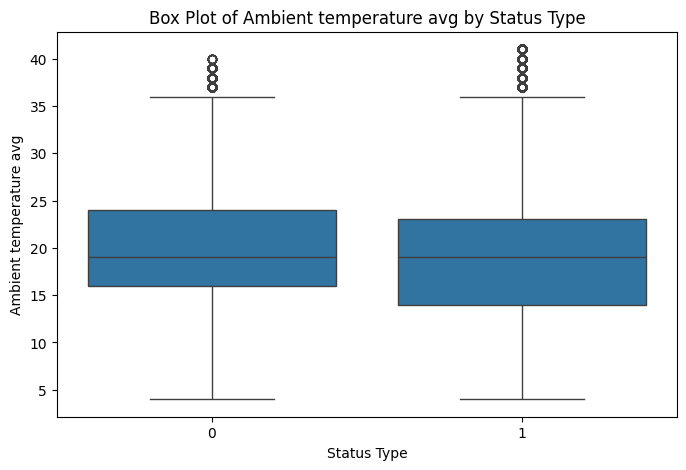

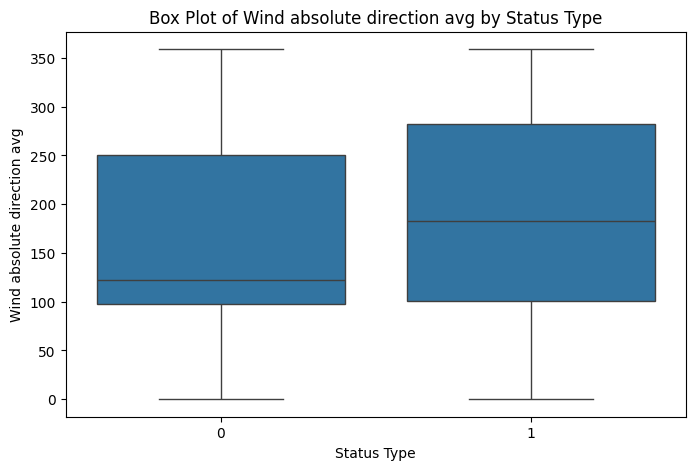

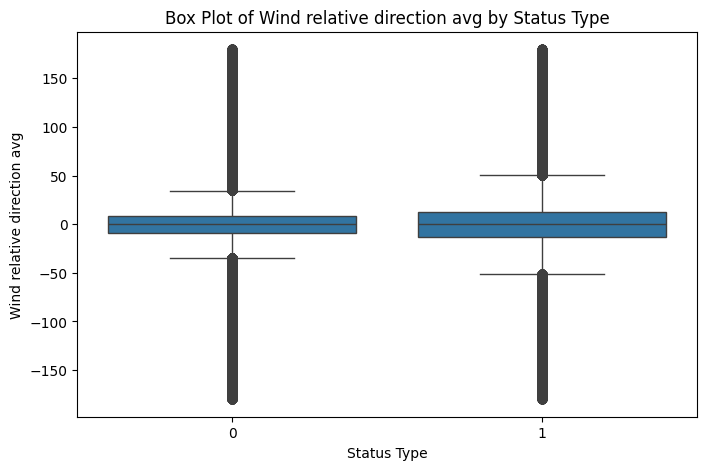

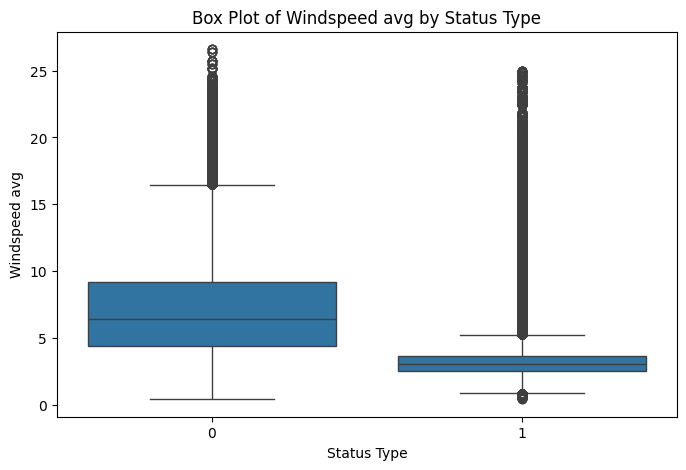

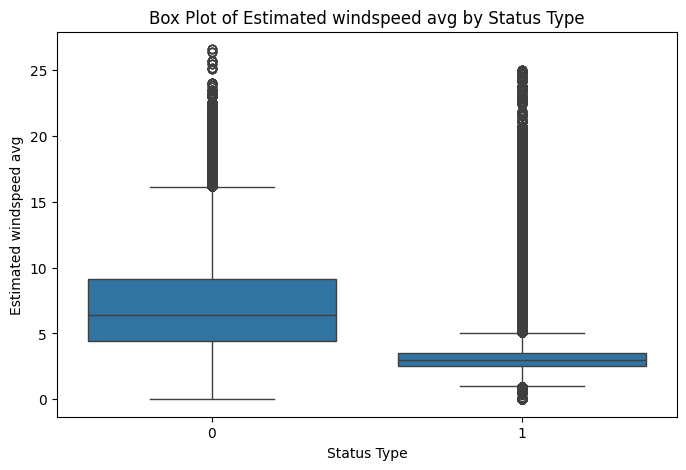

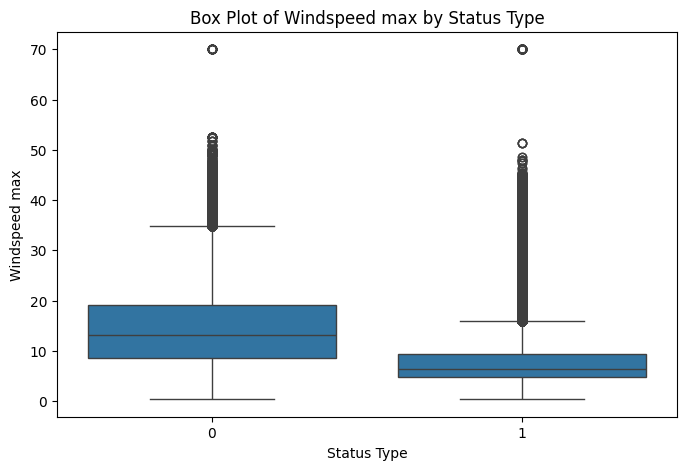

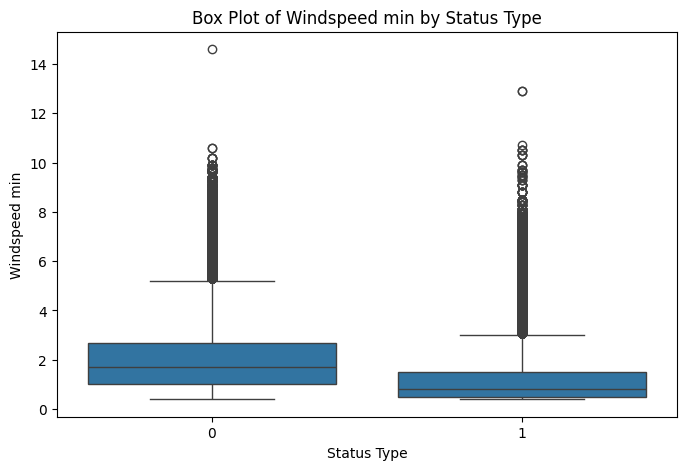

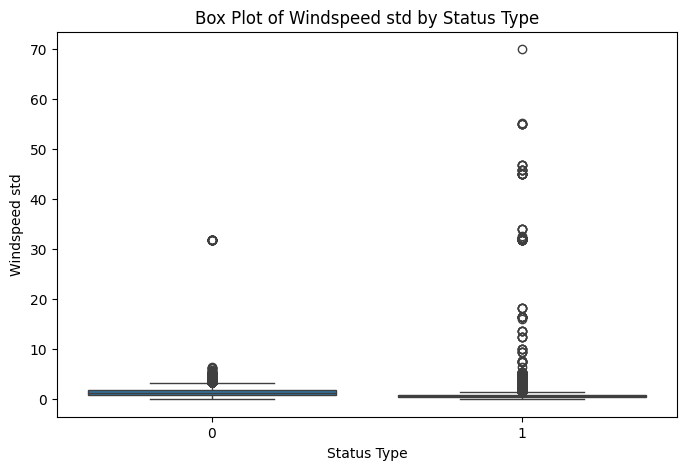

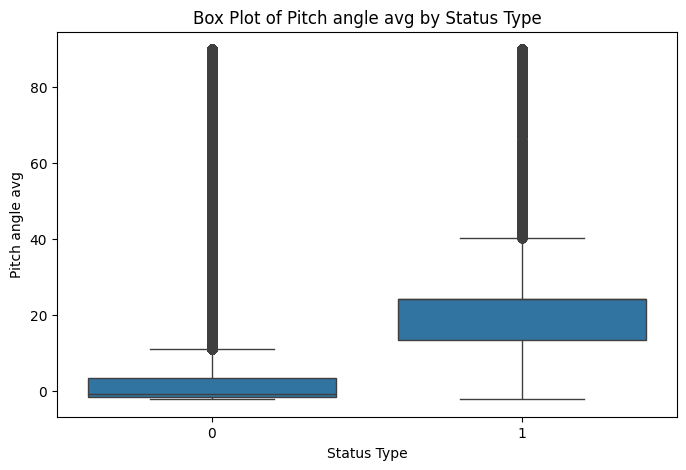

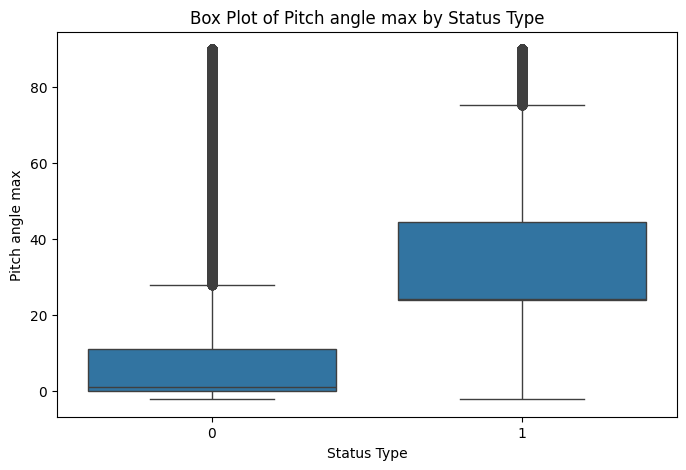

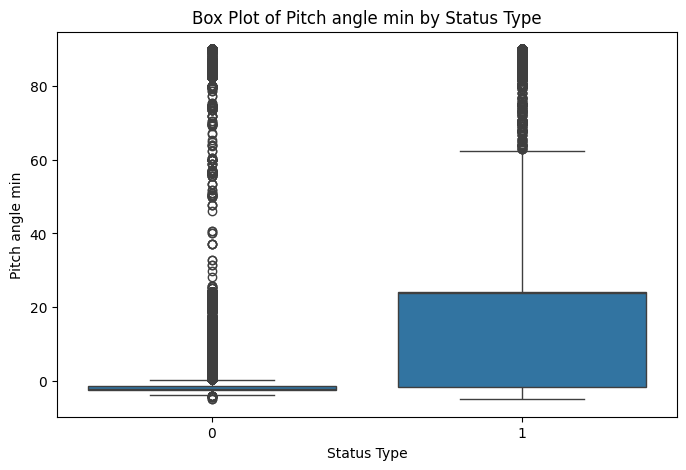

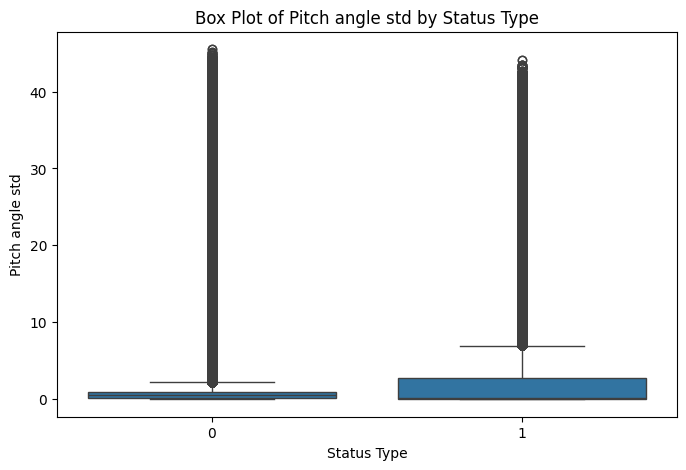

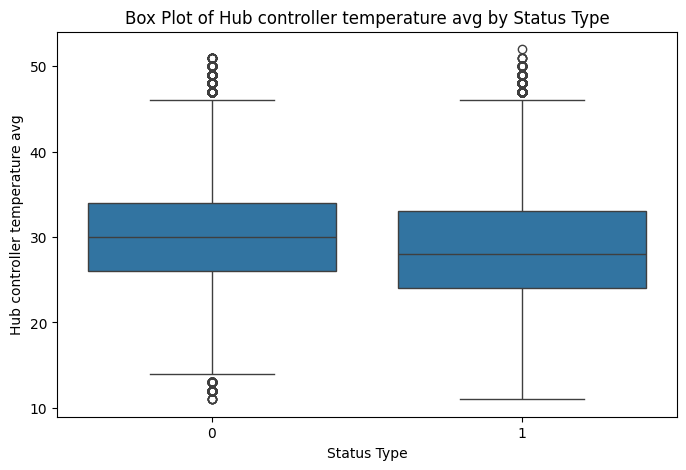

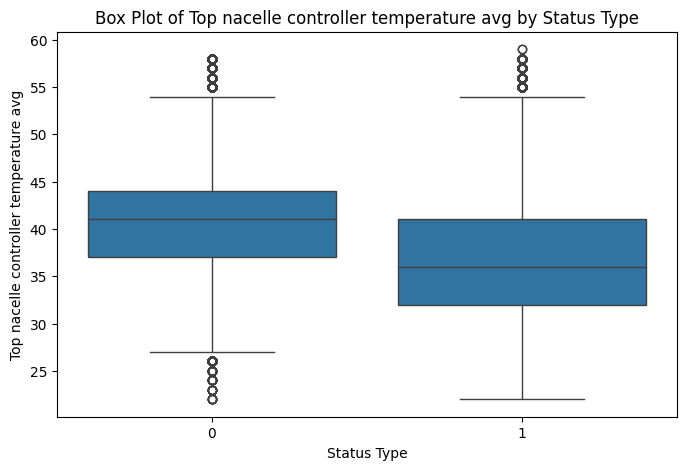

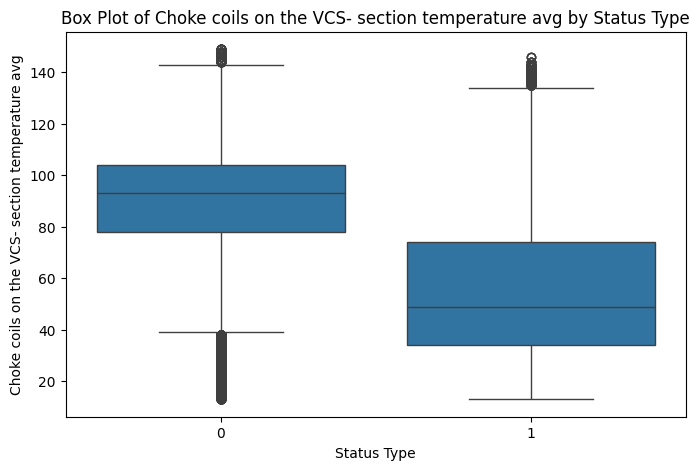

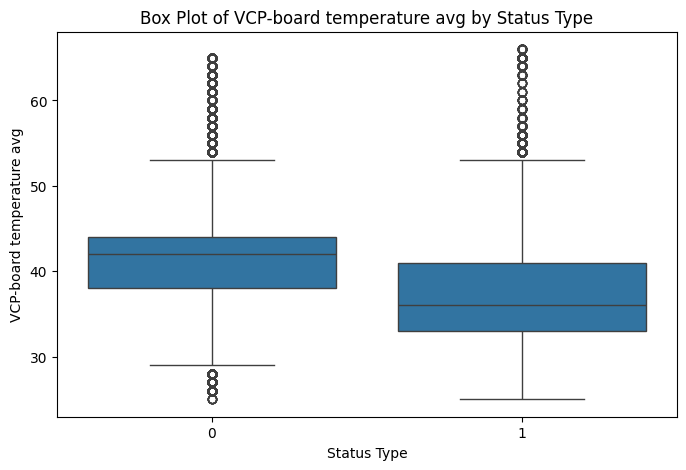

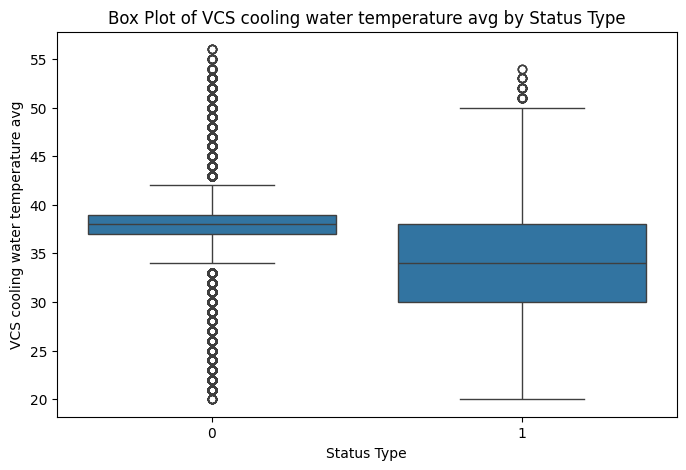

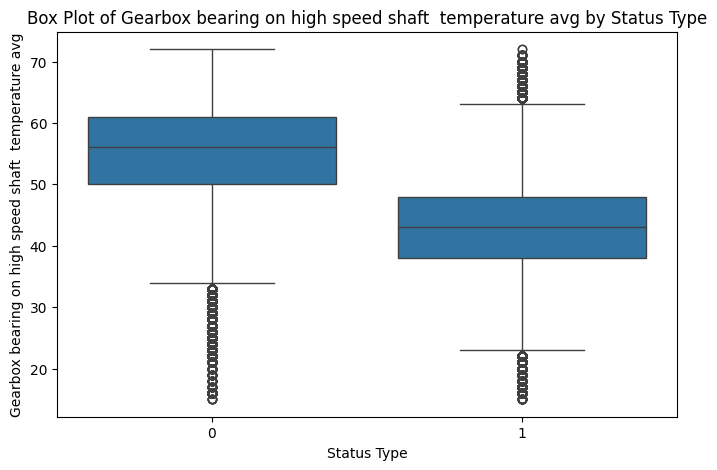

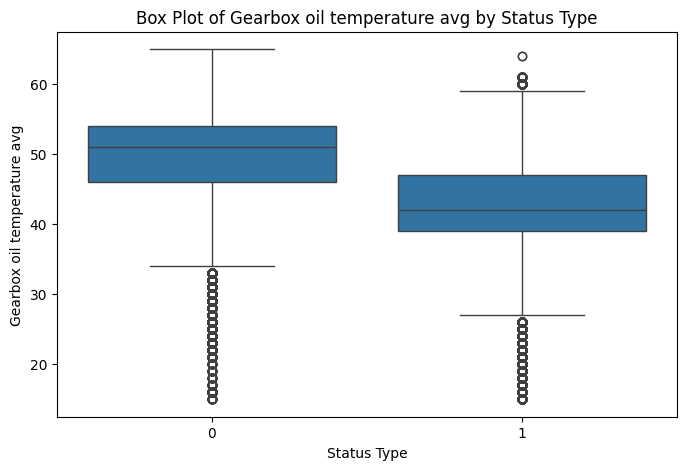

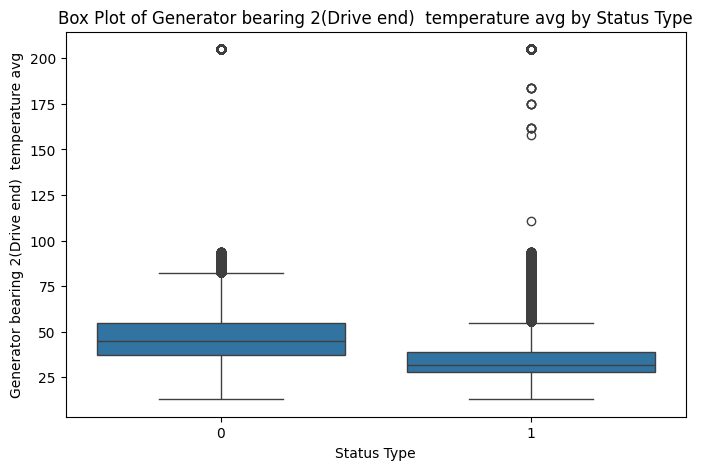

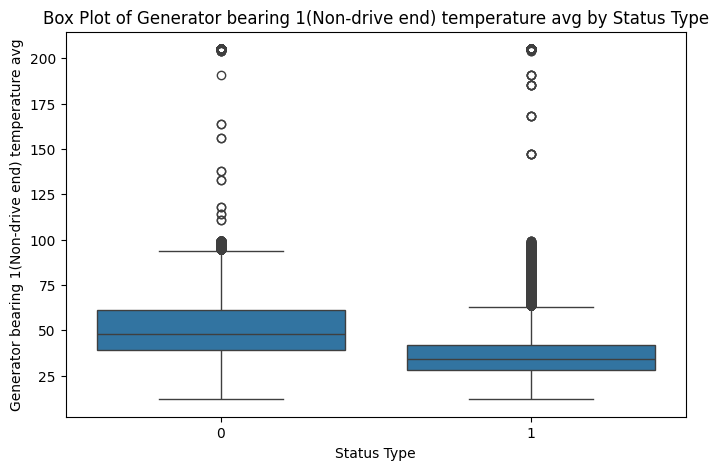

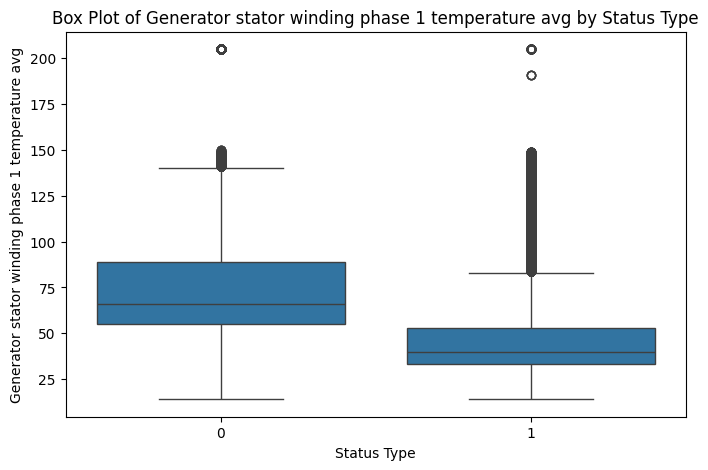

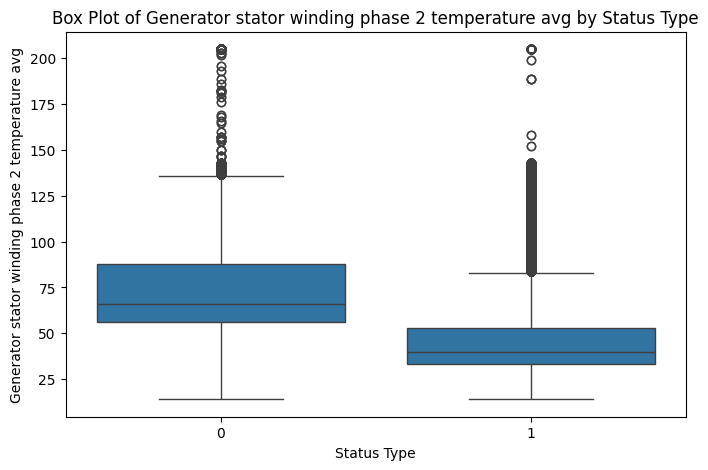

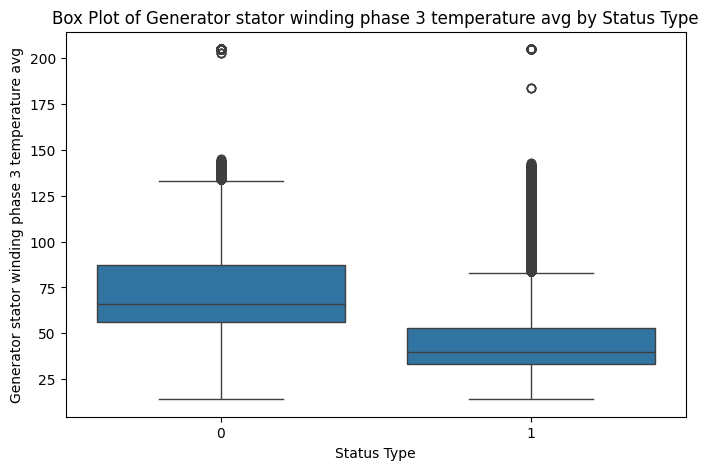

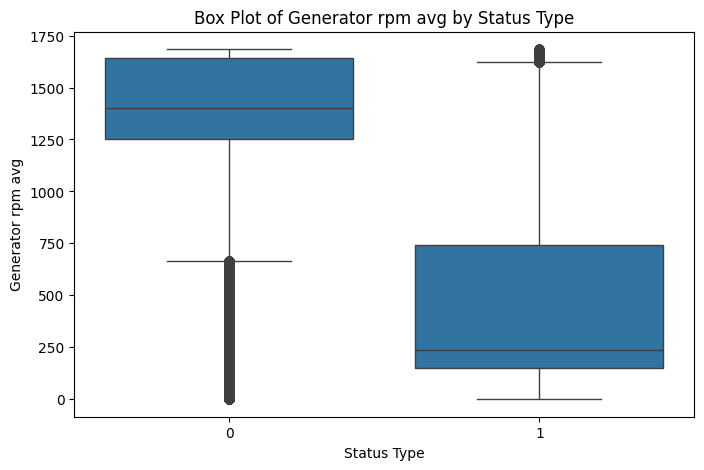

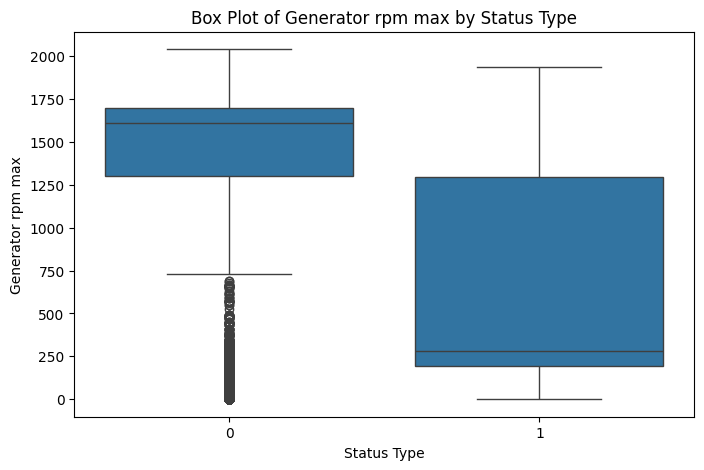

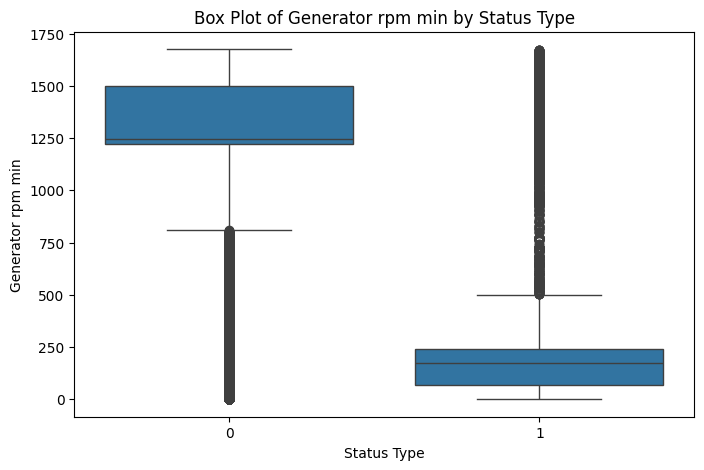

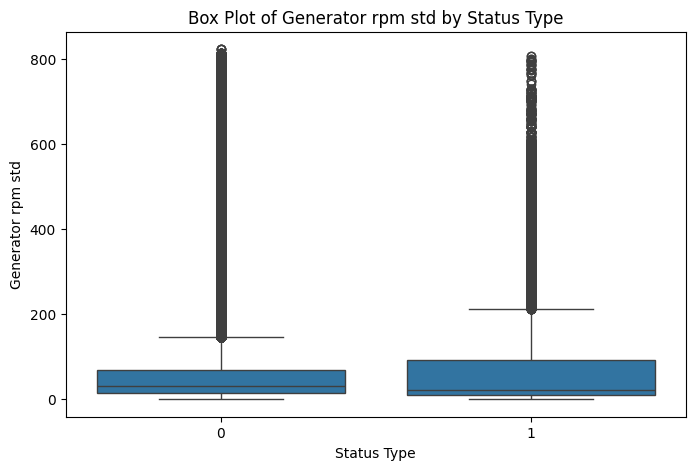

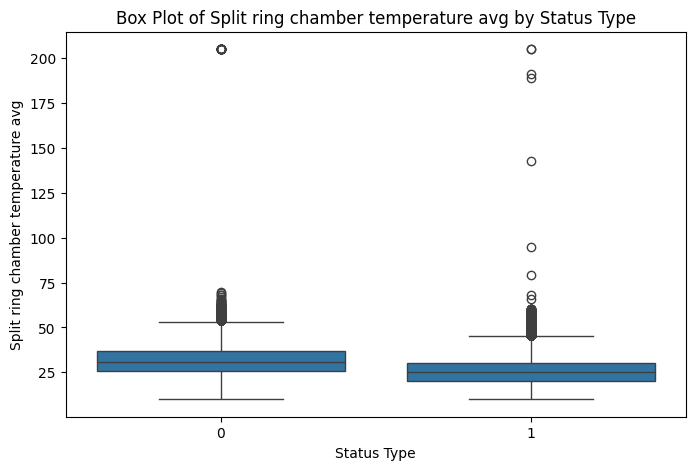

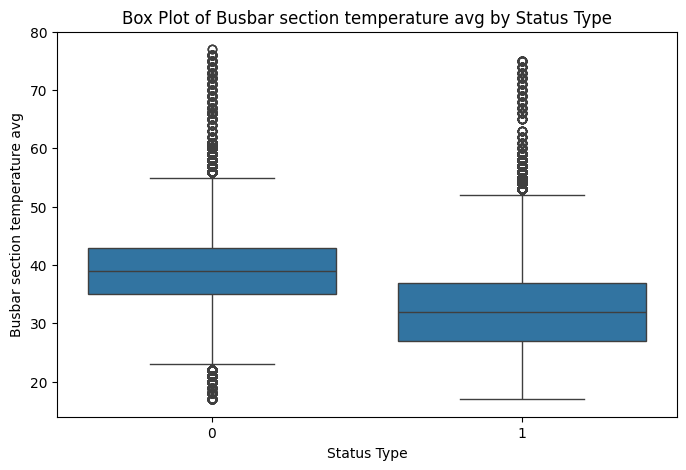

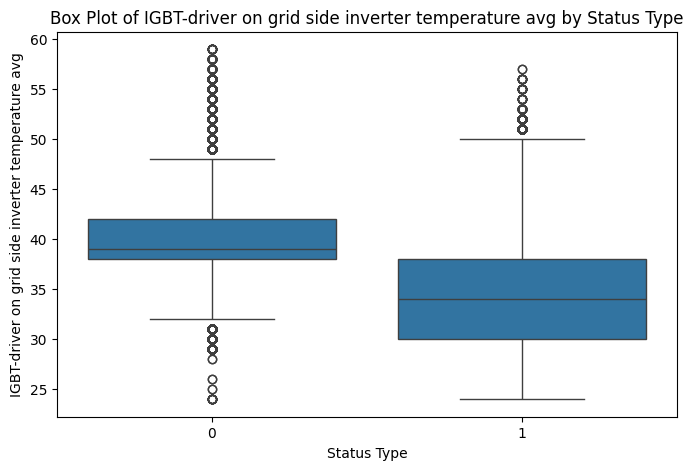

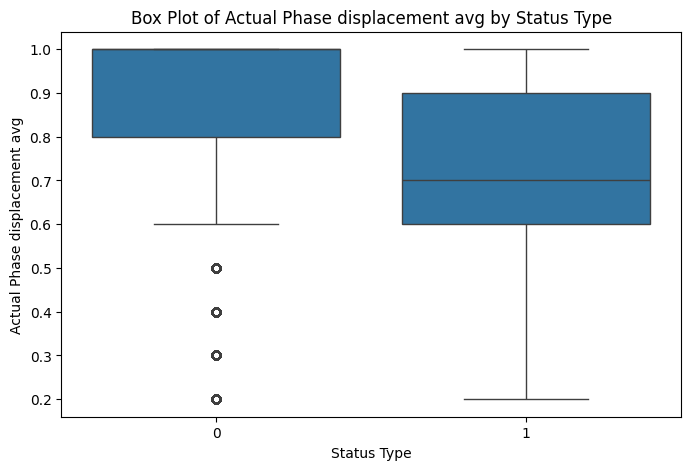

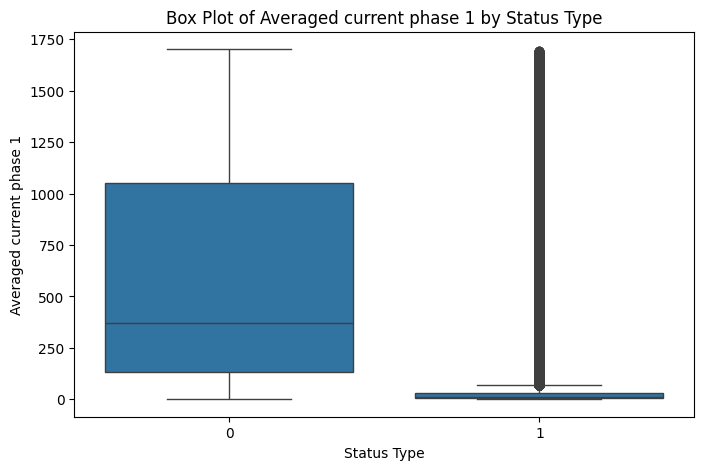

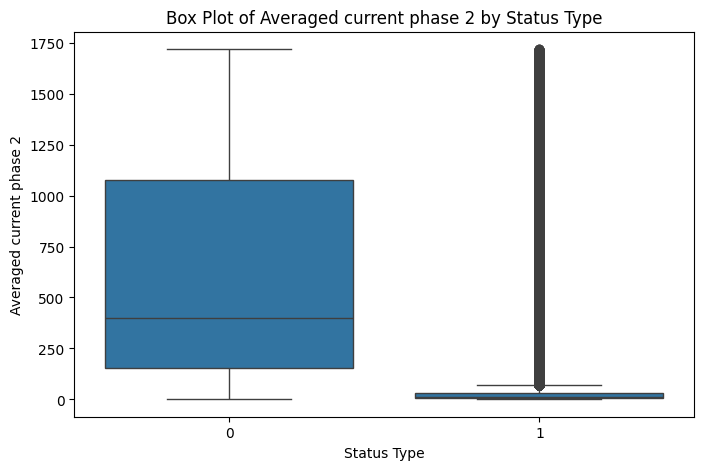

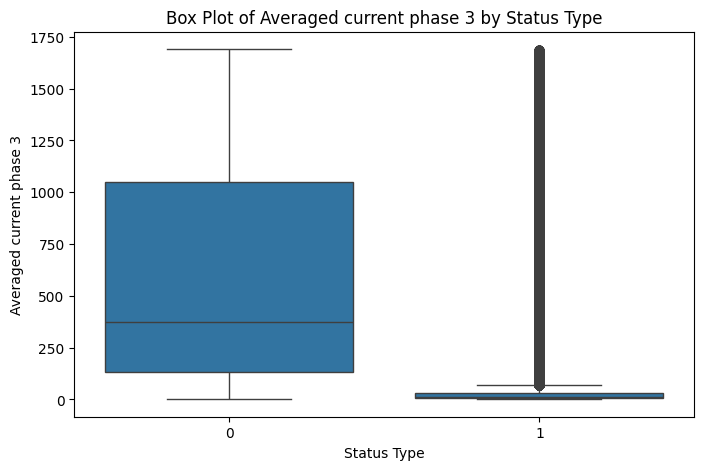

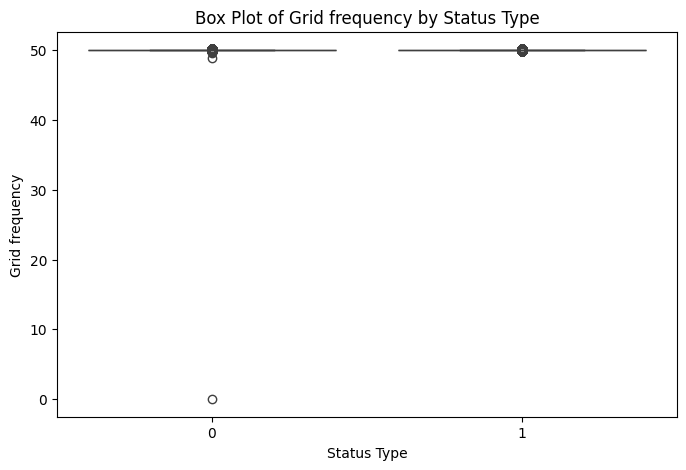

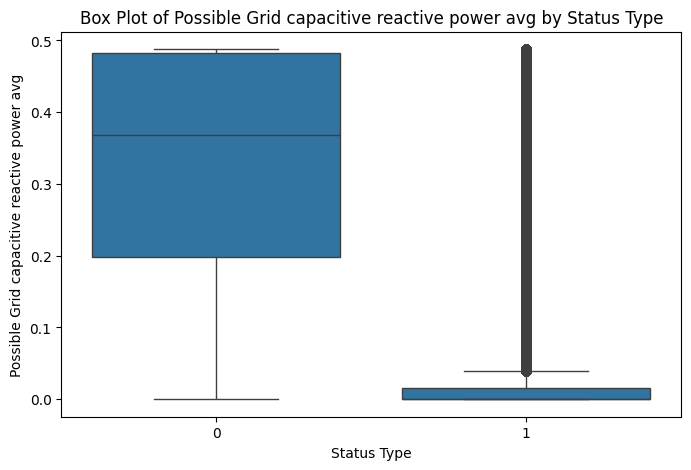

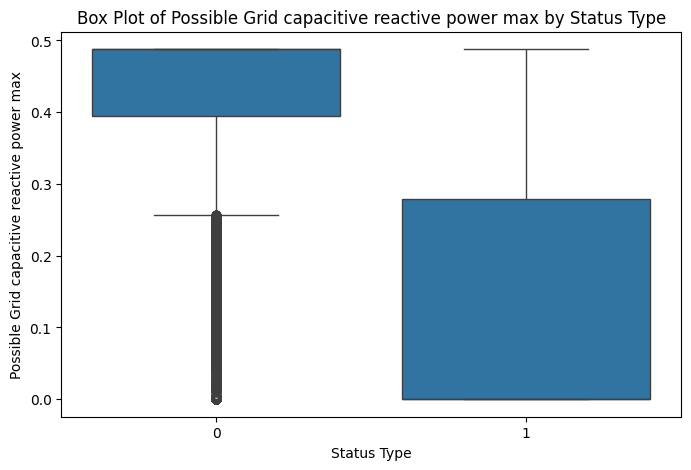

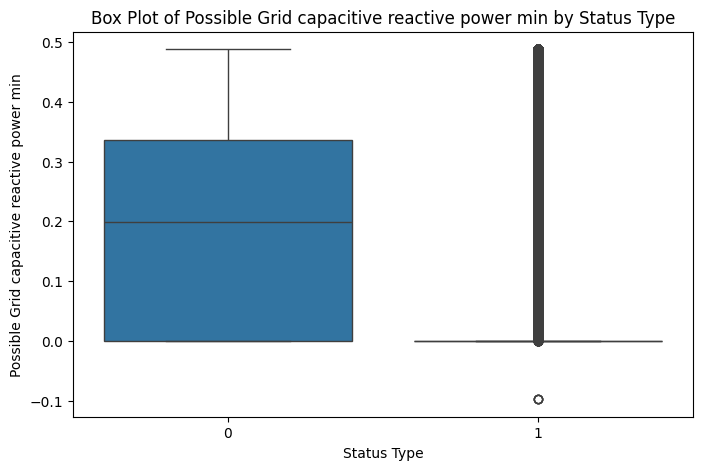

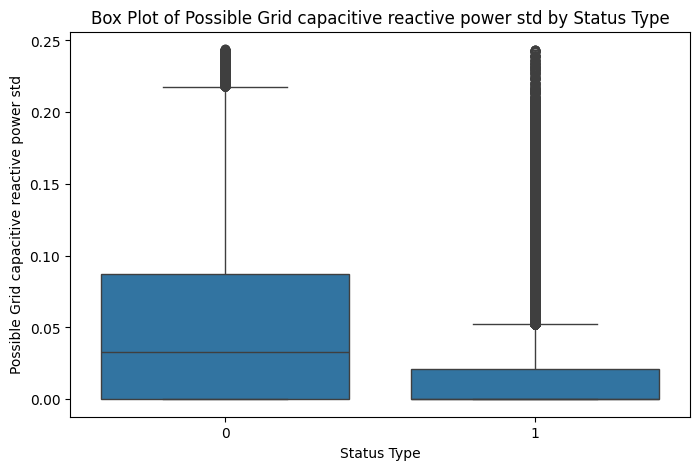

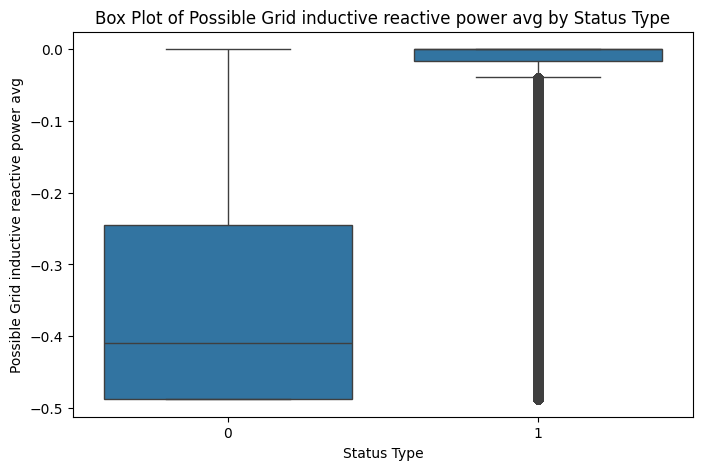

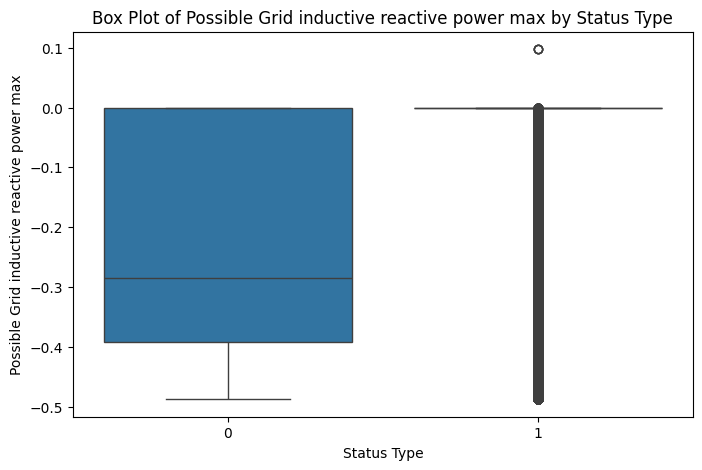

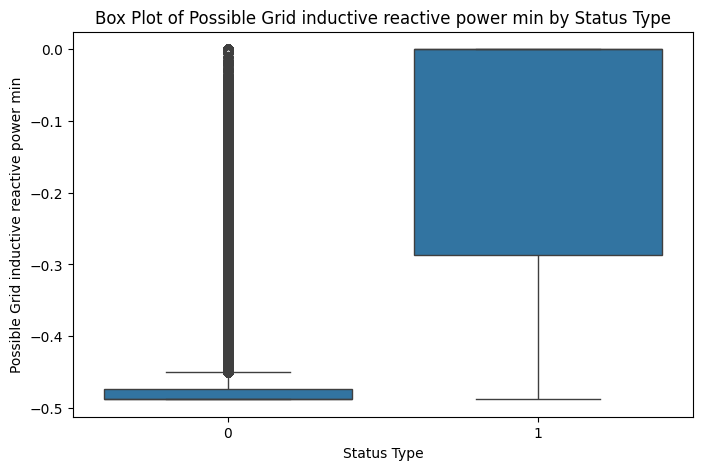

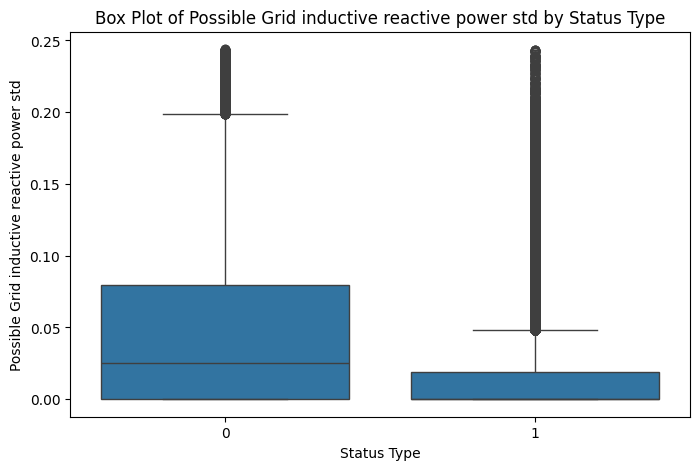

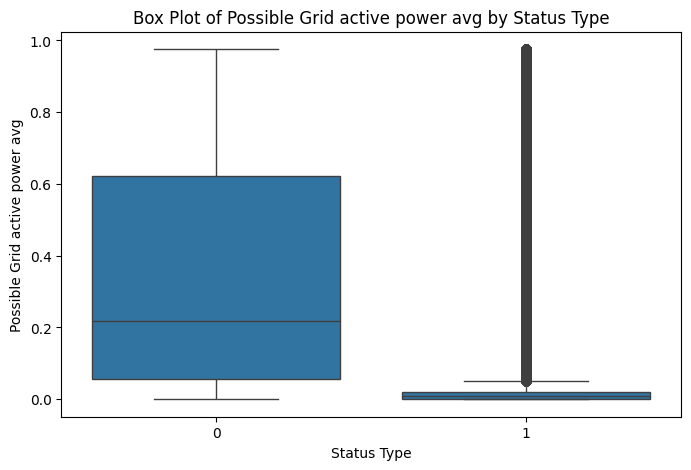

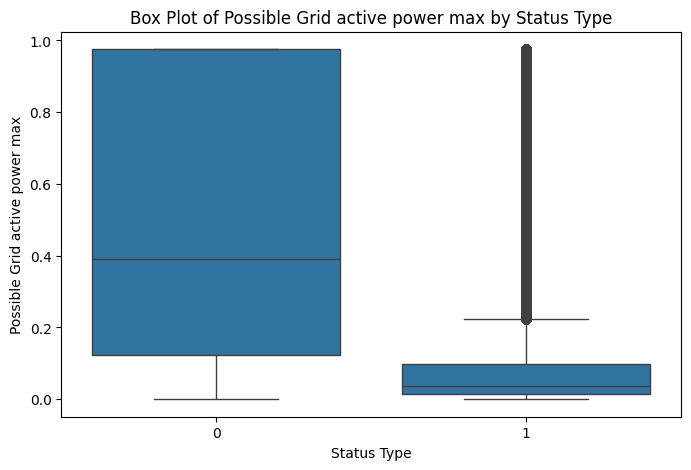

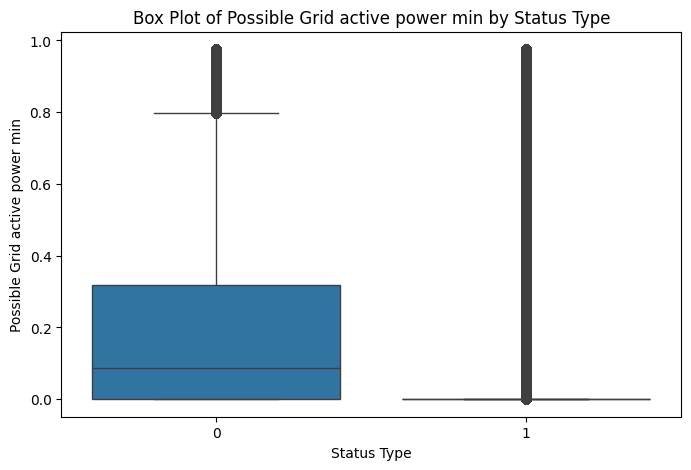

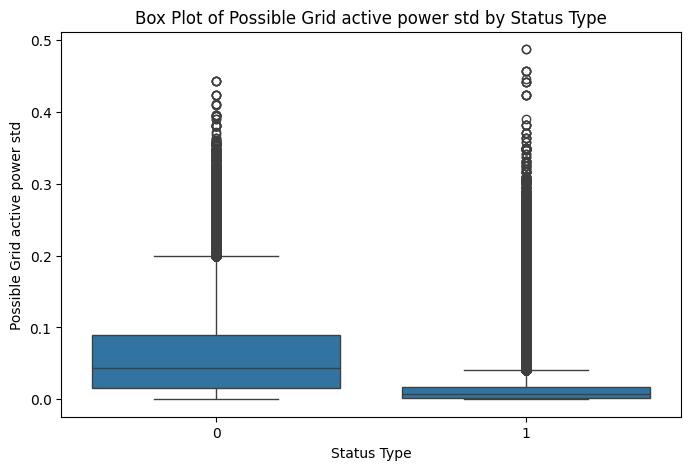

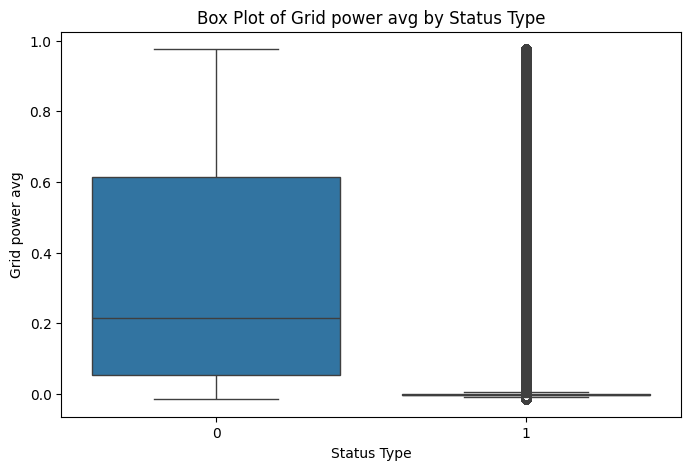

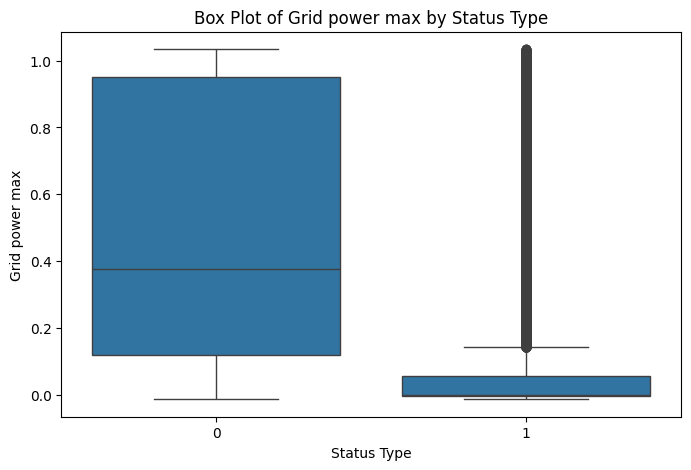

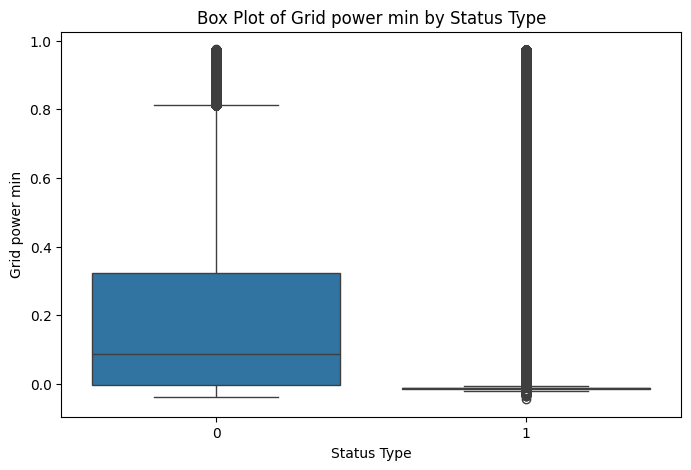

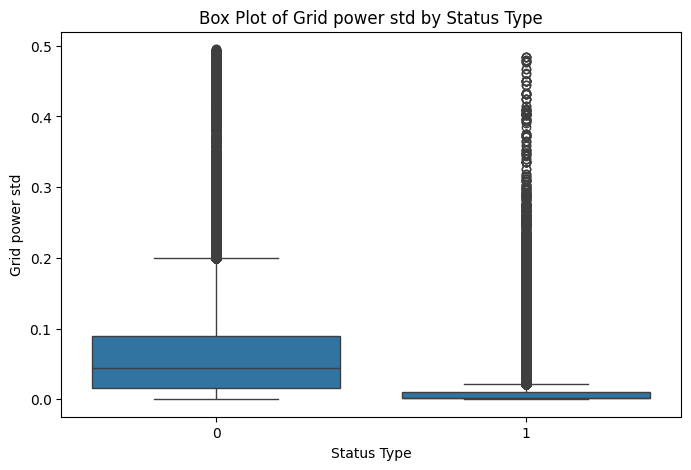

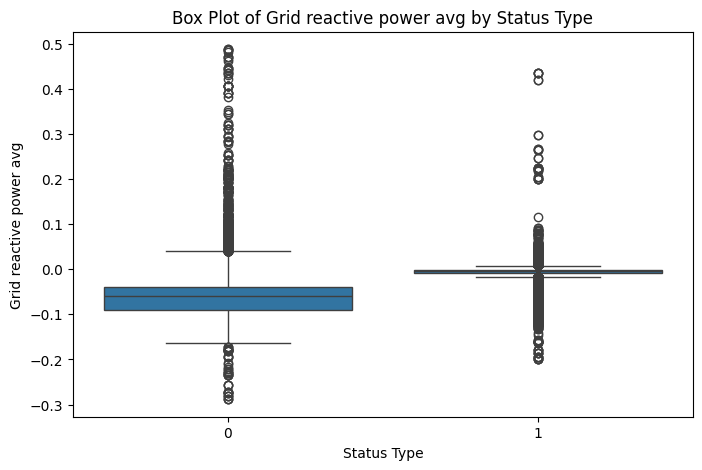

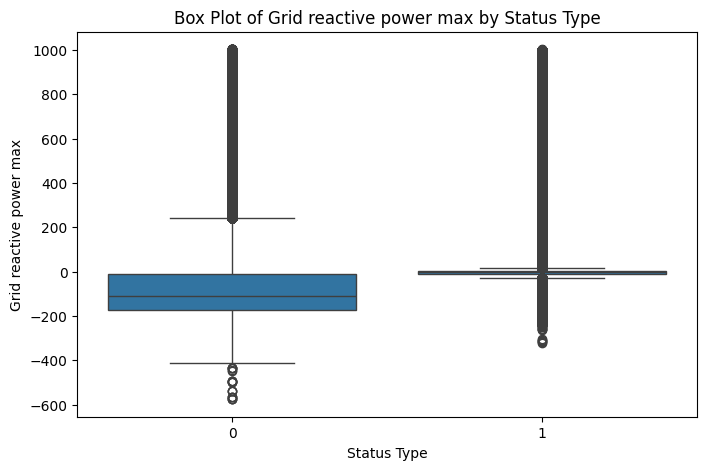

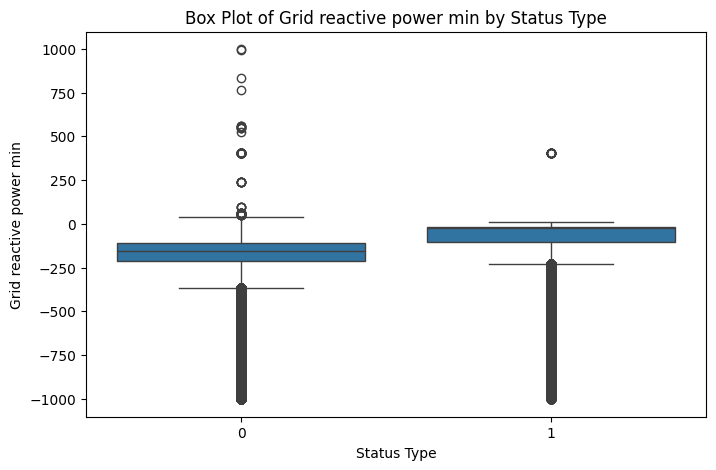

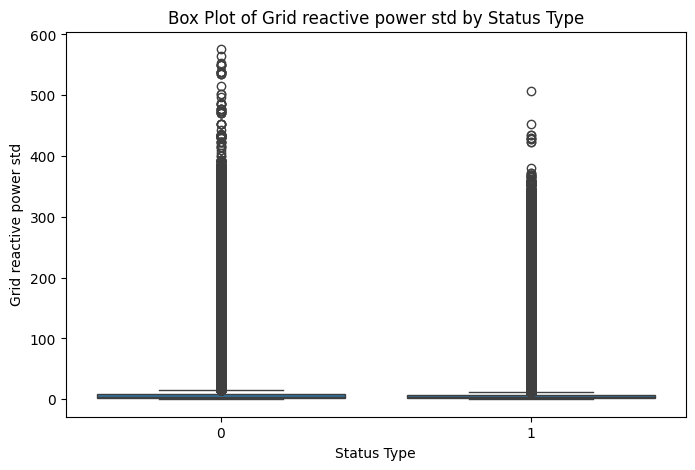

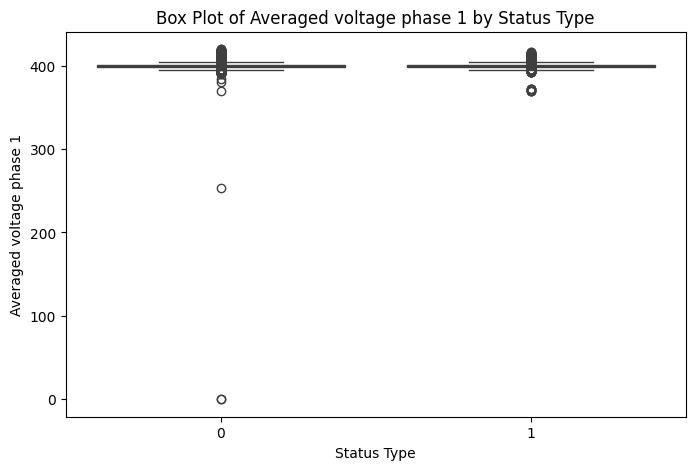

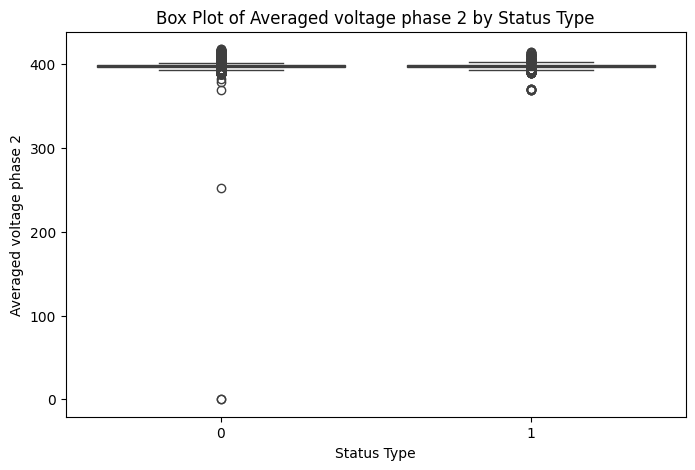

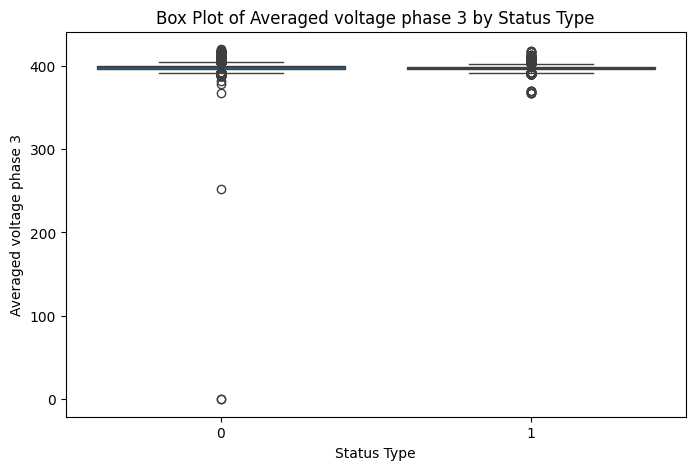

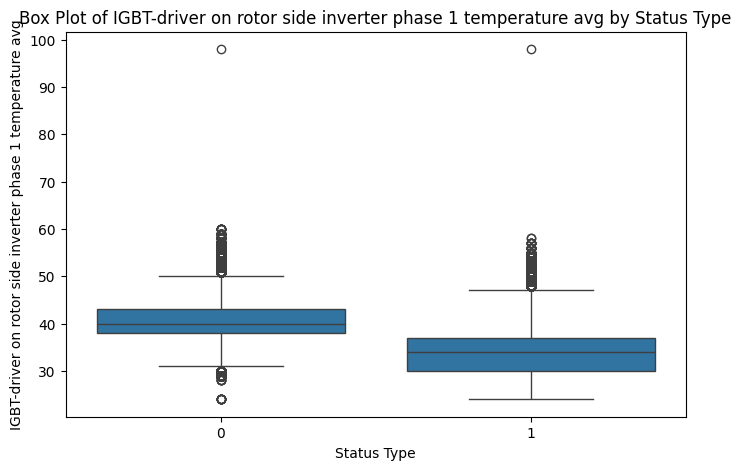

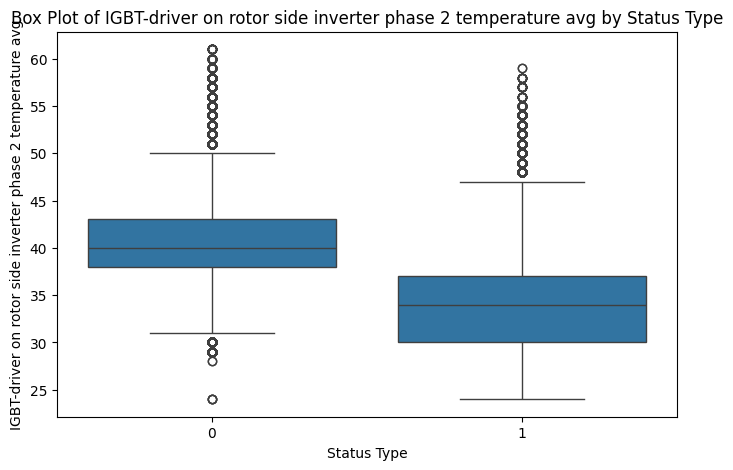

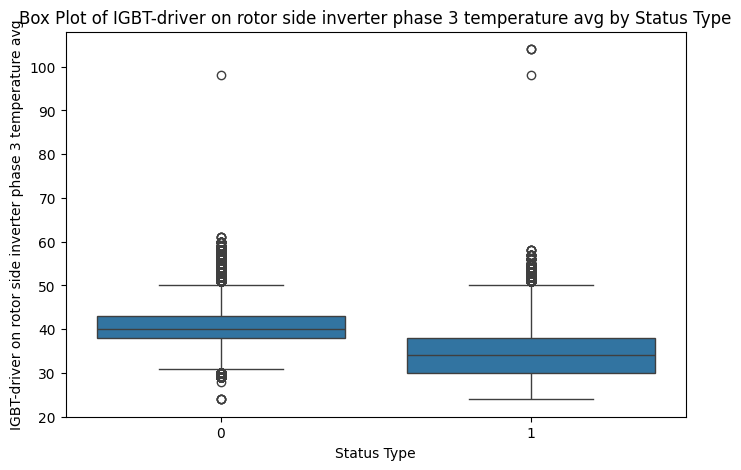

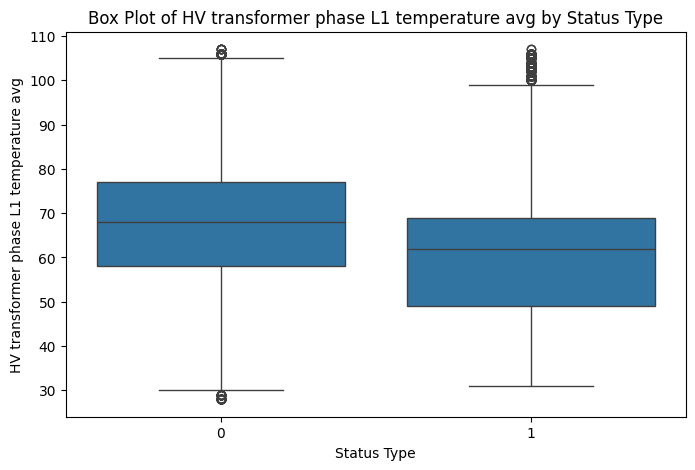

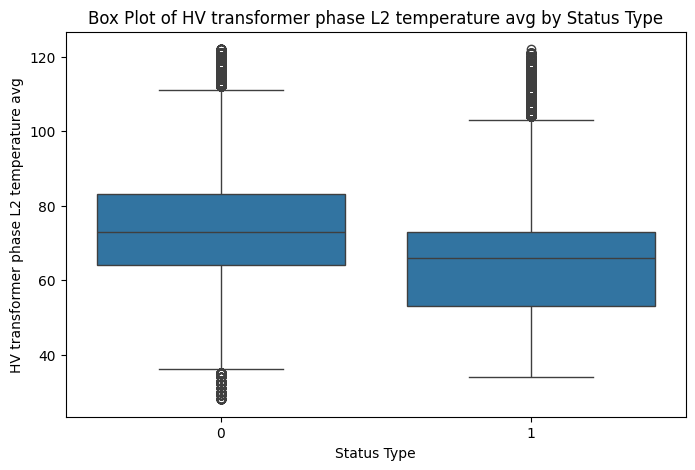

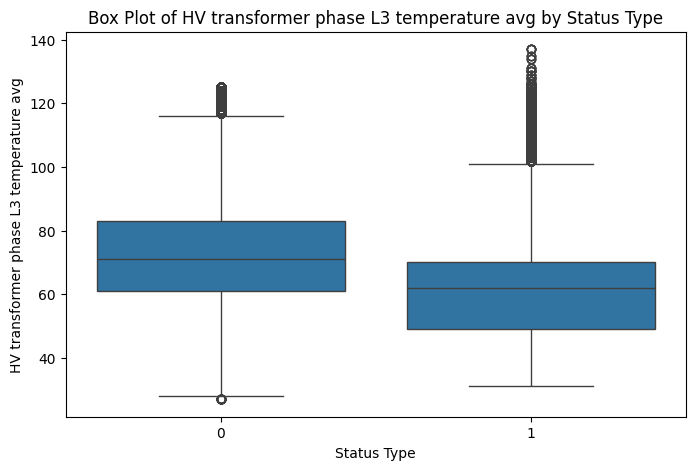

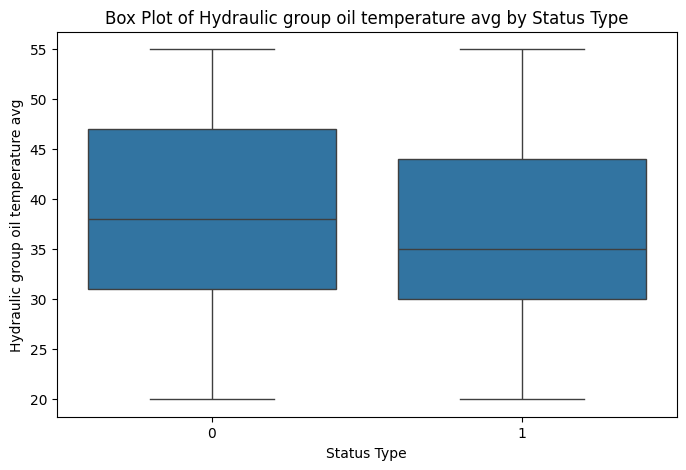

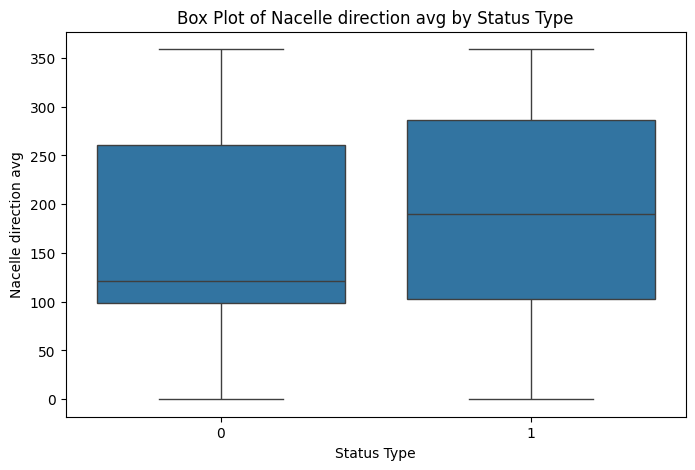

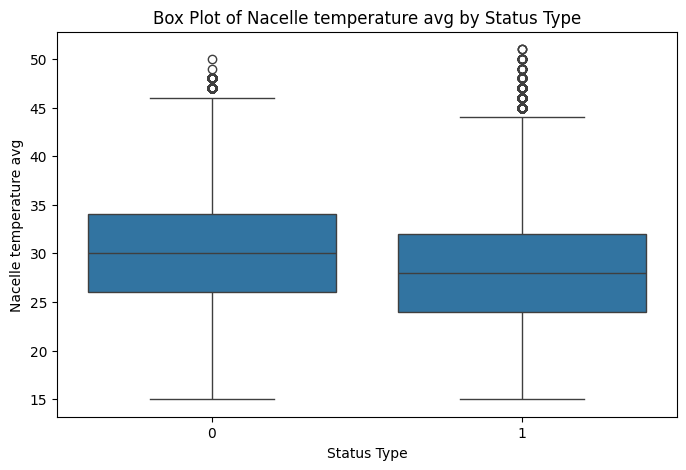

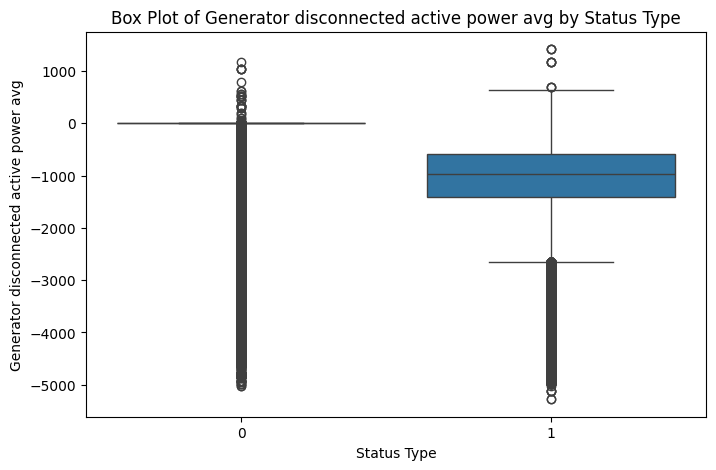

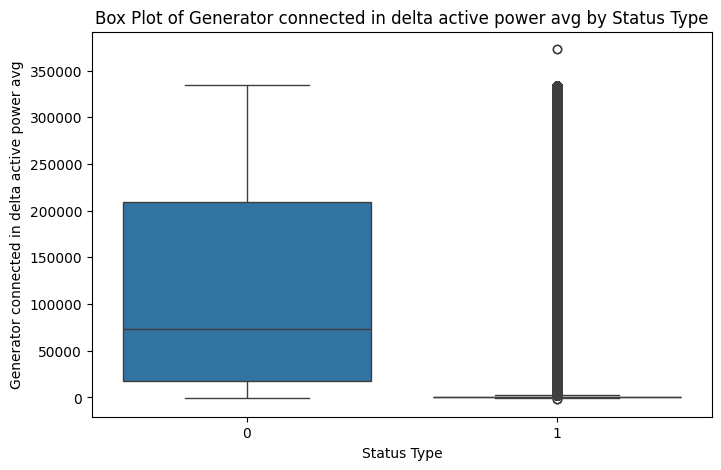

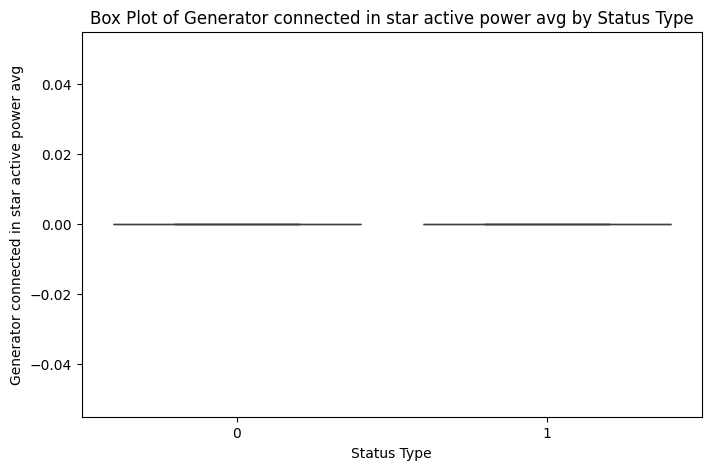

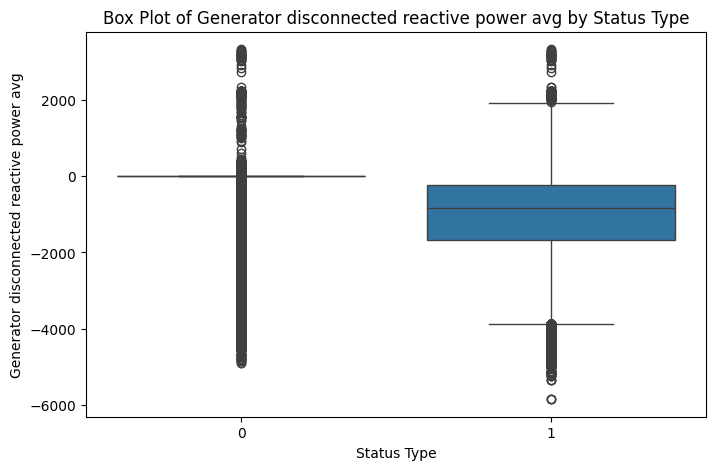

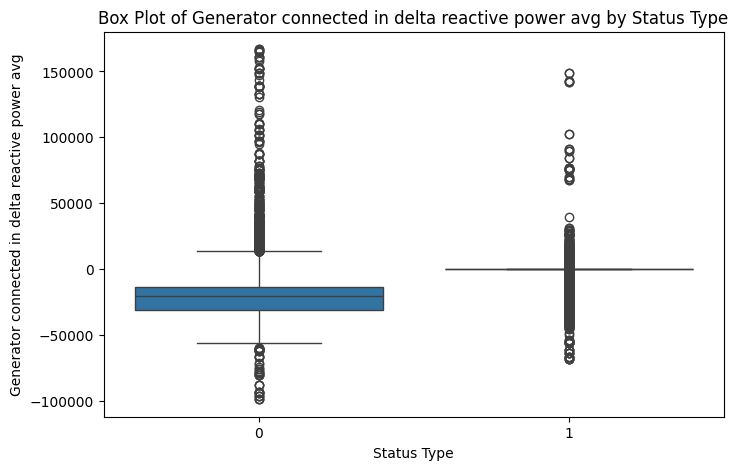

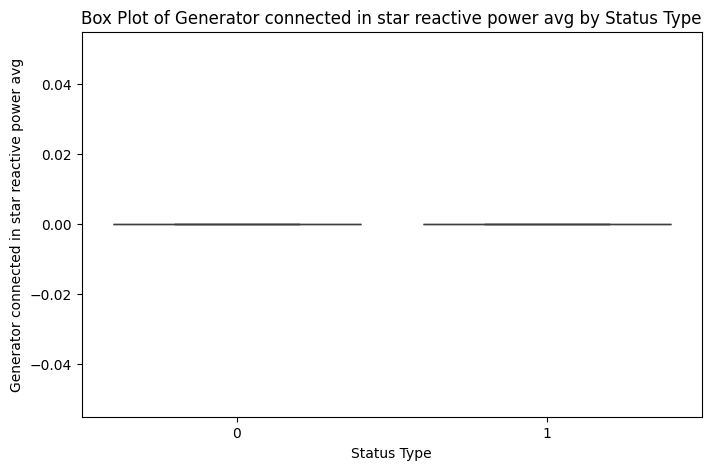

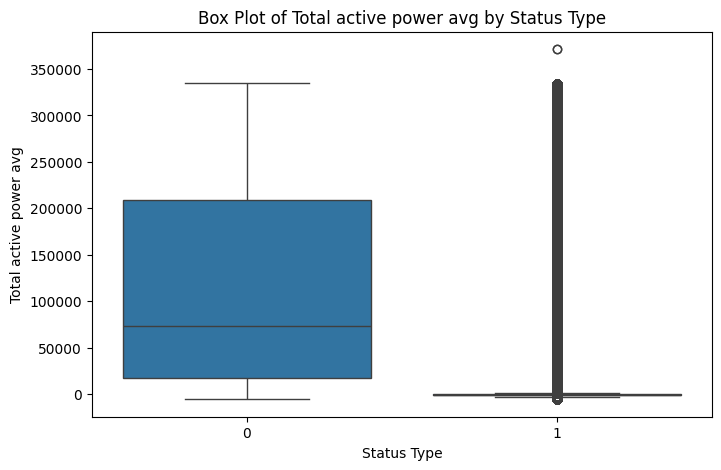

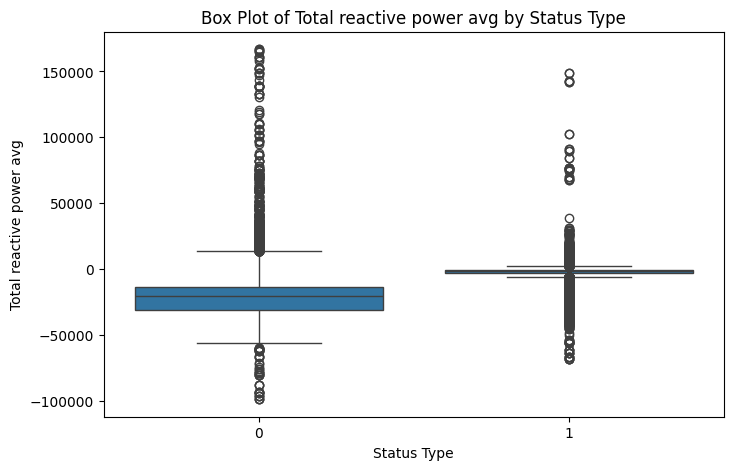

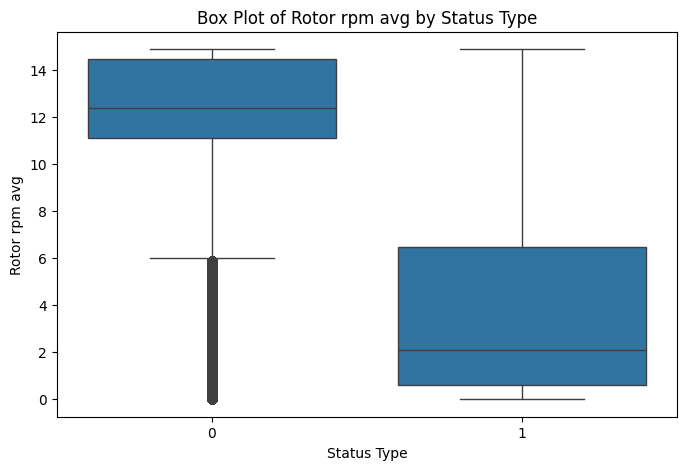

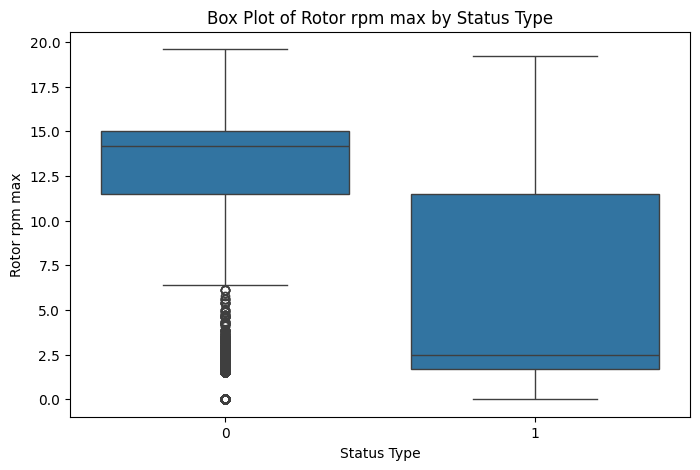

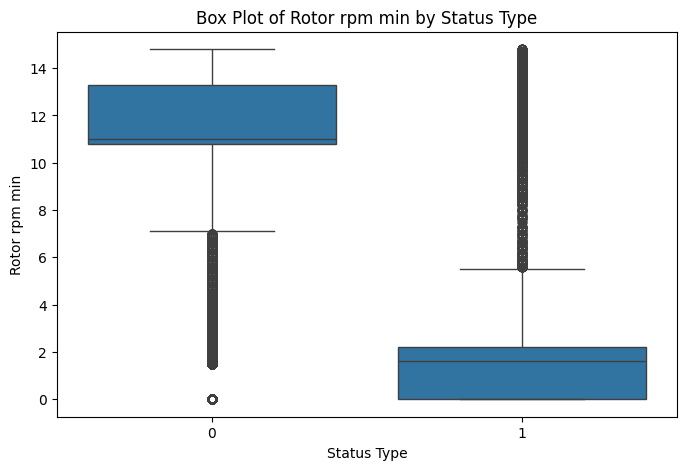

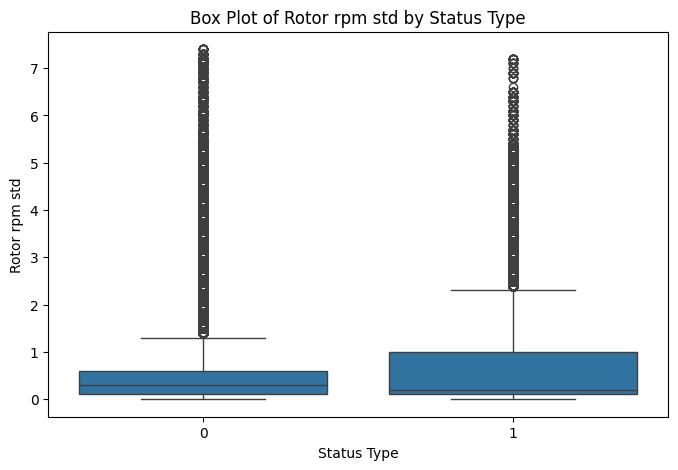

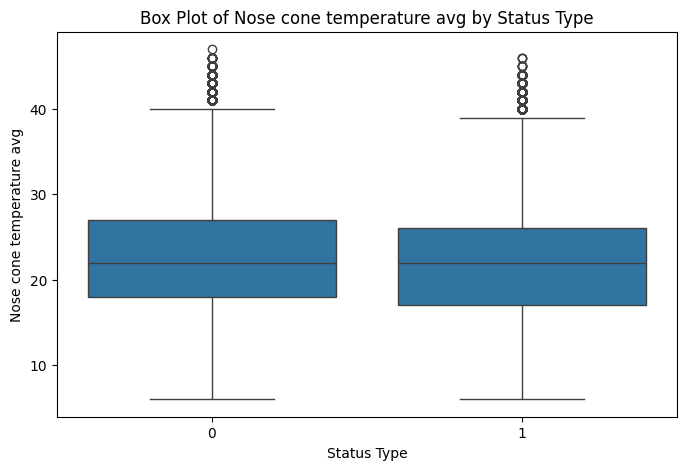

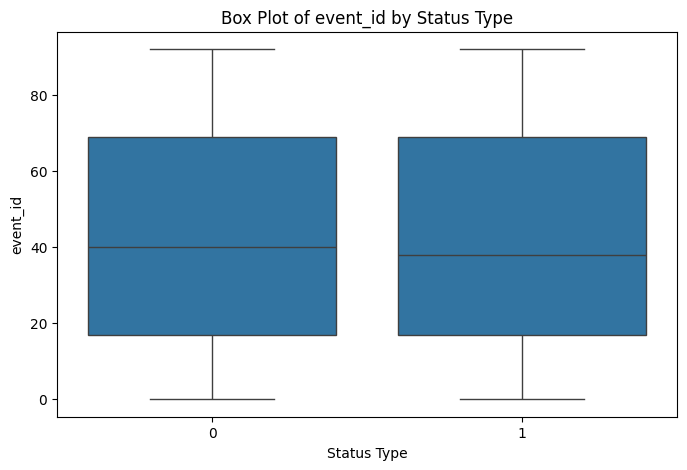

In [ ]:
for column in data_num:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data['status_type_id'], y=data[column])
    plt.title(f'Box Plot of {column} by Status Type')
    plt.xlabel('Status Type')
    plt.ylabel(column)
    plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
numeric_features = data.select_dtypes(include='number').columns.tolist()

In [ ]:
normalizer = MinMaxScaler()
df_normalized = data.copy()
df_normalized[numeric_features] = normalizer.fit_transform(data[numeric_features])

In [ ]:
standardizer = StandardScaler()
df_standardized = data.copy()
df_standardized[numeric_features] = standardizer.fit_transform(data[numeric_features])

In [ ]:
print("Original DataFrame:")
data.head()


Original DataFrame:


time_stamp  asset_id  id train_test  status_type_id  \
0 2021-08-03 06:10:00         0   0      train               0   
1 2021-08-03 06:20:00         0   1      train               0   
2 2021-08-03 06:30:00         0   2      train               0   
3 2021-08-03 06:40:00         0   3      train               0   
4 2021-08-03 06:50:00         0   4      train               0   

   Ambient temperature avg  Wind absolute direction avg  \
0                     22.0                        302.9   
1                     22.0                        307.1   
2                     22.0                        340.6   
3                     22.0                        124.4   
4                     22.0                         66.2   

   Wind relative direction avg  Windspeed avg  Estimated windspeed avg  \
0                        129.4            1.7                      1.7   
1                        133.6            1.7                      1.7   
2                        167.1            0.9                      0.9   
3                        -49.1            1.5                      1.5   
4                       -107.3            1.0                      1.0   

   Windspeed max  Windspeed min  Windspeed std  Pitch angle avg  \
0           11.7            0.5            0.7             24.0   
1            8.3            0.4            0.7             24.0   
2            5.9            0.4            0.4             24.0   
3            7.1            0.6            0.3             24.0   
4            2.1            0.4            0.3             24.0   

   Pitch angle max  Pitch angle min  Pitch angle std  \
0             24.0             23.9              0.0   
1             24.1             23.9              0.0   
2             24.0             20.7              0.1   
3             24.1             23.9              0.0   
4             24.1             23.9              0.0   

   Hub controller temperature avg  Top nacelle controller temperature avg  \
0                            31.0                                    36.0   
1                            31.0                                    36.0   
2                            31.0                                    36.0   
3                            30.0                                    36.0   
4                            30.0                                    36.0   

   Choke coils on the VCS- section temperature avg  VCP-board temperature avg  \
0                                             34.0                       35.0   
1                                             34.0                       35.0   
2                                             34.0                       35.0   
3                                             34.0                       35.0   
4                                             34.0                       35.0   

   VCS cooling water temperature avg  \
0                               33.0   
1                               33.0   
2                               33.0   
3                               33.0   
4                               33.0   

   Gearbox bearing on high speed shaft  temperature avg  \
0                                               39.0      
1                                               38.0      
2                                               38.0      
3                                               38.0      
4                                               38.0      

   Gearbox oil temperature avg  \
0                         41.0   
1                         41.0   
2                         41.0   
3                         41.0   
4                         41.0   

   Generator bearing 2(Drive end)  temperature avg  \
0                                             32.0   
1                                             32.0   
2                                             32.0   
3                                             32.0   
4                                             31.0   

In [ ]:
print("\nNormalized DataFrame:")
df_normalized.head()


Normalized DataFrame:


time_stamp  asset_id        id train_test  status_type_id  \
0 2021-08-03 06:10:00       0.0  0.000000      train             0.0   
1 2021-08-03 06:20:00       0.0  0.000018      train             0.0   
2 2021-08-03 06:30:00       0.0  0.000036      train             0.0   
3 2021-08-03 06:40:00       0.0  0.000053      train             0.0   
4 2021-08-03 06:50:00       0.0  0.000071      train             0.0   

   Ambient temperature avg  Wind absolute direction avg  \
0                 0.486486                     0.843733   
1                 0.486486                     0.855432   
2                 0.486486                     0.948747   
3                 0.486486                     0.346518   
4                 0.486486                     0.184401   

   Wind relative direction avg  Windspeed avg  Estimated windspeed avg  \
0                     0.859444       0.049618                 0.063910   
1                     0.871111       0.049618                 0.063910   
2                     0.964167       0.019084                 0.033835   
3                     0.363611       0.041985                 0.056391   
4                     0.201944       0.022901                 0.037594   

   Windspeed max  Windspeed min  Windspeed std  Pitch angle avg  \
0       0.162356       0.007042       0.010000          0.28494   
1       0.113506       0.000000       0.010000          0.28494   
2       0.079023       0.000000       0.005714          0.28494   
3       0.096264       0.014085       0.004286          0.28494   
4       0.024425       0.000000       0.004286          0.28494   

   Pitch angle max  Pitch angle min  Pitch angle std  \
0         0.284165         0.304211         0.000000   
1         0.285249         0.304211         0.000000   
2         0.284165         0.270526         0.002198   
3         0.285249         0.304211         0.000000   
4         0.285249         0.304211         0.000000   

   Hub controller temperature avg  Top nacelle controller temperature avg  \
0                        0.487805                                0.378378   
1                        0.487805                                0.378378   
2                        0.487805                                0.378378   
3                        0.463415                                0.378378   
4                        0.463415                                0.378378   

   Choke coils on the VCS- section temperature avg  VCP-board temperature avg  \
0                                         0.154412                   0.243902   
1                                         0.154412                   0.243902   
2                                         0.154412                   0.243902   
3                                         0.154412                   0.243902   
4                                         0.154412                   0.243902   

   VCS cooling water temperature avg  \
0                           0.361111   
1                           0.361111   
2                           0.361111   
3                           0.361111   
4                           0.361111   

   Gearbox bearing on high speed shaft  temperature avg  \
0                                           0.421053      
1                                           0.403509      
2                                           0.403509      
3                                           0.403509      
4                                           0.403509      

   Gearbox oil temperature avg  \
0                         0.52   
1                         0.52   
2                         0.52   
3                         0.52   
4                         0.52   

   Generator bearing 2(Drive end)  temperature avg  \
0                                         0.098958   
1                                         0.098958   
2                                         0.098958   
3                                         0.098958   
4                

In [ ]:
print("\nStandardized DataFrame:")
df_standardized.head()


Standardized DataFrame:


time_stamp  asset_id        id train_test  status_type_id  \
0 2021-08-03 06:10:00 -1.534591 -1.731449      train        -0.57592   
1 2021-08-03 06:20:00 -1.534591 -1.731385      train        -0.57592   
2 2021-08-03 06:30:00 -1.534591 -1.731321      train        -0.57592   
3 2021-08-03 06:40:00 -1.534591 -1.731258      train        -0.57592   
4 2021-08-03 06:50:00 -1.534591 -1.731194      train        -0.57592   

   Ambient temperature avg  Wind absolute direction avg  \
0                 0.368857                     1.426164   
1                 0.368857                     1.471526   
2                 0.368857                     1.833340   
3                 0.368857                    -0.501708   
4                 0.368857                    -1.130291   

   Wind relative direction avg  Windspeed avg  Estimated windspeed avg  \
0                     3.945608      -1.206843                -1.228219   
1                     4.073798      -1.206843                -1.228219   
2                     5.096269      -1.421299                -1.448973   
3                    -1.502483      -1.260457                -1.283407   
4                    -3.278836      -1.394492                -1.421379   

   Windspeed max  Windspeed min  Windspeed std  Pitch angle avg  \
0      -0.133981      -1.029202      -0.627474         0.813965   
1      -0.592142      -1.110674      -0.627474         0.813965   
2      -0.915551      -1.110674      -1.004087         0.813965   
3      -0.753846      -0.947729      -1.129624         0.813965   
4      -1.427614      -1.110674      -1.129624         0.813965   

   Pitch angle max  Pitch angle min  Pitch angle std  \
0         0.478715         0.963991        -0.420058   
1         0.483537         0.963991        -0.420058   
2         0.478715         0.785903        -0.396150   
3         0.483537         0.963991        -0.420058   
4         0.483537         0.963991        -0.420058   

   Hub controller temperature avg  Top nacelle controller temperature avg  \
0                        0.215948                                -0.66421   
1                        0.215948                                -0.66421   
2                        0.215948                                -0.66421   
3                        0.033625                                -0.66421   
4                        0.033625                                -0.66421   

   Choke coils on the VCS- section temperature avg  VCP-board temperature avg  \
0                                        -1.538294                  -0.920195   
1                                        -1.538294                  -0.920195   
2                                        -1.538294                  -0.920195   
3                                        -1.538294                  -0.920195   
4                                        -1.538294                  -0.920195   

   VCS cooling water temperature avg  \
0                          -0.754546   
1                          -0.754546   
2                          -0.754546   
3                          -0.754546   
4                          -0.754546   

   Gearbox bearing on high speed shaft  temperature avg  \
0                                          -1.232279      
1                                          -1.329891      
2                                          -1.329891      
3                                          -1.329891      
4                                          -1.329891      

   Gearbox oil temperature avg  \
0                    -0.923098   
1                    -0.923098   
2                    -0.923098   
3                    -0.923098   
4                    -0.923098   

   Generator bearing 2(Drive end)  temperature avg  \
0                                        -0.819680   
1                                        -0.819680   
2                                        -0.819680   
3                                        -0.819680   
4                

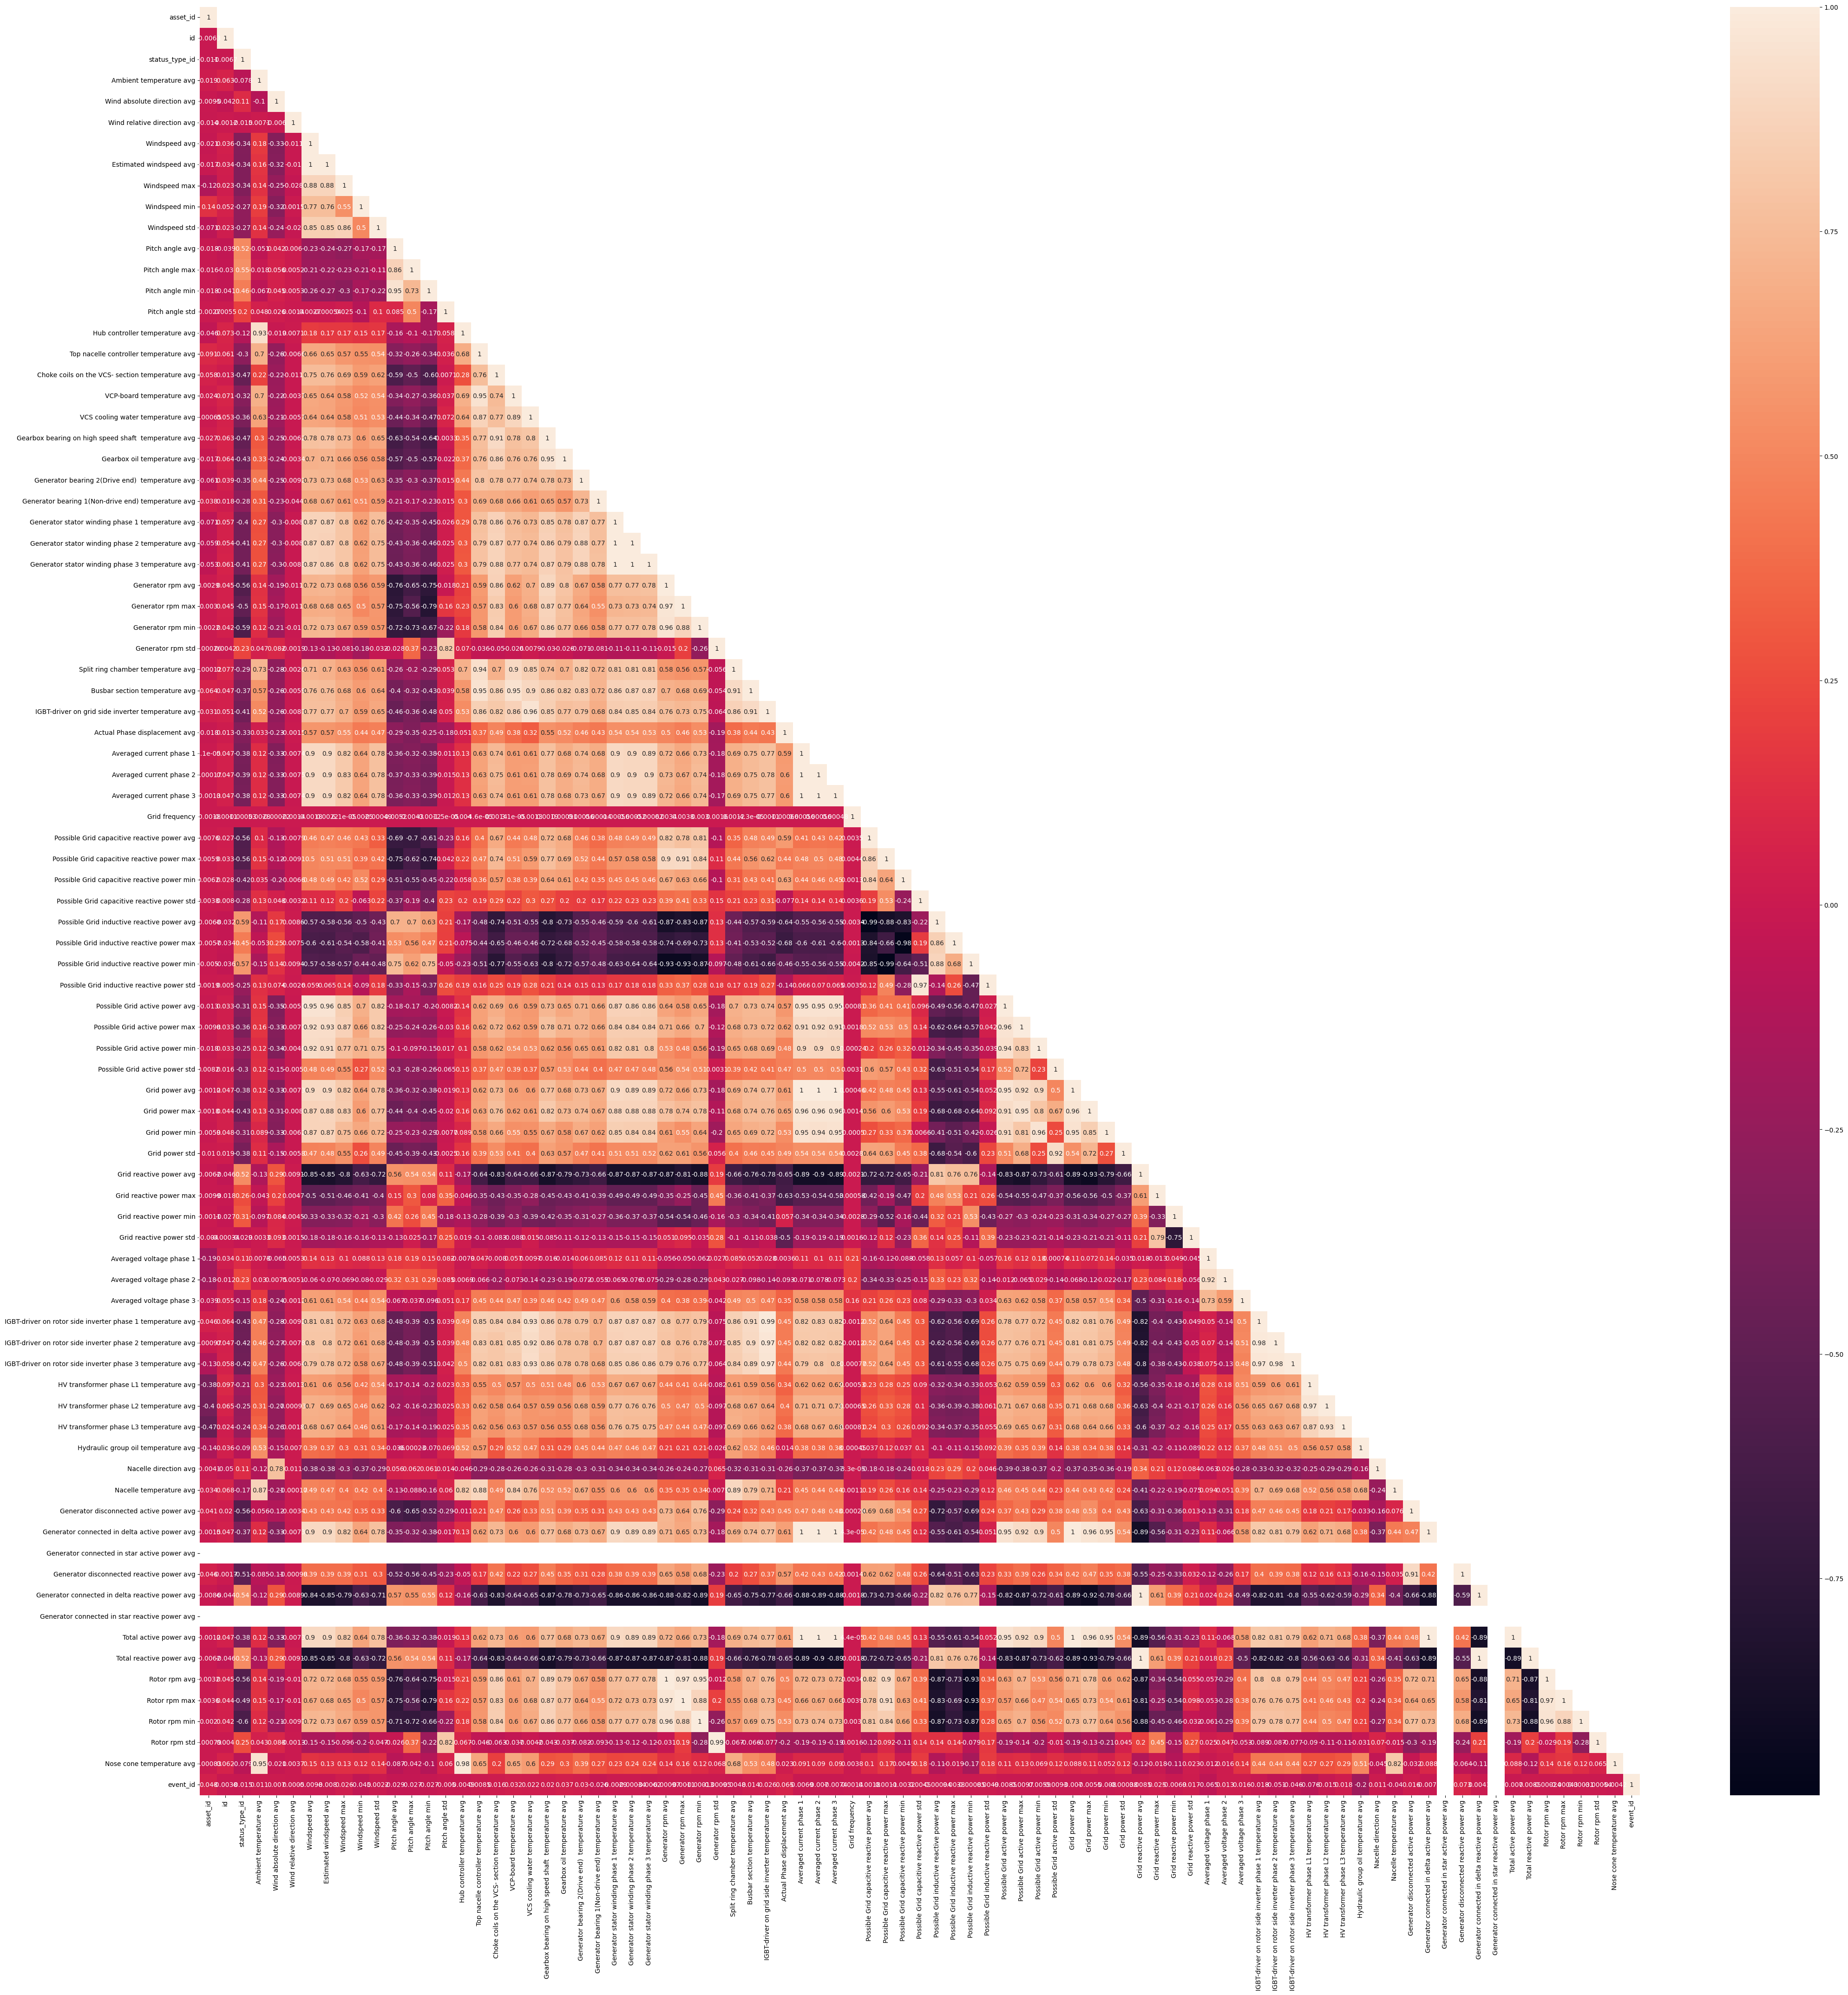

In [ ]:
plt.figure(figsize=(50, 50))
sns.heatmap(data_num.corr(), annot=True,mask=np.triu(data_num.corr(),+1));
plt.show()

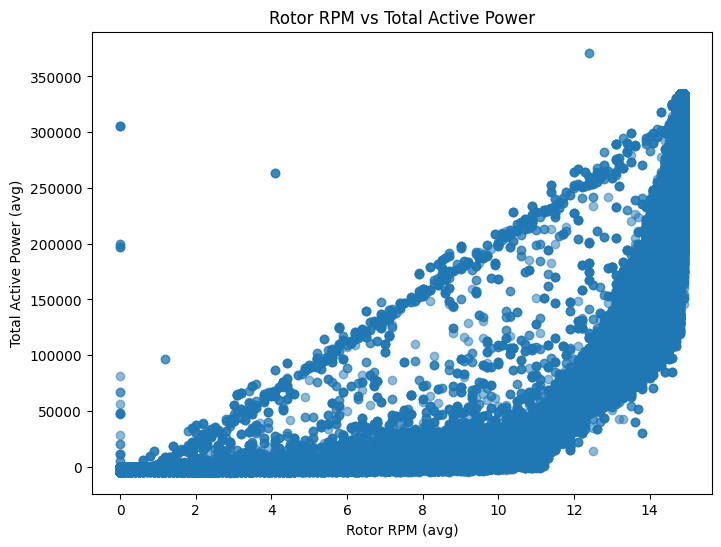

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Rotor rpm avg'], data['Total active power avg'], alpha=0.5)
plt.title('Rotor RPM vs Total Active Power')
plt.xlabel('Rotor RPM (avg)')
plt.ylabel('Total Active Power (avg)')
plt.show()

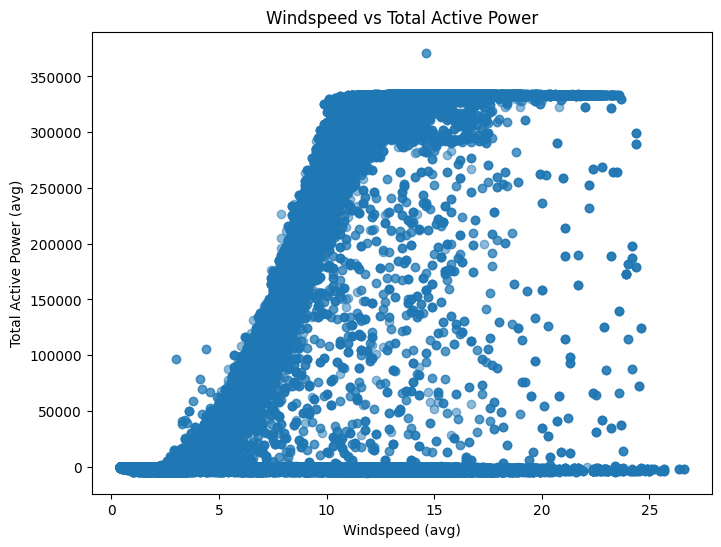

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Windspeed avg'], data['Total active power avg'], alpha=0.5)
plt.title('Windspeed vs Total Active Power')
plt.xlabel('Windspeed (avg)')
plt.ylabel('Total Active Power (avg)')
plt.show()

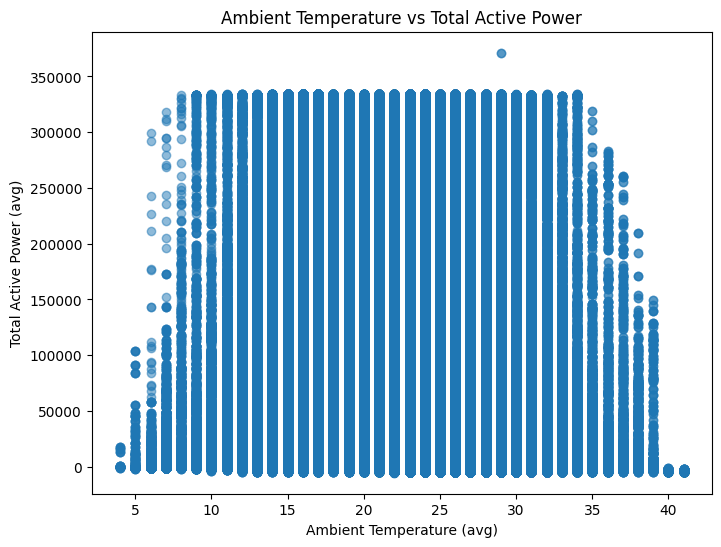

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Ambient temperature avg'], data['Total active power avg'], alpha=0.5)
plt.title('Ambient Temperature vs Total Active Power')
plt.xlabel('Ambient Temperature (avg)')
plt.ylabel('Total Active Power (avg)')
plt.show()

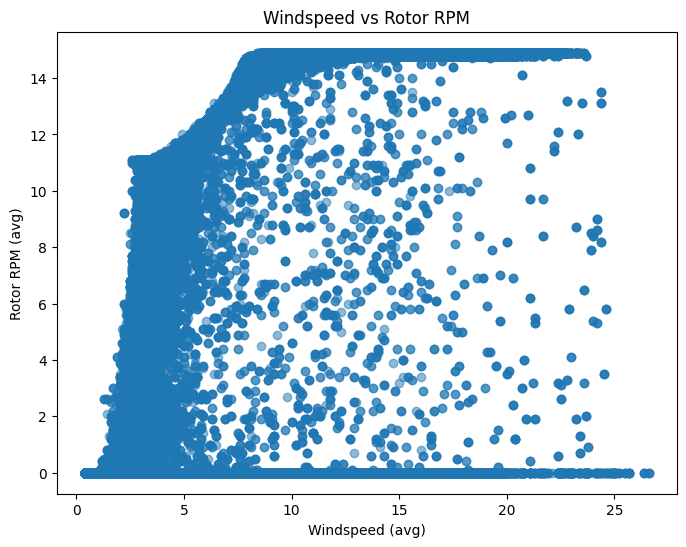

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Windspeed avg'], data['Rotor rpm avg'], alpha=0.5)
plt.title('Windspeed vs Rotor RPM')
plt.xlabel('Windspeed (avg)')
plt.ylabel('Rotor RPM (avg)')
plt.show()

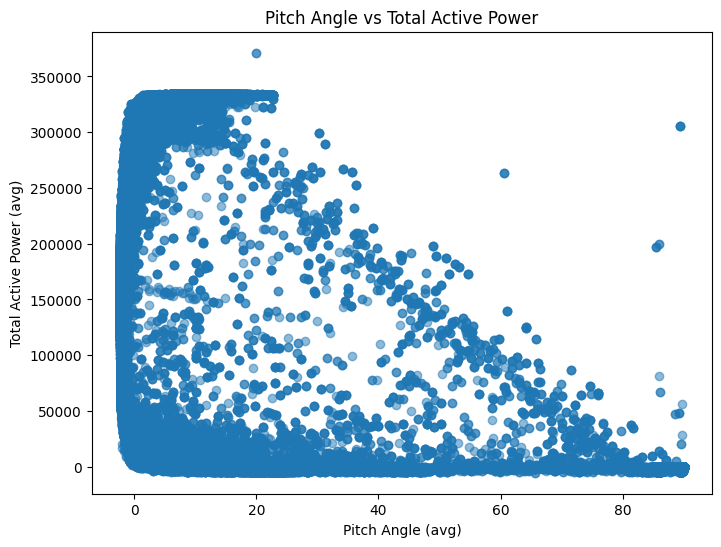

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Pitch angle avg'], data['Total active power avg'], alpha=0.5)
plt.title('Pitch Angle vs Total Active Power')
plt.xlabel('Pitch Angle (avg)')
plt.ylabel('Total Active Power (avg)')
plt.show()